In [4]:
import nltk
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import string

nltk.download('vader_lexicon')
nltk.download('punkt')

def analyze_text_around_characters_with_regex(text, character_names, n_words=25):
    # Initialize Sentiment Intensity Analyzer
    sia = SentimentIntensityAnalyzer()
    
    # Split the text into words for detailed analysis
    words = text.split()
    
    for character_name in character_names:
        # Prepare regex for case-insensitive matching of the character name
        regex_pattern = re.compile(r'\b' + re.escape(character_name) + r'\b', re.IGNORECASE)
        
        print(f"Analysis for {character_name.upper()}:\n")  # Display the character name in all caps
        
        indices = [m.start() for m in re.finditer(regex_pattern, text)]
        word_indices = [i for i, word in enumerate(words) if regex_pattern.search(word)]
        
        for word_index in word_indices:
            start_index = max(0, word_index - n_words)
            end_index = min(len(words), word_index + n_words)
            
            # Extract words before and after the mention
            before_block = ' '.join(words[start_index:word_index])
            after_block = ' '.join(words[word_index+1:end_index+1])
            
            # Remove punctuation for sentiment analysis
            before_block_clean = before_block.translate(str.maketrans('', '', string.punctuation))
            after_block_clean = after_block.translate(str.maketrans('', '', string.punctuation))
            
            # Sentiment analysis
            before_sentiment = sia.polarity_scores(before_block_clean)
            after_sentiment = sia.polarity_scores(after_block_clean)
            
            # Frequency analysis
            before_freq = FreqDist(word_tokenize(before_block.lower()))
            after_freq = FreqDist(word_tokenize(after_block.lower()))
            
            # Print results, converting matched character names to uppercase for emphasis
            before_block_highlighted = regex_pattern.sub(character_name.upper(), before_block)
            after_block_highlighted = regex_pattern.sub(character_name.upper(), after_block)
            
            print("Before Mention:\n", before_block_highlighted)
            print("\nAfter Mention:\n", after_block_highlighted)
            
            print("\nSentiment Analysis:")
            print("- Before Mention Sentiment:", before_sentiment)
            print("- After Mention Sentiment:", after_sentiment)
            
            print("\nKeyword Frequency Analysis (Top 5):")
            print("- Before Mention:", before_freq.most_common(5))
            print("- After Mention:", after_freq.most_common(5))
            print("\n")  # Add a newline for readability between character analyses

# Characters to analyze
character_names = ["Julius Caesar", "Brutus"]

# Text
text = """ 

THE TRAGEDY OF
JULIUS CAESAR
by William Shakespeare
Contents

 ACT I
 Scene I. Rome. A street
 Scene II. The same. A public place
 Scene III. The same. A street

 ACT II
 Scene I. Rome. Brutus’ orchard
 Scene II. A room in Caesar’s palace
 Scene III. A street near the Capitol
 Scene IV. Another part of the same street, before the house of Brutus

 ACT III
 Scene I. Rome. Before the Capitol; the Senate sitting
 Scene II. The same. The Forum
 Scene III. The same. A street

 ACT IV
 Scene I. A room in Antony’s house
 Scene II. Before Brutus’ tent, in the camp near Sardis
 Scene III. Within the tent of Brutus

 ACT V
 Scene I. The plains of Philippi
 Scene II. The same. The field of battle
 Scene III. Another part of the field
 Scene IV. Another part of the field
 Scene V. Another part of the field
 Dramatis Personæ
JULIUS CAESAR
OCTAVIUS CAESAR, Triumvir after his death.
MARCUS ANTONIUS,    ”    ”     ”
M. AEMILIUS LEPIDUS,   ”    ”     ”
CICERO, PUBLIUS, POPILIUS LENA, Senators.
MARCUS BRUTUS, Conspirator against Caesar.
CASSIUS, ”    ”     ”
CASCA,   ”    ”     ”
TREBONIUS,     ”    ”     ”
LIGARIUS,”    ”     ”
DECIUS BRUTUS, ”    ”     ”
METELLUS CIMBER,     ”    ”     ”
CINNA,   ”    ”     ”
FLAVIUS, tribune
MARULLUS, tribune
ARTEMIDORUS, a Sophist of Cnidos.
A Soothsayer
CINNA, a poet.
Another Poet.
LUCILIUS, TITINIUS, MESSALA, young CATO, and VOLUMNIUS, Friends to
Brutus and Cassius.
VARRO, CLITUS, CLAUDIUS, STRATO, LUCIUS, DARDANIUS, Servants to Brutus
PINDARUS, Servant to Cassius

CALPHURNIA, wife to Caesar
PORTIA, wife to Brutus

The Ghost of Caesar

Senators, Citizens, Soldiers, Commoners, Messengers, and Servants.

SCENE: Rome, the conspirators’ camp near Sardis, and the plains of
Philippi.
ACT I

SCENE I. Rome. A street.
Enter Flavius, Marullus and a throng of Citizens.
FLAVIUS.

Hence! home, you idle creatures, get you home.
Is this a holiday? What, know you not,
Being mechanical, you ought not walk
Upon a labouring day without the sign
Of your profession? Speak, what trade art thou?

CARPENTER.
Why, sir, a carpenter.
MARULLUS.
Where is thy leather apron and thy rule?
What dost thou with thy best apparel on?
You, sir, what trade are you?

COBBLER.
Truly, sir, in respect of a fine workman, I am but, as you would say, a
cobbler.

MARULLUS.
But what trade art thou? Answer me directly.

COBBLER.
A trade, sir, that I hope I may use with a safe conscience, which is
indeed, sir, a mender of bad soles.

MARULLUS.
What trade, thou knave? Thou naughty knave, what trade?

COBBLER.
Nay, I beseech you, sir, be not out with me; yet, if you be out, sir, I
can mend you.

MARULLUS.
What mean’st thou by that? Mend me, thou saucy fellow!

COBBLER.
Why, sir, cobble you.

FLAVIUS.
Thou art a cobbler, art thou?

COBBLER.
Truly, sir, all that I live by is with the awl; I meddle with no
tradesman’s matters, nor women’s matters, but withal I am indeed, sir,
a surgeon to old shoes: when they are in great danger, I recover them.
As proper men as ever trod upon neat’s leather have gone upon my
handiwork.

FLAVIUS.
But wherefore art not in thy shop today?
Why dost thou lead these men about the streets?

COBBLER.
Truly, sir, to wear out their shoes, to get myself into more work. But
indeed, sir, we make holiday to see Caesar, and to rejoice in his
triumph.

MARULLUS.
Wherefore rejoice? What conquest brings he home?
What tributaries follow him to Rome,
To grace in captive bonds his chariot wheels?
You blocks, you stones, you worse than senseless things!
O you hard hearts, you cruel men of Rome,
Knew you not Pompey? Many a time and oft
Have you climb’d up to walls and battlements,
To towers and windows, yea, to chimney tops,
Your infants in your arms, and there have sat
The livelong day with patient expectation,
To see great Pompey pass the streets of Rome.
And when you saw his chariot but appear,
Have you not made an universal shout,
That Tiber trembled underneath her banks
To hear the replication of your sounds
Made in her concave shores?
And do you now put on your best attire?
And do you now cull out a holiday?
And do you now strew flowers in his way,
That comes in triumph over Pompey’s blood?
Be gone!
Run to your houses, fall upon your knees,
Pray to the gods to intermit the plague
That needs must light on this ingratitude.

FLAVIUS.
Go, go, good countrymen, and, for this fault
Assemble all the poor men of your sort,
Draw them to Tiber banks, and weep your tears
Into the channel, till the lowest stream
Do kiss the most exalted shores of all.

[_Exeunt Citizens._]

See whether their basest metal be not mov’d;
They vanish tongue-tied in their guiltiness.
Go you down that way towards the Capitol;
This way will I. Disrobe the images,
If you do find them deck’d with ceremonies.

MARULLUS.
May we do so?
You know it is the feast of Lupercal.

FLAVIUS.
It is no matter; let no images
Be hung with Caesar’s trophies. I’ll about
And drive away the vulgar from the streets;
So do you too, where you perceive them thick.
These growing feathers pluck’d from Caesar’s wing
Will make him fly an ordinary pitch,
Who else would soar above the view of men,
And keep us all in servile fearfulness.

[_Exeunt._]

SCENE II. The same. A public place.

Enter, in procession, with music, Caesar; Antony, for the course;
Calphurnia, Portia, Decius, Cicero, Brutus, Cassius and Casca; a great
crowd following, among them a Soothsayer.

CAESAR.
Calphurnia.

CASCA.
Peace, ho! Caesar speaks.

[_Music ceases._]

CAESAR.
Calphurnia.

CALPHURNIA.
Here, my lord.

CAESAR.
Stand you directly in Antonius’ way,
When he doth run his course. Antonius.

ANTONY.
Caesar, my lord?

CAESAR.
Forget not in your speed, Antonius,
To touch Calphurnia; for our elders say,
The barren, touched in this holy chase,
Shake off their sterile curse.

ANTONY.
I shall remember.
When Caesar says “Do this,” it is perform’d.

CAESAR.
Set on; and leave no ceremony out.

[_Music._]

SOOTHSAYER.
Caesar!

CAESAR.
Ha! Who calls?

CASCA.
Bid every noise be still; peace yet again!

[_Music ceases._]

CAESAR.
Who is it in the press that calls on me?
I hear a tongue shriller than all the music,
Cry “Caesar”! Speak. Caesar is turn’d to hear.

SOOTHSAYER.
Beware the Ides of March.

CAESAR.
What man is that?

BRUTUS.
A soothsayer bids you beware the Ides of March.

CAESAR.
Set him before me; let me see his face.

CASSIUS.
Fellow, come from the throng; look upon Caesar.

CAESAR.
What say’st thou to me now? Speak once again.

SOOTHSAYER.
Beware the Ides of March.

CAESAR.
He is a dreamer; let us leave him. Pass.

[_Sennet. Exeunt all but Brutus and Cassius._]

CASSIUS.
Will you go see the order of the course?

BRUTUS.
Not I.

CASSIUS.
I pray you, do.

BRUTUS.
I am not gamesome: I do lack some part
Of that quick spirit that is in Antony.
Let me not hinder, Cassius, your desires;
I’ll leave you.

CASSIUS.
Brutus, I do observe you now of late:
I have not from your eyes that gentleness
And show of love as I was wont to have.
You bear too stubborn and too strange a hand
Over your friend that loves you.

BRUTUS.
Cassius,
Be not deceived: if I have veil’d my look,
I turn the trouble of my countenance
Merely upon myself. Vexed I am
Of late with passions of some difference,
Conceptions only proper to myself,
Which give some soil perhaps to my behaviors;
But let not therefore my good friends be grieved
(Among which number, Cassius, be you one)
Nor construe any further my neglect,
Than that poor Brutus, with himself at war,
Forgets the shows of love to other men.

CASSIUS.
Then, Brutus, I have much mistook your passion;
By means whereof this breast of mine hath buried
Thoughts of great value, worthy cogitations.
Tell me, good Brutus, can you see your face?

BRUTUS.
No, Cassius, for the eye sees not itself
But by reflection, by some other thing.

CASSIUS.
’Tis just:
And it is very much lamented, Brutus,
That you have no such mirrors as will turn
Your hidden worthiness into your eye,
That you might see your shadow. I have heard
Where many of the best respect in Rome,
(Except immortal Caesar) speaking of Brutus,
And groaning underneath this age’s yoke,
Have wish’d that noble Brutus had his eyes.

BRUTUS.
Into what dangers would you lead me, Cassius,
That you would have me seek into myself
For that which is not in me?

CASSIUS.
Therefore, good Brutus, be prepared to hear;
And since you know you cannot see yourself
So well as by reflection, I, your glass,
Will modestly discover to yourself
That of yourself which you yet know not of.
And be not jealous on me, gentle Brutus:
Were I a common laugher, or did use
To stale with ordinary oaths my love
To every new protester; if you know
That I do fawn on men, and hug them hard,
And after scandal them; or if you know
That I profess myself in banqueting,
To all the rout, then hold me dangerous.

[_Flourish and shout._]

BRUTUS.
What means this shouting? I do fear the people
Choose Caesar for their king.

CASSIUS.
Ay, do you fear it?
Then must I think you would not have it so.

BRUTUS.
I would not, Cassius; yet I love him well,
But wherefore do you hold me here so long?
What is it that you would impart to me?
If it be aught toward the general good,
Set honour in one eye and death i’ the other,
And I will look on both indifferently;
For let the gods so speed me as I love
The name of honour more than I fear death.

CASSIUS.
I know that virtue to be in you, Brutus,
As well as I do know your outward favour.
Well, honour is the subject of my story.
I cannot tell what you and other men
Think of this life; but, for my single self,
I had as lief not be as live to be
In awe of such a thing as I myself.
I was born free as Caesar; so were you;
We both have fed as well, and we can both
Endure the winter’s cold as well as he:
For once, upon a raw and gusty day,
The troubled Tiber chafing with her shores,
Caesar said to me, “Dar’st thou, Cassius, now
Leap in with me into this angry flood,
And swim to yonder point?” Upon the word,
Accoutred as I was, I plunged in,
And bade him follow: so indeed he did.
The torrent roar’d, and we did buffet it
With lusty sinews, throwing it aside
And stemming it with hearts of controversy.
But ere we could arrive the point propos’d,
Caesar cried, “Help me, Cassius, or I sink!”
I, as Aeneas, our great ancestor,
Did from the flames of Troy upon his shoulder
The old Anchises bear, so from the waves of Tiber
Did I the tired Caesar. And this man
Is now become a god; and Cassius is
A wretched creature, and must bend his body,
If Caesar carelessly but nod on him.
He had a fever when he was in Spain,
And when the fit was on him I did mark
How he did shake: ’tis true, this god did shake:
His coward lips did from their colour fly,
And that same eye whose bend doth awe the world
Did lose his lustre. I did hear him groan:
Ay, and that tongue of his, that bade the Romans
Mark him, and write his speeches in their books,
Alas, it cried, “Give me some drink, Titinius,”
As a sick girl. Ye gods, it doth amaze me,
A man of such a feeble temper should
So get the start of the majestic world,
And bear the palm alone.

[_Shout. Flourish._]

BRUTUS.
Another general shout?
I do believe that these applauses are
For some new honours that are heap’d on Caesar.

CASSIUS.
Why, man, he doth bestride the narrow world
Like a Colossus, and we petty men
Walk under his huge legs, and peep about
To find ourselves dishonourable graves.
Men at some time are masters of their fates:
The fault, dear Brutus, is not in our stars,
But in ourselves, that we are underlings.
“Brutus” and “Caesar”: what should be in that “Caesar”?
Why should that name be sounded more than yours?
Write them together, yours is as fair a name;
Sound them, it doth become the mouth as well;
Weigh them, it is as heavy; conjure with ’em,
“Brutus” will start a spirit as soon as “Caesar.”
Now in the names of all the gods at once,
Upon what meat doth this our Caesar feed,
That he is grown so great? Age, thou art sham’d!
Rome, thou hast lost the breed of noble bloods!
When went there by an age since the great flood,
But it was fam’d with more than with one man?
When could they say, till now, that talk’d of Rome,
That her wide walls encompass’d but one man?
Now is it Rome indeed, and room enough,
When there is in it but one only man.
O, you and I have heard our fathers say,
There was a Brutus once that would have brook’d
Th’ eternal devil to keep his state in Rome,
As easily as a king!

BRUTUS.
That you do love me, I am nothing jealous;
What you would work me to, I have some aim:
How I have thought of this, and of these times,
I shall recount hereafter. For this present,
I would not, so with love I might entreat you,
Be any further mov’d. What you have said,
I will consider; what you have to say
I will with patience hear; and find a time
Both meet to hear and answer such high things.
Till then, my noble friend, chew upon this:
Brutus had rather be a villager
Than to repute himself a son of Rome
Under these hard conditions as this time
Is like to lay upon us.

CASSIUS.
I am glad that my weak words
Have struck but thus much show of fire from Brutus.

Enter Caesar and his Train.

BRUTUS.
The games are done, and Caesar is returning.

CASSIUS.
As they pass by, pluck Casca by the sleeve,
And he will, after his sour fashion, tell you
What hath proceeded worthy note today.

BRUTUS.
I will do so. But, look you, Cassius,
The angry spot doth glow on Caesar’s brow,
And all the rest look like a chidden train:
Calphurnia’s cheek is pale; and Cicero
Looks with such ferret and such fiery eyes
As we have seen him in the Capitol,
Being cross’d in conference by some senators.

CASSIUS.
Casca will tell us what the matter is.

CAESAR.
Antonius.

ANTONY.
Caesar?

CAESAR.
Let me have men about me that are fat,
Sleek-headed men, and such as sleep a-nights:
Yond Cassius has a lean and hungry look;
He thinks too much: such men are dangerous.

ANTONY.
Fear him not, Caesar; he’s not dangerous;
He is a noble Roman and well given.

CAESAR.
Would he were fatter! But I fear him not:
Yet if my name were liable to fear,
I do not know the man I should avoid
So soon as that spare Cassius. He reads much,
He is a great observer, and he looks
Quite through the deeds of men. He loves no plays,
As thou dost, Antony; he hears no music.
Seldom he smiles; and smiles in such a sort
As if he mock’d himself and scorn’d his spirit
That could be mov’d to smile at anything.
Such men as he be never at heart’s ease
Whiles they behold a greater than themselves,
And therefore are they very dangerous.
I rather tell thee what is to be fear’d
Than what I fear; for always I am Caesar.
Come on my right hand, for this ear is deaf,
And tell me truly what thou think’st of him.

[_Exeunt Caesar and his Train. Casca stays._]

CASCA.
You pull’d me by the cloak; would you speak with me?

BRUTUS.
Ay, Casca, tell us what hath chanc’d today,
That Caesar looks so sad.

CASCA.
Why, you were with him, were you not?

BRUTUS.
I should not then ask Casca what had chanc’d.

CASCA.
Why, there was a crown offer’d him; and being offer’d him, he put it by
with the back of his hand, thus; and then the people fell a-shouting.

BRUTUS.
What was the second noise for?

CASCA.
Why, for that too.

CASSIUS.
They shouted thrice: what was the last cry for?

CASCA.
Why, for that too.

BRUTUS.
Was the crown offer’d him thrice?

CASCA.
Ay, marry, was’t, and he put it by thrice, every time gentler than
other; and at every putting-by mine honest neighbours shouted.

CASSIUS.
Who offer’d him the crown?

CASCA.
Why, Antony.

BRUTUS.
Tell us the manner of it, gentle Casca.

CASCA.
I can as well be hang’d, as tell the manner of it: it was mere foolery;
I did not mark it. I saw Mark Antony offer him a crown; yet ’twas not a
crown neither, ’twas one of these coronets; and, as I told you, he put
it by once: but, for all that, to my thinking, he would fain have had
it. Then he offered it to him again: then he put it by again: but, to
my thinking, he was very loath to lay his fingers off it. And then he
offered it the third time; he put it the third time by; and still, as
he refus’d it, the rabblement hooted, and clapp’d their chopt hands,
and threw up their sweaty night-caps, and uttered such a deal of
stinking breath because Caesar refus’d the crown, that it had, almost,
choked Caesar, for he swooned, and fell down at it. And for mine own
part, I durst not laugh, for fear of opening my lips and receiving the
bad air.

CASSIUS.
But, soft! I pray you. What, did Caesar swoon?

CASCA.
He fell down in the market-place, and foam’d at mouth, and was
speechless.

BRUTUS.
’Tis very like: he hath the falling-sickness.

CASSIUS.
No, Caesar hath it not; but you, and I,
And honest Casca, we have the falling-sickness.

CASCA.
I know not what you mean by that; but I am sure Caesar fell down. If
the tag-rag people did not clap him and hiss him, according as he
pleased and displeased them, as they use to do the players in the
theatre, I am no true man.

BRUTUS.
What said he when he came unto himself?

CASCA.
Marry, before he fell down, when he perceived the common herd was glad
he refused the crown, he pluck’d me ope his doublet, and offer’d them
his throat to cut. And I had been a man of any occupation, if I would
not have taken him at a word, I would I might go to hell among the
rogues. And so he fell. When he came to himself again, he said, if he
had done or said anything amiss, he desir’d their worships to think it
was his infirmity. Three or four wenches where I stood cried, “Alas,
good soul!” and forgave him with all their hearts. But there’s no heed
to be taken of them: if Caesar had stabb’d their mothers, they would
have done no less.

BRUTUS.
And, after that, he came thus sad away?

CASCA.
Ay.

CASSIUS.
Did Cicero say anything?

CASCA.
Ay, he spoke Greek.

CASSIUS.
To what effect?

CASCA.
Nay, and I tell you that, I’ll ne’er look you i’ the face again. But
those that understood him smil’d at one another and shook their heads;
but for mine own part, it was Greek to me. I could tell you more news
too: Marullus and Flavius, for pulling scarfs off Caesar’s images, are
put to silence. Fare you well. There was more foolery yet, if I could
remember it.

CASSIUS.
Will you sup with me tonight, Casca?

CASCA.
No, I am promis’d forth.

CASSIUS.
Will you dine with me tomorrow?

CASCA.
Ay, if I be alive, and your mind hold, and your dinner worth the
eating.

CASSIUS.
Good. I will expect you.

CASCA.
Do so; farewell both.

[_Exit Casca._]

BRUTUS.
What a blunt fellow is this grown to be!
He was quick mettle when he went to school.

CASSIUS.
So is he now in execution
Of any bold or noble enterprise,
However he puts on this tardy form.
This rudeness is a sauce to his good wit,
Which gives men stomach to digest his words
With better appetite.

BRUTUS.
And so it is. For this time I will leave you:
Tomorrow, if you please to speak with me,
I will come home to you; or, if you will,
Come home to me, and I will wait for you.

CASSIUS.
I will do so: till then, think of the world.

[_Exit Brutus._]

Well, Brutus, thou art noble; yet I see,
Thy honourable metal may be wrought
From that it is dispos’d: therefore ’tis meet
That noble minds keep ever with their likes;
For who so firm that cannot be seduc’d?
Caesar doth bear me hard, but he loves Brutus.
If I were Brutus now, and he were Cassius,
He should not humour me. I will this night,
In several hands, in at his windows throw,
As if they came from several citizens,
Writings, all tending to the great opinion
That Rome holds of his name; wherein obscurely
Caesar’s ambition shall be glanced at.
And after this, let Caesar seat him sure,
For we will shake him, or worse days endure.

[_Exit._]

SCENE III. The same. A street.

Thunder and lightning. Enter, from opposite sides, Casca with his sword
drawn, and Cicero.

CICERO.
Good even, Casca: brought you Caesar home?
Why are you breathless, and why stare you so?

CASCA.
Are not you moved, when all the sway of earth
Shakes like a thing unfirm? O Cicero,
I have seen tempests, when the scolding winds
Have riv’d the knotty oaks; and I have seen
Th’ ambitious ocean swell and rage and foam,
To be exalted with the threatening clouds:
But never till tonight, never till now,
Did I go through a tempest dropping fire.
Either there is a civil strife in heaven,
Or else the world too saucy with the gods,
Incenses them to send destruction.

CICERO.
Why, saw you anything more wonderful?

CASCA.
A common slave, you’d know him well by sight,
Held up his left hand, which did flame and burn
Like twenty torches join’d, and yet his hand,
Not sensible of fire remain’d unscorch’d.
Besides, I ha’ not since put up my sword,
Against the Capitol I met a lion,
Who glared upon me, and went surly by,
Without annoying me. And there were drawn
Upon a heap a hundred ghastly women,
Transformed with their fear; who swore they saw
Men, all in fire, walk up and down the streets.
And yesterday the bird of night did sit,
Even at noonday upon the marketplace,
Hooting and shrieking. When these prodigies
Do so conjointly meet, let not men say,
“These are their reasons; they are natural”;
For I believe, they are portentous things
Unto the climate that they point upon.

CICERO.
Indeed, it is a strange-disposed time.
But men may construe things after their fashion,
Clean from the purpose of the things themselves.
Comes Caesar to the Capitol tomorrow?

CASCA.
He doth, for he did bid Antonius
Send word to you he would be there tomorrow.

CICERO.
Goodnight then, Casca: this disturbed sky
Is not to walk in.

CASCA.
Farewell, Cicero.

[_Exit Cicero._]

Enter Cassius.

CASSIUS.
Who’s there?

CASCA.
A Roman.

CASSIUS.
Casca, by your voice.

CASCA.
Your ear is good. Cassius, what night is this!

CASSIUS.
A very pleasing night to honest men.

CASCA.
Who ever knew the heavens menace so?

CASSIUS.
Those that have known the earth so full of faults.
For my part, I have walk’d about the streets,
Submitting me unto the perilous night;
And, thus unbraced, Casca, as you see,
Have bar’d my bosom to the thunder-stone;
And when the cross blue lightning seem’d to open
The breast of heaven, I did present myself
Even in the aim and very flash of it.

CASCA.
But wherefore did you so much tempt the Heavens?
It is the part of men to fear and tremble,
When the most mighty gods by tokens send
Such dreadful heralds to astonish us.

CASSIUS.
You are dull, Casca; and those sparks of life
That should be in a Roman you do want,
Or else you use not. You look pale and gaze,
And put on fear and cast yourself in wonder,
To see the strange impatience of the Heavens:
But if you would consider the true cause
Why all these fires, why all these gliding ghosts,
Why birds and beasts, from quality and kind;
Why old men, fools, and children calculate,
Why all these things change from their ordinance,
Their natures, and pre-formed faculties,
To monstrous quality; why, you shall find
That Heaven hath infus’d them with these spirits,
To make them instruments of fear and warning
Unto some monstrous state.
Now could I, Casca, name to thee a man
Most like this dreadful night,
That thunders, lightens, opens graves, and roars,
As doth the lion in the Capitol;
A man no mightier than thyself, or me,
In personal action; yet prodigious grown,
And fearful, as these strange eruptions are.

CASCA.
’Tis Caesar that you mean; is it not, Cassius?

CASSIUS.
Let it be who it is: for Romans now
Have thews and limbs like to their ancestors;
But, woe the while! our fathers’ minds are dead,
And we are govern’d with our mothers’ spirits;
Our yoke and sufferance show us womanish.

CASCA.
Indeed, they say the senators tomorrow
Mean to establish Caesar as a king;
And he shall wear his crown by sea and land,
In every place, save here in Italy.

CASSIUS.
I know where I will wear this dagger then;
Cassius from bondage will deliver Cassius:
Therein, ye gods, you make the weak most strong;
Therein, ye gods, you tyrants do defeat.
Nor stony tower, nor walls of beaten brass,
Nor airless dungeon, nor strong links of iron,
Can be retentive to the strength of spirit;
But life, being weary of these worldly bars,
Never lacks power to dismiss itself.
If I know this, know all the world besides,
That part of tyranny that I do bear
I can shake off at pleasure.

[_Thunder still._]

CASCA.
So can I:
So every bondman in his own hand bears
The power to cancel his captivity.

CASSIUS.
And why should Caesar be a tyrant then?
Poor man! I know he would not be a wolf,
But that he sees the Romans are but sheep:
He were no lion, were not Romans hinds.
Those that with haste will make a mighty fire
Begin it with weak straws. What trash is Rome,
What rubbish, and what offal, when it serves
For the base matter to illuminate
So vile a thing as Caesar! But, O grief,
Where hast thou led me? I, perhaps, speak this
Before a willing bondman: then I know
My answer must be made; but I am arm’d,
And dangers are to me indifferent.

CASCA.
You speak to Casca, and to such a man
That is no fleering tell-tale. Hold, my hand:
Be factious for redress of all these griefs,
And I will set this foot of mine as far
As who goes farthest.

CASSIUS.
There’s a bargain made.
Now know you, Casca, I have mov’d already
Some certain of the noblest-minded Romans
To undergo with me an enterprise
Of honourable-dangerous consequence;
And I do know by this, they stay for me
In Pompey’s Porch: for now, this fearful night,
There is no stir or walking in the streets;
And the complexion of the element
In favour’s like the work we have in hand,
Most bloody, fiery, and most terrible.

Enter Cinna.

CASCA.
Stand close awhile, for here comes one in haste.

CASSIUS.
’Tis Cinna; I do know him by his gait;
He is a friend. Cinna, where haste you so?

CINNA.
To find out you. Who’s that? Metellus Cimber?

CASSIUS.
No, it is Casca, one incorporate
To our attempts. Am I not stay’d for, Cinna?

CINNA.
I am glad on’t. What a fearful night is this!
There’s two or three of us have seen strange sights.

CASSIUS.
Am I not stay’d for? tell me.

CINNA.
Yes, you are. O Cassius, if you could
But win the noble Brutus to our party—

CASSIUS.
Be you content. Good Cinna, take this paper,
And look you lay it in the praetor’s chair,
Where Brutus may but find it; and throw this
In at his window; set this up with wax
Upon old Brutus’ statue: all this done,
Repair to Pompey’s Porch, where you shall find us.
Is Decius Brutus and Trebonius there?

CINNA.
All but Metellus Cimber, and he’s gone
To seek you at your house. Well, I will hie,
And so bestow these papers as you bade me.

CASSIUS.
That done, repair to Pompey’s theatre.

[_Exit Cinna._]

Come, Casca, you and I will yet, ere day,
See Brutus at his house: three parts of him
Is ours already, and the man entire
Upon the next encounter, yields him ours.

CASCA.
O, he sits high in all the people’s hearts!
And that which would appear offence in us,
His countenance, like richest alchemy,
Will change to virtue and to worthiness.

CASSIUS.
Him, and his worth, and our great need of him,
You have right well conceited. Let us go,
For it is after midnight; and ere day,
We will awake him, and be sure of him.

[_Exeunt._]




ACT II

SCENE I. Rome. Brutus’ orchard.


Enter Brutus.

BRUTUS.
What, Lucius, ho!
I cannot, by the progress of the stars,
Give guess how near to day.—Lucius, I say!
I would it were my fault to sleep so soundly.
When, Lucius, when? Awake, I say! What, Lucius!

Enter Lucius.

LUCIUS.
Call’d you, my lord?

BRUTUS.
Get me a taper in my study, Lucius:
When it is lighted, come and call me here.

LUCIUS.
I will, my lord.

[_Exit._]

BRUTUS.
It must be by his death: and for my part,
I know no personal cause to spurn at him,
But for the general. He would be crown’d:
How that might change his nature, there’s the question.
It is the bright day that brings forth the adder,
And that craves wary walking. Crown him?—that;
And then, I grant, we put a sting in him,
That at his will he may do danger with.
Th’ abuse of greatness is, when it disjoins
Remorse from power; and, to speak truth of Caesar,
I have not known when his affections sway’d
More than his reason. But ’tis a common proof,
That lowliness is young ambition’s ladder,
Whereto the climber-upward turns his face;
But when he once attains the upmost round,
He then unto the ladder turns his back,
Looks in the clouds, scorning the base degrees
By which he did ascend. So Caesar may;
Then lest he may, prevent. And since the quarrel
Will bear no colour for the thing he is,
Fashion it thus: that what he is, augmented,
Would run to these and these extremities:
And therefore think him as a serpent’s egg
Which hatch’d, would, as his kind grow mischievous;
And kill him in the shell.

Enter Lucius.

LUCIUS.
The taper burneth in your closet, sir.
Searching the window for a flint, I found
This paper, thus seal’d up, and I am sure
It did not lie there when I went to bed.

[_Gives him the letter._]

BRUTUS.
Get you to bed again; it is not day.
Is not tomorrow, boy, the Ides of March?

LUCIUS.
I know not, sir.

BRUTUS.
Look in the calendar, and bring me word.

LUCIUS.
I will, sir.

[_Exit._]

BRUTUS.
The exhalations, whizzing in the air
Give so much light that I may read by them.

[_Opens the letter and reads._]

_Brutus, thou sleep’st: awake and see thyself.
Shall Rome, &c. Speak, strike, redress!_
“Brutus, thou sleep’st: awake!”
Such instigations have been often dropp’d
Where I have took them up.
“Shall Rome, &c.” Thus must I piece it out:
Shall Rome stand under one man’s awe? What, Rome?
My ancestors did from the streets of Rome
The Tarquin drive, when he was call’d a king.
“Speak, strike, redress!” Am I entreated
To speak and strike? O Rome, I make thee promise,
If the redress will follow, thou receivest
Thy full petition at the hand of Brutus.

Enter Lucius.

LUCIUS.
Sir, March is wasted fifteen days.

[_Knock within._]

BRUTUS.
’Tis good. Go to the gate, somebody knocks.

[_Exit Lucius._]

Since Cassius first did whet me against Caesar,
I have not slept.
Between the acting of a dreadful thing
And the first motion, all the interim is
Like a phantasma, or a hideous dream:
The genius and the mortal instruments
Are then in council; and the state of man,
Like to a little kingdom, suffers then
The nature of an insurrection.

Enter Lucius.

LUCIUS.
Sir, ’tis your brother Cassius at the door,
Who doth desire to see you.

BRUTUS.
Is he alone?

LUCIUS.
No, sir, there are moe with him.

BRUTUS.
Do you know them?

LUCIUS.
No, sir, their hats are pluck’d about their ears,
And half their faces buried in their cloaks,
That by no means I may discover them
By any mark of favour.

BRUTUS.
Let ’em enter.

[_Exit Lucius._]

They are the faction. O conspiracy,
Sham’st thou to show thy dangerous brow by night,
When evils are most free? O, then, by day
Where wilt thou find a cavern dark enough
To mask thy monstrous visage? Seek none, conspiracy;
Hide it in smiles and affability:
For if thou path, thy native semblance on,
Not Erebus itself were dim enough
To hide thee from prevention.

Enter Cassius, Casca, Decius, Cinna, Metellus Cimber and Trebonius.

CASSIUS.
I think we are too bold upon your rest:
Good morrow, Brutus; do we trouble you?

BRUTUS.
I have been up this hour, awake all night.
Know I these men that come along with you?

CASSIUS.
Yes, every man of them; and no man here
But honours you; and everyone doth wish
You had but that opinion of yourself
Which every noble Roman bears of you.
This is Trebonius.

BRUTUS.
He is welcome hither.

CASSIUS.
This Decius Brutus.

BRUTUS.
He is welcome too.

CASSIUS.
This, Casca; this, Cinna; and this, Metellus Cimber.

BRUTUS.
They are all welcome.
What watchful cares do interpose themselves
Betwixt your eyes and night?

CASSIUS.
Shall I entreat a word?

[_They whisper._]

DECIUS.
Here lies the east: doth not the day break here?

CASCA.
No.

CINNA.
O, pardon, sir, it doth; and yon grey lines
That fret the clouds are messengers of day.

CASCA.
You shall confess that you are both deceiv’d.
Here, as I point my sword, the Sun arises;
Which is a great way growing on the South,
Weighing the youthful season of the year.
Some two months hence, up higher toward the North
He first presents his fire; and the high East
Stands, as the Capitol, directly here.

BRUTUS.
Give me your hands all over, one by one.

CASSIUS.
And let us swear our resolution.

BRUTUS.
No, not an oath. If not the face of men,
The sufferance of our souls, the time’s abuse—
If these be motives weak, break off betimes,
And every man hence to his idle bed.
So let high-sighted tyranny range on,
Till each man drop by lottery. But if these,
As I am sure they do, bear fire enough
To kindle cowards, and to steel with valour
The melting spirits of women; then, countrymen,
What need we any spur but our own cause
To prick us to redress? what other bond
Than secret Romans, that have spoke the word,
And will not palter? and what other oath
Than honesty to honesty engag’d,
That this shall be, or we will fall for it?
Swear priests and cowards, and men cautelous,
Old feeble carrions, and such suffering souls
That welcome wrongs; unto bad causes swear
Such creatures as men doubt; but do not stain
The even virtue of our enterprise,
Nor th’ insuppressive mettle of our spirits,
To think that or our cause or our performance
Did need an oath; when every drop of blood
That every Roman bears, and nobly bears,
Is guilty of a several bastardy,
If he do break the smallest particle
Of any promise that hath pass’d from him.

CASSIUS.
But what of Cicero? Shall we sound him?
I think he will stand very strong with us.

CASCA.
Let us not leave him out.

CINNA.
No, by no means.

METELLUS.
O, let us have him, for his silver hairs
Will purchase us a good opinion,
And buy men’s voices to commend our deeds.
It shall be said, his judgement rul’d our hands;
Our youths and wildness shall no whit appear,
But all be buried in his gravity.

BRUTUS.
O, name him not; let us not break with him;
For he will never follow anything
That other men begin.

CASSIUS.
Then leave him out.

CASCA.
Indeed, he is not fit.

DECIUS.
Shall no man else be touch’d but only Caesar?

CASSIUS.
Decius, well urg’d. I think it is not meet,
Mark Antony, so well belov’d of Caesar,
Should outlive Caesar: we shall find of him
A shrewd contriver; and you know, his means,
If he improve them, may well stretch so far
As to annoy us all; which to prevent,
Let Antony and Caesar fall together.

BRUTUS.
Our course will seem too bloody, Caius Cassius,
To cut the head off, and then hack the limbs,
Like wrath in death, and envy afterwards;
For Antony is but a limb of Caesar.
Let us be sacrificers, but not butchers, Caius.
We all stand up against the spirit of Caesar,
And in the spirit of men there is no blood.
O, that we then could come by Caesar’s spirit,
And not dismember Caesar! But, alas,
Caesar must bleed for it! And, gentle friends,
Let’s kill him boldly, but not wrathfully;
Let’s carve him as a dish fit for the gods,
Not hew him as a carcass fit for hounds.
And let our hearts, as subtle masters do,
Stir up their servants to an act of rage,
And after seem to chide ’em. This shall mark
Our purpose necessary, and not envious;
Which so appearing to the common eyes,
We shall be call’d purgers, not murderers.
And for Mark Antony, think not of him;
For he can do no more than Caesar’s arm
When Caesar’s head is off.

CASSIUS.
Yet I fear him;
For in the ingrafted love he bears to Caesar—

BRUTUS.
Alas, good Cassius, do not think of him:
If he love Caesar, all that he can do
Is to himself; take thought and die for Caesar.
And that were much he should; for he is given
To sports, to wildness, and much company.

TREBONIUS.
There is no fear in him; let him not die;
For he will live, and laugh at this hereafter.

[_Clock strikes._]

BRUTUS.
Peace! count the clock.

CASSIUS.
The clock hath stricken three.

TREBONIUS.
’Tis time to part.

CASSIUS.
But it is doubtful yet
Whether Caesar will come forth today or no;
For he is superstitious grown of late,
Quite from the main opinion he held once
Of fantasy, of dreams, and ceremonies.
It may be these apparent prodigies,
The unaccustom’d terror of this night,
And the persuasion of his augurers,
May hold him from the Capitol today.

DECIUS.
Never fear that: if he be so resolved,
I can o’ersway him, for he loves to hear
That unicorns may be betray’d with trees,
And bears with glasses, elephants with holes,
Lions with toils, and men with flatterers.
But when I tell him he hates flatterers,
He says he does, being then most flattered.
Let me work;
For I can give his humour the true bent,
And I will bring him to the Capitol.

CASSIUS.
Nay, we will all of us be there to fetch him.

BRUTUS.
By the eighth hour: is that the uttermost?

CINNA.
Be that the uttermost; and fail not then.

METELLUS.
Caius Ligarius doth bear Caesar hard,
Who rated him for speaking well of Pompey;
I wonder none of you have thought of him.

BRUTUS.
Now, good Metellus, go along by him:
He loves me well, and I have given him reason;
Send him but hither, and I’ll fashion him.

CASSIUS.
The morning comes upon’s. We’ll leave you, Brutus.
And, friends, disperse yourselves; but all remember
What you have said, and show yourselves true Romans.

BRUTUS.
Good gentlemen, look fresh and merrily;
Let not our looks put on our purposes,
But bear it as our Roman actors do,
With untired spirits and formal constancy.
And so, good morrow to you everyone.

[_Exeunt all but Brutus._]

Boy! Lucius! Fast asleep? It is no matter;
Enjoy the honey-heavy dew of slumber:
Thou hast no figures nor no fantasies,
Which busy care draws in the brains of men;
Therefore thou sleep’st so sound.

Enter Portia.

PORTIA.
Brutus, my lord.

BRUTUS.
Portia, what mean you? Wherefore rise you now?
It is not for your health thus to commit
Your weak condition to the raw cold morning.

PORTIA.
Nor for yours neither. Y’ have ungently, Brutus,
Stole from my bed; and yesternight at supper,
You suddenly arose, and walk’d about,
Musing and sighing, with your arms across;
And when I ask’d you what the matter was,
You star’d upon me with ungentle looks.
I urg’d you further; then you scratch’d your head,
And too impatiently stamp’d with your foot;
Yet I insisted, yet you answer’d not,
But with an angry wafture of your hand
Gave sign for me to leave you. So I did,
Fearing to strengthen that impatience
Which seem’d too much enkindled; and withal
Hoping it was but an effect of humour,
Which sometime hath his hour with every man.
It will not let you eat, nor talk, nor sleep;
And could it work so much upon your shape
As it hath much prevail’d on your condition,
I should not know you, Brutus. Dear my lord,
Make me acquainted with your cause of grief.

BRUTUS.
I am not well in health, and that is all.

PORTIA.
Brutus is wise, and, were he not in health,
He would embrace the means to come by it.

BRUTUS.
Why, so I do. Good Portia, go to bed.

PORTIA.
Is Brutus sick, and is it physical
To walk unbraced and suck up the humours
Of the dank morning? What, is Brutus sick,
And will he steal out of his wholesome bed
To dare the vile contagion of the night,
And tempt the rheumy and unpurged air
To add unto his sickness? No, my Brutus;
You have some sick offence within your mind,
Which, by the right and virtue of my place,
I ought to know of: and, upon my knees,
I charm you, by my once commended beauty,
By all your vows of love, and that great vow
Which did incorporate and make us one,
That you unfold to me, your self, your half,
Why you are heavy, and what men tonight
Have had resort to you; for here have been
Some six or seven, who did hide their faces
Even from darkness.

BRUTUS.
Kneel not, gentle Portia.

PORTIA.
I should not need, if you were gentle Brutus.
Within the bond of marriage, tell me, Brutus,
Is it excepted I should know no secrets
That appertain to you? Am I your self
But, as it were, in sort or limitation,
To keep with you at meals, comfort your bed,
And talk to you sometimes? Dwell I but in the suburbs
Of your good pleasure? If it be no more,
Portia is Brutus’ harlot, not his wife.

BRUTUS.
You are my true and honourable wife,
As dear to me as are the ruddy drops
That visit my sad heart.

PORTIA.
If this were true, then should I know this secret.
I grant I am a woman; but withal
A woman that Lord Brutus took to wife;
I grant I am a woman; but withal
A woman well reputed, Cato’s daughter.
Think you I am no stronger than my sex,
Being so father’d and so husbanded?
Tell me your counsels, I will not disclose ’em.
I have made strong proof of my constancy,
Giving myself a voluntary wound
Here, in the thigh: can I bear that with patience
And not my husband’s secrets?

BRUTUS.
O ye gods,
Render me worthy of this noble wife!

[_Knock._]

Hark, hark, one knocks. Portia, go in awhile;
And by and by thy bosom shall partake
The secrets of my heart.
All my engagements I will construe to thee,
All the charactery of my sad brows.
Leave me with haste.

[_Exit Portia._]

Enter Lucius with Ligarius.

Lucius, who’s that knocks?

LUCIUS.
Here is a sick man that would speak with you.

BRUTUS.
Caius Ligarius, that Metellus spake of.
Boy, stand aside. Caius Ligarius, how?

LIGARIUS.
Vouchsafe good-morrow from a feeble tongue.

BRUTUS.
O, what a time have you chose out, brave Caius,
To wear a kerchief! Would you were not sick!

LIGARIUS.
I am not sick, if Brutus have in hand
Any exploit worthy the name of honour.

BRUTUS.
Such an exploit have I in hand, Ligarius,
Had you a healthful ear to hear of it.

LIGARIUS.
By all the gods that Romans bow before,
I here discard my sickness. Soul of Rome!
Brave son, derived from honourable loins!
Thou, like an exorcist, hast conjur’d up
My mortified spirit. Now bid me run,
And I will strive with things impossible,
Yea, get the better of them. What’s to do?

BRUTUS.
A piece of work that will make sick men whole.

LIGARIUS.
But are not some whole that we must make sick?

BRUTUS.
That must we also. What it is, my Caius,
I shall unfold to thee, as we are going,
To whom it must be done.

LIGARIUS.
Set on your foot,
And with a heart new-fir’d I follow you,
To do I know not what; but it sufficeth
That Brutus leads me on.

[_Thunder._]

BRUTUS.
Follow me then.

[_Exeunt._]

SCENE II. A room in Caesar’s palace.

Thunder and lightning. Enter Caesar, in his nightgown.

CAESAR.
Nor heaven nor earth have been at peace tonight:
Thrice hath Calphurnia in her sleep cried out,
“Help, ho! They murder Caesar!” Who’s within?

Enter a Servant.

SERVANT.
My lord?

CAESAR.
Go bid the priests do present sacrifice,
And bring me their opinions of success.

SERVANT.
I will, my lord.

[_Exit._]

Enter Calphurnia.

CALPHURNIA.
What mean you, Caesar? Think you to walk forth?
You shall not stir out of your house today.

CAESAR.
Caesar shall forth. The things that threaten’d me
Ne’er look’d but on my back; when they shall see
The face of Caesar, they are vanished.

CALPHURNIA.
Caesar, I never stood on ceremonies,
Yet now they fright me. There is one within,
Besides the things that we have heard and seen,
Recounts most horrid sights seen by the watch.
A lioness hath whelped in the streets,
And graves have yawn’d, and yielded up their dead;
Fierce fiery warriors fight upon the clouds
In ranks and squadrons and right form of war,
Which drizzled blood upon the Capitol;
The noise of battle hurtled in the air,
Horses did neigh, and dying men did groan,
And ghosts did shriek and squeal about the streets.
O Caesar, these things are beyond all use,
And I do fear them!

CAESAR.
What can be avoided
Whose end is purpos’d by the mighty gods?
Yet Caesar shall go forth; for these predictions
Are to the world in general as to Caesar.

CALPHURNIA.
When beggars die, there are no comets seen;
The heavens themselves blaze forth the death of princes.

CAESAR.
Cowards die many times before their deaths;
The valiant never taste of death but once.
Of all the wonders that I yet have heard,
It seems to me most strange that men should fear,
Seeing that death, a necessary end,
Will come when it will come.

Enter Servant.

What say the augurers?

SERVANT.
They would not have you to stir forth today.
Plucking the entrails of an offering forth,
They could not find a heart within the beast.

CAESAR.
The gods do this in shame of cowardice:
Caesar should be a beast without a heart
If he should stay at home today for fear.
No, Caesar shall not. Danger knows full well
That Caesar is more dangerous than he.
We are two lions litter’d in one day,
And I the elder and more terrible,
And Caesar shall go forth.

CALPHURNIA.
Alas, my lord,
Your wisdom is consum’d in confidence.
Do not go forth today: call it my fear
That keeps you in the house, and not your own.
We’ll send Mark Antony to the Senate-house,
And he shall say you are not well today.
Let me upon my knee prevail in this.

CAESAR.
Mark Antony shall say I am not well,
And for thy humour, I will stay at home.

Enter Decius.

Here’s Decius Brutus, he shall tell them so.

DECIUS.
Caesar, all hail! Good morrow, worthy Caesar.
I come to fetch you to the Senate-house.

CAESAR.
And you are come in very happy time
To bear my greeting to the Senators,
And tell them that I will not come today.
Cannot, is false; and that I dare not, falser:
I will not come today. Tell them so, Decius.

CALPHURNIA.
Say he is sick.

CAESAR.
Shall Caesar send a lie?
Have I in conquest stretch’d mine arm so far,
To be afeard to tell grey-beards the truth?
Decius, go tell them Caesar will not come.

DECIUS.
Most mighty Caesar, let me know some cause,
Lest I be laugh’d at when I tell them so.

CAESAR.
The cause is in my will; I will not come.
That is enough to satisfy the Senate.
But for your private satisfaction,
Because I love you, I will let you know:
Calphurnia here, my wife, stays me at home.
She dreamt tonight she saw my statue,
Which like a fountain with an hundred spouts
Did run pure blood; and many lusty Romans
Came smiling, and did bathe their hands in it.
And these does she apply for warnings and portents
And evils imminent; and on her knee
Hath begg’d that I will stay at home today.

DECIUS.
This dream is all amiss interpreted:
It was a vision fair and fortunate.
Your statue spouting blood in many pipes,
In which so many smiling Romans bath’d,
Signifies that from you great Rome shall suck
Reviving blood, and that great men shall press
For tinctures, stains, relics, and cognizance.
This by Calphurnia’s dream is signified.

CAESAR.
And this way have you well expounded it.

DECIUS.
I have, when you have heard what I can say;
And know it now. The Senate have concluded
To give this day a crown to mighty Caesar.
If you shall send them word you will not come,
Their minds may change. Besides, it were a mock
Apt to be render’d, for someone to say,
“Break up the Senate till another time,
When Caesar’s wife shall meet with better dreams.”
If Caesar hide himself, shall they not whisper
“Lo, Caesar is afraid”?
Pardon me, Caesar; for my dear dear love
To your proceeding bids me tell you this,
And reason to my love is liable.

CAESAR.
How foolish do your fears seem now, Calphurnia!
I am ashamed I did yield to them.
Give me my robe, for I will go.

Enter Brutus, Ligarius, Metellus, Casca, Trebonius, Cinna and Publius.

And look where Publius is come to fetch me.

PUBLIUS.
Good morrow, Caesar.

CAESAR.
Welcome, Publius.
What, Brutus, are you stirr’d so early too?
Good morrow, Casca. Caius Ligarius,
Caesar was ne’er so much your enemy
As that same ague which hath made you lean.
What is’t o’clock?

BRUTUS.
Caesar, ’tis strucken eight.

CAESAR.
I thank you for your pains and courtesy.

Enter Antony.

See! Antony, that revels long a-nights,
Is notwithstanding up. Good morrow, Antony.

ANTONY.
So to most noble Caesar.

CAESAR.
Bid them prepare within.
I am to blame to be thus waited for.
Now, Cinna; now, Metellus; what, Trebonius!
I have an hour’s talk in store for you:
Remember that you call on me today;
Be near me, that I may remember you.

TREBONIUS.
Caesar, I will. [_Aside._] and so near will I be,
That your best friends shall wish I had been further.

CAESAR.
Good friends, go in, and taste some wine with me;
And we, like friends, will straightway go together.

BRUTUS.
[_Aside._] That every like is not the same, O Caesar,
The heart of Brutus yearns to think upon.

[_Exeunt._]

SCENE III. A street near the Capitol.

Enter Artemidorus, reading a paper.

ARTEMIDORUS.
_“Caesar, beware of Brutus; take heed of Cassius; come not near Casca;
have an eye to Cinna; trust not Trebonius; mark well Metellus Cimber;
Decius Brutus loves thee not; thou hast wrong’d Caius Ligarius. There
is but one mind in all these men, and it is bent against Caesar. If
thou be’st not immortal, look about you: security gives way to
conspiracy. The mighty gods defend thee!
Thy lover, Artemidorus.”_ Here will I stand till Caesar pass along, And
as a suitor will I give him this. My heart laments that virtue cannot
live Out of the teeth of emulation. If thou read this, O Caesar, thou
mayest live; If not, the Fates with traitors do contrive.


[_Exit._]

SCENE IV. Another part of the same street, before the house of Brutus.

Enter Portia and Lucius.

PORTIA.
I pr’ythee, boy, run to the Senate-house;
Stay not to answer me, but get thee gone.
Why dost thou stay?

LUCIUS.
To know my errand, madam.

PORTIA.
I would have had thee there and here again,
Ere I can tell thee what thou shouldst do there.
[_Aside._] O constancy, be strong upon my side,
Set a huge mountain ’tween my heart and tongue!
I have a man’s mind, but a woman’s might.
How hard it is for women to keep counsel!
Art thou here yet?

LUCIUS.
Madam, what should I do?
Run to the Capitol, and nothing else?
And so return to you, and nothing else?

PORTIA.
Yes, bring me word, boy, if thy lord look well,
For he went sickly forth: and take good note
What Caesar doth, what suitors press to him.
Hark, boy, what noise is that?

LUCIUS.
I hear none, madam.

PORTIA.
Pr’ythee, listen well.
I heard a bustling rumour, like a fray,
And the wind brings it from the Capitol.

LUCIUS.
Sooth, madam, I hear nothing.

Enter the Soothsayer.

PORTIA.
Come hither, fellow:
Which way hast thou been?

SOOTHSAYER.
At mine own house, good lady.

PORTIA.
What is’t o’clock?

SOOTHSAYER.
About the ninth hour, lady.

PORTIA.
Is Caesar yet gone to the Capitol?

SOOTHSAYER.
Madam, not yet. I go to take my stand,
To see him pass on to the Capitol.

PORTIA.
Thou hast some suit to Caesar, hast thou not?

SOOTHSAYER.
That I have, lady, if it will please Caesar
To be so good to Caesar as to hear me,
I shall beseech him to befriend himself.

PORTIA.
Why, know’st thou any harm’s intended towards him?

SOOTHSAYER.
None that I know will be, much that I fear may chance.
Good morrow to you. Here the street is narrow.
The throng that follows Caesar at the heels,
Of Senators, of Praetors, common suitors,
Will crowd a feeble man almost to death:
I’ll get me to a place more void, and there
Speak to great Caesar as he comes along.

[_Exit._]

PORTIA.
I must go in.
[_Aside._] Ay me, how weak a thing
The heart of woman is! O Brutus,
The heavens speed thee in thine enterprise!
Sure, the boy heard me. Brutus hath a suit
That Caesar will not grant. O, I grow faint.
Run, Lucius, and commend me to my lord;
Say I am merry; come to me again,
And bring me word what he doth say to thee.

[_Exeunt._]




ACT III

SCENE I. Rome. Before the Capitol; the Senate sitting.


A crowd of people in the street leading to the Capitol. Flourish. Enter
Caesar, Brutus, Cassius, Casca, Decius, Metellus, Trebonius, Cinna,
Antony, Lepidus, Artemidorus, Publius, Popilius and the Soothsayer.

CAESAR.
The Ides of March are come.

SOOTHSAYER.
Ay, Caesar; but not gone.

ARTEMIDORUS.
Hail, Caesar! Read this schedule.

DECIUS.
Trebonius doth desire you to o’er-read,
At your best leisure, this his humble suit.

ARTEMIDORUS.
O Caesar, read mine first; for mine’s a suit
That touches Caesar nearer. Read it, great Caesar.

CAESAR.
What touches us ourself shall be last serv’d.

ARTEMIDORUS.
Delay not, Caesar. Read it instantly.

CAESAR.
What, is the fellow mad?

PUBLIUS.
Sirrah, give place.

CASSIUS.
What, urge you your petitions in the street?
Come to the Capitol.

Caesar enters the Capitol, the rest following. All the Senators rise.

POPILIUS.
I wish your enterprise today may thrive.

CASSIUS.
What enterprise, Popilius?

POPILIUS.
Fare you well.

[_Advances to Caesar._]

BRUTUS.
What said Popilius Lena?

CASSIUS.
He wish’d today our enterprise might thrive.
I fear our purpose is discovered.

BRUTUS.
Look how he makes to Caesar: mark him.

CASSIUS.
Casca, be sudden, for we fear prevention.
Brutus, what shall be done? If this be known,
Cassius or Caesar never shall turn back,
For I will slay myself.

BRUTUS.
Cassius, be constant:
Popilius Lena speaks not of our purposes;
For look, he smiles, and Caesar doth not change.

CASSIUS.
Trebonius knows his time, for look you, Brutus,
He draws Mark Antony out of the way.

[_Exeunt Antony and Trebonius. Caesar and the Senators take their
seats._]

DECIUS.
Where is Metellus Cimber? Let him go,
And presently prefer his suit to Caesar.

BRUTUS.
He is address’d; press near and second him.

CINNA.
Casca, you are the first that rears your hand.

CAESAR.
Are we all ready? What is now amiss
That Caesar and his Senate must redress?

METELLUS.
Most high, most mighty, and most puissant Caesar,
Metellus Cimber throws before thy seat
An humble heart.

[_Kneeling._]

CAESAR.
I must prevent thee, Cimber.
These couchings and these lowly courtesies
Might fire the blood of ordinary men,
And turn pre-ordinance and first decree
Into the law of children. Be not fond,
To think that Caesar bears such rebel blood
That will be thaw’d from the true quality
With that which melteth fools; I mean sweet words,
Low-crooked curtsies, and base spaniel fawning.
Thy brother by decree is banished:
If thou dost bend, and pray, and fawn for him,
I spurn thee like a cur out of my way.
Know, Caesar dost not wrong, nor without cause
Will he be satisfied.

METELLUS.
Is there no voice more worthy than my own,
To sound more sweetly in great Caesar’s ear
For the repealing of my banish’d brother?

BRUTUS.
I kiss thy hand, but not in flattery, Caesar;
Desiring thee that Publius Cimber may
Have an immediate freedom of repeal.

CAESAR.
What, Brutus?

CASSIUS.
Pardon, Caesar; Caesar, pardon:
As low as to thy foot doth Cassius fall,
To beg enfranchisement for Publius Cimber.

CAESAR.
I could be well mov’d, if I were as you;
If I could pray to move, prayers would move me:
But I am constant as the northern star,
Of whose true-fix’d and resting quality
There is no fellow in the firmament.
The skies are painted with unnumber’d sparks,
They are all fire, and every one doth shine;
But there’s but one in all doth hold his place.
So in the world; ’tis furnish’d well with men,
And men are flesh and blood, and apprehensive;
Yet in the number I do know but one
That unassailable holds on his rank,
Unshak’d of motion: and that I am he,
Let me a little show it, even in this,
That I was constant Cimber should be banish’d,
And constant do remain to keep him so.

CINNA.
O Caesar,—

CAESAR.
Hence! wilt thou lift up Olympus?

DECIUS.
Great Caesar,—

CAESAR.
Doth not Brutus bootless kneel?

CASCA.
Speak, hands, for me!

[_Casca stabs Caesar in the neck. Caesar catches hold of his arm. He is
then stabbed by several other Conspirators, and at last by Marcus
Brutus._]

CAESAR.
_Et tu, Brute?_—Then fall, Caesar!

[_Dies. The Senators and People retire in confusion._]

CINNA.
Liberty! Freedom! Tyranny is dead!
Run hence, proclaim, cry it about the streets.

CASSIUS.
Some to the common pulpits and cry out,
“Liberty, freedom, and enfranchisement!”

BRUTUS.
People and Senators, be not affrighted.
Fly not; stand still; ambition’s debt is paid.

CASCA.
Go to the pulpit, Brutus.

DECIUS.
And Cassius too.

BRUTUS.
Where’s Publius?

CINNA.
Here, quite confounded with this mutiny.

METELLUS.
Stand fast together, lest some friend of Caesar’s
Should chance—

BRUTUS.
Talk not of standing. Publius, good cheer!
There is no harm intended to your person,
Nor to no Roman else. So tell them, Publius.

CASSIUS.
And leave us, Publius; lest that the people
Rushing on us, should do your age some mischief.

BRUTUS.
Do so; and let no man abide this deed
But we the doers.

Enter Trebonius.

CASSIUS.
Where’s Antony?

TREBONIUS.
Fled to his house amaz’d.
Men, wives, and children stare, cry out, and run,
As it were doomsday.

BRUTUS.
Fates, we will know your pleasures.
That we shall die, we know; ’tis but the time
And drawing days out, that men stand upon.

CASCA.
Why, he that cuts off twenty years of life
Cuts off so many years of fearing death.

BRUTUS.
Grant that, and then is death a benefit:
So are we Caesar’s friends, that have abridg’d
His time of fearing death. Stoop, Romans, stoop,
And let us bathe our hands in Caesar’s blood
Up to the elbows, and besmear our swords:
Then walk we forth, even to the market-place,
And waving our red weapons o’er our heads,
Let’s all cry, “Peace, freedom, and liberty!”

CASSIUS.
Stoop then, and wash. How many ages hence
Shall this our lofty scene be acted over
In States unborn, and accents yet unknown!

BRUTUS.
How many times shall Caesar bleed in sport,
That now on Pompey’s basis lies along,
No worthier than the dust!

CASSIUS.
So oft as that shall be,
So often shall the knot of us be call’d
The men that gave their country liberty.

DECIUS.
What, shall we forth?

CASSIUS.
Ay, every man away.
Brutus shall lead; and we will grace his heels
With the most boldest and best hearts of Rome.

Enter a Servant.

BRUTUS.
Soft, who comes here? A friend of Antony’s.

SERVANT.
Thus, Brutus, did my master bid me kneel;
Thus did Mark Antony bid me fall down;
And, being prostrate, thus he bade me say:
Brutus is noble, wise, valiant, and honest;
Caesar was mighty, bold, royal, and loving;
Say I love Brutus and I honour him;
Say I fear’d Caesar, honour’d him, and lov’d him.
If Brutus will vouchsafe that Antony
May safely come to him, and be resolv’d
How Caesar hath deserv’d to lie in death,
Mark Antony shall not love Caesar dead
So well as Brutus living; but will follow
The fortunes and affairs of noble Brutus
Thorough the hazards of this untrod state,
With all true faith. So says my master Antony.

BRUTUS.
Thy master is a wise and valiant Roman;
I never thought him worse.
Tell him, so please him come unto this place,
He shall be satisfied and, by my honour,
Depart untouch’d.

SERVANT.
I’ll fetch him presently.

[_Exit._]

BRUTUS.
I know that we shall have him well to friend.

CASSIUS.
I wish we may: but yet have I a mind
That fears him much; and my misgiving still
Falls shrewdly to the purpose.

Enter Antony.

BRUTUS.
But here comes Antony. Welcome, Mark Antony.

ANTONY.
O mighty Caesar! Dost thou lie so low?
Are all thy conquests, glories, triumphs, spoils,
Shrunk to this little measure? Fare thee well.
I know not, gentlemen, what you intend,
Who else must be let blood, who else is rank:
If I myself, there is no hour so fit
As Caesar’s death’s hour; nor no instrument
Of half that worth as those your swords, made rich
With the most noble blood of all this world.
I do beseech ye, if you bear me hard,
Now, whilst your purpled hands do reek and smoke,
Fulfill your pleasure. Live a thousand years,
I shall not find myself so apt to die.
No place will please me so, no means of death,
As here by Caesar, and by you cut off,
The choice and master spirits of this age.

BRUTUS.
O Antony, beg not your death of us.
Though now we must appear bloody and cruel,
As by our hands and this our present act
You see we do; yet see you but our hands
And this the bleeding business they have done.
Our hearts you see not; they are pitiful;
And pity to the general wrong of Rome—
As fire drives out fire, so pity pity—
Hath done this deed on Caesar. For your part,
To you our swords have leaden points, Mark Antony;
Our arms in strength of malice, and our hearts
Of brothers’ temper, do receive you in
With all kind love, good thoughts, and reverence.

CASSIUS.
Your voice shall be as strong as any man’s
In the disposing of new dignities.

BRUTUS.
Only be patient till we have appeas’d
The multitude, beside themselves with fear,
And then we will deliver you the cause
Why I, that did love Caesar when I struck him,
Have thus proceeded.

ANTONY.
I doubt not of your wisdom.
Let each man render me his bloody hand.
First, Marcus Brutus, will I shake with you;
Next, Caius Cassius, do I take your hand.
Now, Decius Brutus, yours; now yours, Metellus;
Yours, Cinna; and, my valiant Casca, yours;
Though last, not least in love, yours, good Trebonius.
Gentlemen all—alas, what shall I say?
My credit now stands on such slippery ground,
That one of two bad ways you must conceit me,
Either a coward or a flatterer.
That I did love thee, Caesar, O, ’tis true:
If then thy spirit look upon us now,
Shall it not grieve thee dearer than thy death,
To see thy Antony making his peace,
Shaking the bloody fingers of thy foes,
Most noble, in the presence of thy corse?
Had I as many eyes as thou hast wounds,
Weeping as fast as they stream forth thy blood,
It would become me better than to close
In terms of friendship with thine enemies.
Pardon me, Julius! Here wast thou bay’d, brave hart;
Here didst thou fall; and here thy hunters stand,
Sign’d in thy spoil, and crimson’d in thy lethe.
O world, thou wast the forest to this hart;
And this indeed, O world, the heart of thee.
How like a deer strucken by many princes,
Dost thou here lie!

CASSIUS.
Mark Antony,—

ANTONY.
Pardon me, Caius Cassius:
The enemies of Caesar shall say this;
Then, in a friend, it is cold modesty.

CASSIUS.
I blame you not for praising Caesar so;
But what compact mean you to have with us?
Will you be prick’d in number of our friends,
Or shall we on, and not depend on you?

ANTONY.
Therefore I took your hands; but was indeed
Sway’d from the point, by looking down on Caesar.
Friends am I with you all, and love you all,
Upon this hope, that you shall give me reasons
Why, and wherein, Caesar was dangerous.

BRUTUS.
Or else were this a savage spectacle.
Our reasons are so full of good regard
That were you, Antony, the son of Caesar,
You should be satisfied.

ANTONY.
That’s all I seek,
And am moreover suitor that I may
Produce his body to the market-place;
And in the pulpit, as becomes a friend,
Speak in the order of his funeral.

BRUTUS.
You shall, Mark Antony.

CASSIUS.
Brutus, a word with you.
[_Aside to Brutus._] You know not what you do. Do not consent
That Antony speak in his funeral.
Know you how much the people may be mov’d
By that which he will utter?

BRUTUS.
[_Aside to Cassius._] By your pardon:
I will myself into the pulpit first,
And show the reason of our Caesar’s death.
What Antony shall speak, I will protest
He speaks by leave and by permission;
And that we are contented Caesar shall
Have all true rights and lawful ceremonies.
It shall advantage more than do us wrong.

CASSIUS.
[_Aside to Brutus._] I know not what may fall; I like it not.

BRUTUS.
Mark Antony, here, take you Caesar’s body.
You shall not in your funeral speech blame us,
But speak all good you can devise of Caesar,
And say you do’t by our permission;
Else shall you not have any hand at all
About his funeral. And you shall speak
In the same pulpit whereto I am going,
After my speech is ended.

ANTONY.
Be it so;
I do desire no more.

BRUTUS.
Prepare the body, then, and follow us.

[_Exeunt all but Antony._]

ANTONY.
O, pardon me, thou bleeding piece of earth,
That I am meek and gentle with these butchers.
Thou art the ruins of the noblest man
That ever lived in the tide of times.
Woe to the hand that shed this costly blood!
Over thy wounds now do I prophesy,
Which, like dumb mouths do ope their ruby lips
To beg the voice and utterance of my tongue,
A curse shall light upon the limbs of men;
Domestic fury and fierce civil strife
Shall cumber all the parts of Italy;
Blood and destruction shall be so in use,
And dreadful objects so familiar,
That mothers shall but smile when they behold
Their infants quartered with the hands of war;
All pity chok’d with custom of fell deeds:
And Caesar’s spirit, ranging for revenge,
With Ate by his side come hot from Hell,
Shall in these confines with a monarch’s voice
Cry havoc and let slip the dogs of war,
That this foul deed shall smell above the earth
With carrion men, groaning for burial.

Enter a Servant.

You serve Octavius Caesar, do you not?

SERVANT.
I do, Mark Antony.

ANTONY.
Caesar did write for him to come to Rome.

SERVANT.
He did receive his letters, and is coming,
And bid me say to you by word of mouth,—
[_Seeing the body._] O Caesar!

ANTONY.
Thy heart is big, get thee apart and weep.
Passion, I see, is catching; for mine eyes,
Seeing those beads of sorrow stand in thine,
Began to water. Is thy master coming?

SERVANT.
He lies tonight within seven leagues of Rome.

ANTONY.
Post back with speed, and tell him what hath chanc’d.
Here is a mourning Rome, a dangerous Rome,
No Rome of safety for Octavius yet.
Hie hence, and tell him so. Yet stay awhile;
Thou shalt not back till I have borne this corse
Into the market-place: there shall I try,
In my oration, how the people take
The cruel issue of these bloody men;
According to the which thou shalt discourse
To young Octavius of the state of things.
Lend me your hand.

[_Exeunt with Caesar’s body._]

SCENE II. The same. The Forum.

Enter Brutus and goes into the pulpit, and Cassius, with a throng of
Citizens.

CITIZENS.
We will be satisfied; let us be satisfied.

BRUTUS.
Then follow me, and give me audience, friends.
Cassius, go you into the other street
And part the numbers.
Those that will hear me speak, let ’em stay here;
Those that will follow Cassius, go with him;
And public reasons shall be rendered
Of Caesar’s death.

FIRST CITIZEN.
I will hear Brutus speak.

SECOND CITIZEN.
I will hear Cassius; and compare their reasons,
When severally we hear them rendered.

[_Exit Cassius, with some of the Citizens. Brutus goes into the
rostrum._]

THIRD CITIZEN.
The noble Brutus is ascended: silence!

BRUTUS.
Be patient till the last.
Romans, countrymen, and lovers, hear me for my cause; and be silent,
that you may hear. Believe me for mine honour, and have respect to mine
honour, that you may believe. Censure me in your wisdom, and awake your
senses, that you may the better judge. If there be any in this
assembly, any dear friend of Caesar’s, to him I say that Brutus’ love
to Caesar was no less than his. If then that friend demand why Brutus
rose against Caesar, this is my answer: Not that I loved Caesar less,
but that I loved Rome more. Had you rather Caesar were living, and die
all slaves, than that Caesar were dead, to live all free men? As Caesar
loved me, I weep for him; as he was fortunate, I rejoice at it; as he
was valiant, I honour him; but, as he was ambitious, I slew him. There
is tears, for his love; joy for his fortune; honour for his valour; and
death, for his ambition. Who is here so base, that would be a bondman?
If any, speak; for him have I offended. Who is here so rude, that would
not be a Roman? If any, speak; for him have I offended. Who is here so
vile, that will not love his country? If any, speak; for him have I
offended. I pause for a reply.

CITIZENS.
None, Brutus, none.

BRUTUS.
Then none have I offended. I have done no more to Caesar than you shall
do to Brutus. The question of his death is enroll’d in the Capitol, his
glory not extenuated, wherein he was worthy; nor his offences enforc’d,
for which he suffered death.

Enter Antony and others, with Caesar’s body.

Here comes his body, mourned by Mark Antony, who, though he had no hand
in his death, shall receive the benefit of his dying, a place in the
commonwealth; as which of you shall not? With this I depart, that, as I
slew my best lover for the good of Rome, I have the same dagger for
myself, when it shall please my country to need my death.

CITIZENS.
Live, Brutus! live, live!

FIRST CITIZEN.
Bring him with triumph home unto his house.

SECOND CITIZEN.
Give him a statue with his ancestors.

THIRD CITIZEN.
Let him be Caesar.

FOURTH CITIZEN.
Caesar’s better parts
Shall be crown’d in Brutus.

FIRST CITIZEN.
We’ll bring him to his house with shouts and clamours.

BRUTUS.
My countrymen,—

SECOND CITIZEN.
Peace! Silence! Brutus speaks.

FIRST CITIZEN.
Peace, ho!

BRUTUS.
Good countrymen, let me depart alone,
And, for my sake, stay here with Antony.
Do grace to Caesar’s corpse, and grace his speech
Tending to Caesar’s glories, which Mark Antony,
By our permission, is allow’d to make.
I do entreat you, not a man depart,
Save I alone, till Antony have spoke.

[_Exit._]

FIRST CITIZEN.
Stay, ho! and let us hear Mark Antony.

THIRD CITIZEN.
Let him go up into the public chair.
We’ll hear him. Noble Antony, go up.

ANTONY.
For Brutus’ sake, I am beholding to you.

[_Goes up._]

FOURTH CITIZEN.
What does he say of Brutus?

THIRD CITIZEN.
He says, for Brutus’ sake
He finds himself beholding to us all.

FOURTH CITIZEN.
’Twere best he speak no harm of Brutus here!

FIRST CITIZEN.
This Caesar was a tyrant.

THIRD CITIZEN.
Nay, that’s certain.
We are blest that Rome is rid of him.

SECOND CITIZEN.
Peace! let us hear what Antony can say.

ANTONY.
You gentle Romans,—

CITIZENS.
Peace, ho! let us hear him.

ANTONY.
Friends, Romans, countrymen, lend me your ears;
I come to bury Caesar, not to praise him.
The evil that men do lives after them,
The good is oft interred with their bones;
So let it be with Caesar. The noble Brutus
Hath told you Caesar was ambitious.
If it were so, it was a grievous fault,
And grievously hath Caesar answer’d it.
Here, under leave of Brutus and the rest,
For Brutus is an honourable man,
So are they all, all honourable men,
Come I to speak in Caesar’s funeral.
He was my friend, faithful and just to me;
But Brutus says he was ambitious,
And Brutus is an honourable man.
He hath brought many captives home to Rome,
Whose ransoms did the general coffers fill:
Did this in Caesar seem ambitious?
When that the poor have cried, Caesar hath wept;
Ambition should be made of sterner stuff:
Yet Brutus says he was ambitious;
And Brutus is an honourable man.
You all did see that on the Lupercal
I thrice presented him a kingly crown,
Which he did thrice refuse. Was this ambition?
Yet Brutus says he was ambitious;
And sure he is an honourable man.
I speak not to disprove what Brutus spoke,
But here I am to speak what I do know.
You all did love him once, not without cause;
What cause withholds you then to mourn for him?
O judgement, thou art fled to brutish beasts,
And men have lost their reason. Bear with me.
My heart is in the coffin there with Caesar,
And I must pause till it come back to me.

FIRST CITIZEN.
Methinks there is much reason in his sayings.

SECOND CITIZEN.
If thou consider rightly of the matter,
Caesar has had great wrong.

THIRD CITIZEN.
Has he, masters?
I fear there will a worse come in his place.

FOURTH CITIZEN.
Mark’d ye his words? He would not take the crown;
Therefore ’tis certain he was not ambitious.

FIRST CITIZEN.
If it be found so, some will dear abide it.

SECOND CITIZEN.
Poor soul, his eyes are red as fire with weeping.

THIRD CITIZEN.
There’s not a nobler man in Rome than Antony.

FOURTH CITIZEN.
Now mark him; he begins again to speak.

ANTONY.
But yesterday the word of Caesar might
Have stood against the world; now lies he there,
And none so poor to do him reverence.
O masters! If I were dispos’d to stir
Your hearts and minds to mutiny and rage,
I should do Brutus wrong and Cassius wrong,
Who, you all know, are honourable men.
I will not do them wrong; I rather choose
To wrong the dead, to wrong myself and you,
Than I will wrong such honourable men.
But here’s a parchment with the seal of Caesar,
I found it in his closet; ’tis his will:
Let but the commons hear this testament,
Which, pardon me, I do not mean to read,
And they would go and kiss dead Caesar’s wounds,
And dip their napkins in his sacred blood;
Yea, beg a hair of him for memory,
And, dying, mention it within their wills,
Bequeathing it as a rich legacy
Unto their issue.

FOURTH CITIZEN.
We’ll hear the will. Read it, Mark Antony.

CITIZENS.
The will, the will! We will hear Caesar’s will.

ANTONY.
Have patience, gentle friends, I must not read it.
It is not meet you know how Caesar loved you.
You are not wood, you are not stones, but men;
And being men, hearing the will of Caesar,
It will inflame you, it will make you mad.
’Tis good you know not that you are his heirs;
For if you should, O, what would come of it?

FOURTH CITIZEN.
Read the will! We’ll hear it, Antony;
You shall read us the will, Caesar’s will!

ANTONY.
Will you be patient? Will you stay awhile?
I have o’ershot myself to tell you of it.
I fear I wrong the honourable men
Whose daggers have stabb’d Caesar; I do fear it.

FOURTH CITIZEN.
They were traitors. Honourable men!

CITIZENS.
The will! The testament!

SECOND CITIZEN.
They were villains, murderers. The will! Read the will!

ANTONY.
You will compel me then to read the will?
Then make a ring about the corpse of Caesar,
And let me show you him that made the will.
Shall I descend? and will you give me leave?

CITIZENS.
Come down.

SECOND CITIZEN.
Descend.

[_He comes down._]

THIRD CITIZEN.
You shall have leave.

FOURTH CITIZEN.
A ring! Stand round.

FIRST CITIZEN.
Stand from the hearse, stand from the body.

SECOND CITIZEN.
Room for Antony, most noble Antony!

ANTONY.
Nay, press not so upon me; stand far off.

CITIZENS.
Stand back; room! bear back.

ANTONY.
If you have tears, prepare to shed them now.
You all do know this mantle. I remember
The first time ever Caesar put it on;
’Twas on a Summer’s evening, in his tent,
That day he overcame the Nervii.
Look, in this place ran Cassius’ dagger through:
See what a rent the envious Casca made:
Through this the well-beloved Brutus stabb’d;
And as he pluck’d his cursed steel away,
Mark how the blood of Caesar follow’d it,
As rushing out of doors, to be resolv’d
If Brutus so unkindly knock’d, or no;
For Brutus, as you know, was Caesar’s angel.
Judge, O you gods, how dearly Caesar lov’d him.
This was the most unkindest cut of all;
For when the noble Caesar saw him stab,
Ingratitude, more strong than traitors’ arms,
Quite vanquish’d him: then burst his mighty heart;
And in his mantle muffling up his face,
Even at the base of Pompey’s statue
Which all the while ran blood, great Caesar fell.
O, what a fall was there, my countrymen!
Then I, and you, and all of us fell down,
Whilst bloody treason flourish’d over us.
O, now you weep; and I perceive you feel
The dint of pity. These are gracious drops.
Kind souls, what weep you when you but behold
Our Caesar’s vesture wounded? Look you here,
Here is himself, marr’d, as you see, with traitors.

FIRST CITIZEN.
O piteous spectacle!

SECOND CITIZEN.
O noble Caesar!

THIRD CITIZEN.
O woeful day!

FOURTH CITIZEN.
O traitors, villains!

FIRST CITIZEN.
O most bloody sight!

SECOND CITIZEN.
We will be revenged.

CITIZENS.
Revenge,—about,—seek,—burn,—fire,—kill,—slay,—let not a traitor live!

ANTONY.
Stay, countrymen.

FIRST CITIZEN.
Peace there! Hear the noble Antony.

SECOND CITIZEN.
We’ll hear him, we’ll follow him, we’ll die with him.

ANTONY.
Good friends, sweet friends, let me not stir you up
To such a sudden flood of mutiny.
They that have done this deed are honourable.
What private griefs they have, alas, I know not,
That made them do it. They’re wise and honourable,
And will, no doubt, with reasons answer you.
I come not, friends, to steal away your hearts.
I am no orator, as Brutus is;
But, as you know me all, a plain blunt man,
That love my friend; and that they know full well
That gave me public leave to speak of him.
For I have neither wit, nor words, nor worth,
Action, nor utterance, nor the power of speech,
To stir men’s blood. I only speak right on.
I tell you that which you yourselves do know,
Show you sweet Caesar’s wounds, poor poor dumb mouths,
And bid them speak for me. But were I Brutus,
And Brutus Antony, there were an Antony
Would ruffle up your spirits, and put a tongue
In every wound of Caesar, that should move
The stones of Rome to rise and mutiny.

CITIZENS.
We’ll mutiny.

FIRST CITIZEN.
We’ll burn the house of Brutus.

THIRD CITIZEN.
Away, then! come, seek the conspirators.

ANTONY.
Yet hear me, countrymen; yet hear me speak.

CITIZENS.
Peace, ho! Hear Antony; most noble Antony.

ANTONY.
Why, friends, you go to do you know not what.
Wherein hath Caesar thus deserved your loves?
Alas, you know not; I must tell you then.
You have forgot the will I told you of.

CITIZENS.
Most true; the will!—let’s stay, and hear the will.

ANTONY.
Here is the will, and under Caesar’s seal.
To every Roman citizen he gives,
To every several man, seventy-five drachmas.

SECOND CITIZEN.
Most noble Caesar! We’ll revenge his death.

THIRD CITIZEN.
O, royal Caesar!

ANTONY.
Hear me with patience.

CITIZENS.
Peace, ho!

ANTONY.
Moreover, he hath left you all his walks,
His private arbors, and new-planted orchards,
On this side Tiber; he hath left them you,
And to your heirs forever; common pleasures,
To walk abroad, and recreate yourselves.
Here was a Caesar! when comes such another?

FIRST CITIZEN.
Never, never. Come, away, away!
We’ll burn his body in the holy place,
And with the brands fire the traitors’ houses.
Take up the body.

SECOND CITIZEN.
Go, fetch fire.

THIRD CITIZEN.
Pluck down benches.

FOURTH CITIZEN.
Pluck down forms, windows, anything.

[_Exeunt Citizens, with the body._]

ANTONY.
Now let it work. Mischief, thou art afoot,
Take thou what course thou wilt!

Enter a Servant.

How now, fellow?

SERVANT.
Sir, Octavius is already come to Rome.

ANTONY.
Where is he?

SERVANT.
He and Lepidus are at Caesar’s house.

ANTONY.
And thither will I straight to visit him.
He comes upon a wish. Fortune is merry,
And in this mood will give us anything.

SERVANT.
I heard him say Brutus and Cassius
Are rid like madmen through the gates of Rome.

ANTONY.
Belike they had some notice of the people,
How I had moved them. Bring me to Octavius.

[_Exeunt._]

SCENE III. The same. A street.

Enter Cinna, the poet, and after him the citizens.

CINNA.
I dreamt tonight that I did feast with Caesar,
And things unluckily charge my fantasy.
I have no will to wander forth of doors,
Yet something leads me forth.

FIRST CITIZEN.
What is your name?

SECOND CITIZEN.
Whither are you going?

THIRD CITIZEN.
Where do you dwell?

FOURTH CITIZEN.
Are you a married man or a bachelor?

SECOND CITIZEN.
Answer every man directly.

FIRST CITIZEN.
Ay, and briefly.

FOURTH CITIZEN.
Ay, and wisely.

THIRD CITIZEN.
Ay, and truly, you were best.

CINNA.
What is my name? Whither am I going? Where do I dwell? Am I a married
man or a bachelor? Then, to answer every man directly and briefly,
wisely and truly. Wisely I say I am a bachelor.

SECOND CITIZEN.
That’s as much as to say they are fools that marry; you’ll bear me a
bang for that, I fear. Proceed, directly.

CINNA.
Directly, I am going to Caesar’s funeral.

FIRST CITIZEN.
As a friend, or an enemy?

CINNA.
As a friend.

SECOND CITIZEN.
That matter is answered directly.

FOURTH CITIZEN.
For your dwelling, briefly.

CINNA.
Briefly, I dwell by the Capitol.

THIRD CITIZEN.
Your name, sir, truly.

CINNA.
Truly, my name is Cinna.

FIRST CITIZEN.
Tear him to pieces! He’s a conspirator.

CINNA.
I am Cinna the poet, I am Cinna the poet.

FOURTH CITIZEN.
Tear him for his bad verses, tear him for his bad verses.

CINNA.
I am not Cinna the conspirator.

FOURTH CITIZEN.
It is no matter, his name’s Cinna; pluck but his name out of his heart,
and turn him going.

THIRD CITIZEN.
Tear him, tear him! Come; brands, ho! firebrands. To Brutus’, to
Cassius’; burn all. Some to Decius’ house, and some to Casca’s, some to
Ligarius’. Away, go!

[_Exeunt._]




ACT IV

SCENE I. Rome. A room in Antony’s house.


Enter Antony, Octavius and Lepidus, seated at a table.

ANTONY.
These many then shall die; their names are prick’d.

OCTAVIUS.
Your brother too must die; consent you, Lepidus?

LEPIDUS.
I do consent,—

OCTAVIUS.
Prick him down, Antony.

LEPIDUS.
Upon condition Publius shall not live,
Who is your sister’s son, Mark Antony.

ANTONY.
He shall not live; look, with a spot I damn him.
But, Lepidus, go you to Caesar’s house;
Fetch the will hither, and we shall determine
How to cut off some charge in legacies.

LEPIDUS.
What, shall I find you here?

OCTAVIUS.
Or here, or at the Capitol.

[_Exit Lepidus._]

ANTONY.
This is a slight unmeritable man,
Meet to be sent on errands. Is it fit,
The three-fold world divided, he should stand
One of the three to share it?

OCTAVIUS.
So you thought him,
And took his voice who should be prick’d to die
In our black sentence and proscription.

ANTONY.
Octavius, I have seen more days than you;
And though we lay these honours on this man,
To ease ourselves of divers sland’rous loads,
He shall but bear them as the ass bears gold,
To groan and sweat under the business,
Either led or driven, as we point the way;
And having brought our treasure where we will,
Then take we down his load, and turn him off,
Like to the empty ass, to shake his ears,
And graze in commons.

OCTAVIUS.
You may do your will;
But he’s a tried and valiant soldier.

ANTONY.
So is my horse, Octavius; and for that
I do appoint him store of provender.
It is a creature that I teach to fight,
To wind, to stop, to run directly on,
His corporal motion govern’d by my spirit.
And, in some taste, is Lepidus but so:
He must be taught, and train’d, and bid go forth:
A barren-spirited fellow; one that feeds
On objects, arts, and imitations,
Which, out of use and stal’d by other men,
Begin his fashion. Do not talk of him
But as a property. And now, Octavius,
Listen great things. Brutus and Cassius
Are levying powers; we must straight make head.
Therefore let our alliance be combin’d,
Our best friends made, our means stretch’d;
And let us presently go sit in council,
How covert matters may be best disclos’d,
And open perils surest answered.

OCTAVIUS.
Let us do so: for we are at the stake,
And bay’d about with many enemies;
And some that smile have in their hearts, I fear,
Millions of mischiefs.

[_Exeunt._]

SCENE II. Before Brutus’ tent, in the camp near Sardis.

Drum. Enter Brutus, Lucilius, Titinius and Soldiers; Pindarus meeting
them; Lucius at some distance.

BRUTUS.
Stand, ho!

LUCILIUS.
Give the word, ho! and stand.

BRUTUS.
What now, Lucilius! is Cassius near?

LUCILIUS.
He is at hand, and Pindarus is come
To do you salutation from his master.

[_Pindarus gives a letter to Brutus._]

BRUTUS.
He greets me well. Your master, Pindarus,
In his own change, or by ill officers,
Hath given me some worthy cause to wish
Things done, undone: but, if he be at hand,
I shall be satisfied.

PINDARUS.
I do not doubt
But that my noble master will appear
Such as he is, full of regard and honour.

BRUTUS.
He is not doubted. A word, Lucilius;
How he received you, let me be resolv’d.

LUCILIUS.
With courtesy and with respect enough,
But not with such familiar instances,
Nor with such free and friendly conference,
As he hath us’d of old.

BRUTUS.
Thou hast describ’d
A hot friend cooling. Ever note, Lucilius,
When love begins to sicken and decay
It useth an enforced ceremony.
There are no tricks in plain and simple faith;
But hollow men, like horses hot at hand,
Make gallant show and promise of their mettle;

[_Low march within._]

But when they should endure the bloody spur,
They fall their crests, and like deceitful jades
Sink in the trial. Comes his army on?

LUCILIUS.
They meant this night in Sardis to be quarter’d;
The greater part, the horse in general,
Are come with Cassius.

Enter Cassius and Soldiers.

BRUTUS.
Hark! he is arriv’d.
March gently on to meet him.

CASSIUS.
Stand, ho!

BRUTUS.
Stand, ho! Speak the word along.

FIRST SOLDIER.
Stand!

SECOND SOLDIER.
Stand!

THIRD SOLDIER.
Stand!

CASSIUS.
Most noble brother, you have done me wrong.

BRUTUS.
Judge me, you gods; wrong I mine enemies?
And if not so, how should I wrong a brother?

CASSIUS.
Brutus, this sober form of yours hides wrongs;
And when you do them—

BRUTUS.
Cassius, be content.
Speak your griefs softly, I do know you well.
Before the eyes of both our armies here,
Which should perceive nothing but love from us,
Let us not wrangle. Bid them move away;
Then in my tent, Cassius, enlarge your griefs,
And I will give you audience.

CASSIUS.
Pindarus,
Bid our commanders lead their charges off
A little from this ground.

BRUTUS.
Lucilius, do you the like; and let no man
Come to our tent till we have done our conference.
Lucius and Titinius, guard our door.

[_Exeunt._]

SCENE III. Within the tent of Brutus.

Enter Brutus and Cassius.

CASSIUS.
That you have wrong’d me doth appear in this:
You have condemn’d and noted Lucius Pella
For taking bribes here of the Sardians;
Wherein my letters, praying on his side
Because I knew the man, were slighted off.

BRUTUS.
You wrong’d yourself to write in such a case.

CASSIUS.
In such a time as this it is not meet
That every nice offence should bear his comment.

BRUTUS.
Let me tell you, Cassius, you yourself
Are much condemn’d to have an itching palm,
To sell and mart your offices for gold
To undeservers.

CASSIUS.
I an itching palm!
You know that you are Brutus that speak this,
Or, by the gods, this speech were else your last.

BRUTUS.
The name of Cassius honours this corruption,
And chastisement doth therefore hide his head.

CASSIUS.
Chastisement!

BRUTUS.
Remember March, the Ides of March remember:
Did not great Julius bleed for justice’ sake?
What villain touch’d his body, that did stab,
And not for justice? What! Shall one of us,
That struck the foremost man of all this world
But for supporting robbers, shall we now
Contaminate our fingers with base bribes,
And sell the mighty space of our large honours
For so much trash as may be grasped thus?
I had rather be a dog, and bay the moon,
Than such a Roman.

CASSIUS.
Brutus, bait not me,
I’ll not endure it. You forget yourself,
To hedge me in. I am a soldier, I,
Older in practice, abler than yourself
To make conditions.

BRUTUS.
Go to; you are not, Cassius.

CASSIUS.
I am.

BRUTUS.
I say you are not.

CASSIUS.
Urge me no more, I shall forget myself;
Have mind upon your health, tempt me no farther.

BRUTUS.
Away, slight man!

CASSIUS.
Is’t possible?

BRUTUS.
Hear me, for I will speak.
Must I give way and room to your rash choler?
Shall I be frighted when a madman stares?

CASSIUS.
O ye gods, ye gods! Must I endure all this?

BRUTUS.
All this? ay, more: fret till your proud heart break;
Go show your slaves how choleric you are,
And make your bondmen tremble. Must I budge?
Must I observe you? Must I stand and crouch
Under your testy humour? By the gods,
You shall digest the venom of your spleen,
Though it do split you; for, from this day forth,
I’ll use you for my mirth, yea, for my laughter,
When you are waspish.

CASSIUS.
Is it come to this?

BRUTUS.
You say you are a better soldier:
Let it appear so; make your vaunting true,
And it shall please me well. For mine own part,
I shall be glad to learn of noble men.

CASSIUS.
You wrong me every way, you wrong me, Brutus.
I said, an elder soldier, not a better:
Did I say better?

BRUTUS.
If you did, I care not.

CASSIUS.
When Caesar liv’d, he durst not thus have mov’d me.

BRUTUS.
Peace, peace! you durst not so have tempted him.

CASSIUS.
I durst not?

BRUTUS.
No.

CASSIUS.
What? durst not tempt him?

BRUTUS.
For your life you durst not.

CASSIUS.
Do not presume too much upon my love.
I may do that I shall be sorry for.

BRUTUS.
You have done that you should be sorry for.
There is no terror, Cassius, in your threats,
For I am arm’d so strong in honesty,
That they pass by me as the idle wind,
Which I respect not. I did send to you
For certain sums of gold, which you denied me;
For I can raise no money by vile means:
By Heaven, I had rather coin my heart,
And drop my blood for drachmas, than to wring
From the hard hands of peasants their vile trash
By any indirection. I did send
To you for gold to pay my legions,
Which you denied me: was that done like Cassius?
Should I have answer’d Caius Cassius so?
When Marcus Brutus grows so covetous,
To lock such rascal counters from his friends,
Be ready, gods, with all your thunderbolts,
Dash him to pieces!

CASSIUS.
I denied you not.

BRUTUS.
You did.

CASSIUS.
I did not. He was but a fool
That brought my answer back. Brutus hath riv’d my heart.
A friend should bear his friend’s infirmities;
But Brutus makes mine greater than they are.

BRUTUS.
I do not, till you practise them on me.

CASSIUS.
You love me not.

BRUTUS.
I do not like your faults.

CASSIUS.
A friendly eye could never see such faults.

BRUTUS.
A flatterer’s would not, though they do appear
As huge as high Olympus.

CASSIUS.
Come, Antony, and young Octavius, come,
Revenge yourselves alone on Cassius,
For Cassius is a-weary of the world:
Hated by one he loves; brav’d by his brother;
Check’d like a bondman; all his faults observ’d,
Set in a note-book, learn’d and conn’d by rote,
To cast into my teeth. O, I could weep
My spirit from mine eyes! There is my dagger,
And here my naked breast; within, a heart
Dearer than Plutus’ mine, richer than gold:
If that thou be’st a Roman, take it forth.
I, that denied thee gold, will give my heart:
Strike as thou didst at Caesar; for I know,
When thou didst hate him worst, thou lovedst him better
Than ever thou lovedst Cassius.

BRUTUS.
Sheathe your dagger.
Be angry when you will, it shall have scope;
Do what you will, dishonour shall be humour.
O Cassius, you are yoked with a lamb
That carries anger as the flint bears fire,
Who, much enforced, shows a hasty spark,
And straight is cold again.

CASSIUS.
Hath Cassius liv’d
To be but mirth and laughter to his Brutus,
When grief and blood ill-temper’d vexeth him?

BRUTUS.
When I spoke that, I was ill-temper’d too.

CASSIUS.
Do you confess so much? Give me your hand.

BRUTUS.
And my heart too.

CASSIUS.
O Brutus!

BRUTUS.
What’s the matter?

CASSIUS.
Have not you love enough to bear with me,
When that rash humour which my mother gave me
Makes me forgetful?

BRUTUS.
Yes, Cassius; and from henceforth,
When you are over-earnest with your Brutus,
He’ll think your mother chides, and leave you so.

Enter Poet, followed by Lucilius, Titinius and Lucius.

POET.
[_Within._] Let me go in to see the generals,
There is some grudge between ’em; ’tis not meet
They be alone.

LUCILIUS.
[_Within._] You shall not come to them.

POET.
[_Within._] Nothing but death shall stay me.

CASSIUS.
How now! What’s the matter?

POET.
For shame, you generals! What do you mean?
Love, and be friends, as two such men should be;
For I have seen more years, I’m sure, than ye.

CASSIUS.
Ha, ha! How vilely doth this cynic rhyme!

BRUTUS.
Get you hence, sirrah. Saucy fellow, hence!

CASSIUS.
Bear with him, Brutus; ’tis his fashion.

BRUTUS.
I’ll know his humour when he knows his time.
What should the wars do with these jigging fools?
Companion, hence!

CASSIUS.
Away, away, be gone!

[_Exit Poet._]

BRUTUS.
Lucilius and Titinius, bid the commanders
Prepare to lodge their companies tonight.

CASSIUS.
And come yourselves and bring Messala with you
Immediately to us.

[_Exeunt Lucilius and Titinius._]

BRUTUS.
Lucius, a bowl of wine.

[_Exit Lucius._]

CASSIUS.
I did not think you could have been so angry.

BRUTUS.
O Cassius, I am sick of many griefs.

CASSIUS.
Of your philosophy you make no use,
If you give place to accidental evils.

BRUTUS.
No man bears sorrow better. Portia is dead.

CASSIUS.
Ha? Portia?

BRUTUS.
She is dead.

CASSIUS.
How ’scap’d I killing, when I cross’d you so?
O insupportable and touching loss!
Upon what sickness?

BRUTUS.
Impatient of my absence,
And grief that young Octavius with Mark Antony
Have made themselves so strong; for with her death
That tidings came. With this she fell distract,
And, her attendants absent, swallow’d fire.

CASSIUS.
And died so?

BRUTUS.
Even so.

CASSIUS.
O ye immortal gods!

Enter Lucius, with wine and a taper.

BRUTUS.
Speak no more of her. Give me a bowl of wine.
In this I bury all unkindness, Cassius.

[_Drinks._]

CASSIUS.
My heart is thirsty for that noble pledge.
Fill, Lucius, till the wine o’erswell the cup.
I cannot drink too much of Brutus’ love.

[_Drinks._]

[_Exit Lucius._]

Enter Titinius and Messala.

BRUTUS.
Come in, Titinius!
Welcome, good Messala.
Now sit we close about this taper here,
And call in question our necessities.

CASSIUS.
Portia, art thou gone?

BRUTUS.
No more, I pray you.
Messala, I have here received letters,
That young Octavius and Mark Antony
Come down upon us with a mighty power,
Bending their expedition toward Philippi.

MESSALA.
Myself have letters of the selfsame tenor.

BRUTUS.
With what addition?

MESSALA.
That by proscription and bills of outlawry
Octavius, Antony, and Lepidus
Have put to death an hundred Senators.

BRUTUS.
Therein our letters do not well agree.
Mine speak of seventy Senators that died
By their proscriptions, Cicero being one.

CASSIUS.
Cicero one!

MESSALA.
Cicero is dead,
And by that order of proscription.
Had you your letters from your wife, my lord?

BRUTUS.
No, Messala.

MESSALA.
Nor nothing in your letters writ of her?

BRUTUS.
Nothing, Messala.

MESSALA.
That, methinks, is strange.

BRUTUS.
Why ask you? Hear you aught of her in yours?

MESSALA.
No, my lord.

BRUTUS.
Now as you are a Roman, tell me true.

MESSALA.
Then like a Roman bear the truth I tell,
For certain she is dead, and by strange manner.

BRUTUS.
Why, farewell, Portia. We must die, Messala.
With meditating that she must die once,
I have the patience to endure it now.

MESSALA.
Even so great men great losses should endure.

CASSIUS.
I have as much of this in art as you,
But yet my nature could not bear it so.

BRUTUS.
Well, to our work alive. What do you think
Of marching to Philippi presently?

CASSIUS.
I do not think it good.

BRUTUS.
Your reason?

CASSIUS.
This it is:
’Tis better that the enemy seek us;
So shall he waste his means, weary his soldiers,
Doing himself offence, whilst we, lying still,
Are full of rest, defence, and nimbleness.

BRUTUS.
Good reasons must of force give place to better.
The people ’twixt Philippi and this ground
Do stand but in a forced affection;
For they have grudg’d us contribution.
The enemy, marching along by them,
By them shall make a fuller number up,
Come on refresh’d, new-added, and encourag’d;
From which advantage shall we cut him off
If at Philippi we do face him there,
These people at our back.

CASSIUS.
Hear me, good brother.

BRUTUS.
Under your pardon. You must note besides,
That we have tried the utmost of our friends,
Our legions are brim-full, our cause is ripe.
The enemy increaseth every day;
We, at the height, are ready to decline.
There is a tide in the affairs of men,
Which, taken at the flood, leads on to fortune;
Omitted, all the voyage of their life
Is bound in shallows and in miseries.
On such a full sea are we now afloat,
And we must take the current when it serves,
Or lose our ventures.

CASSIUS.
Then, with your will, go on:
We’ll along ourselves, and meet them at Philippi.

BRUTUS.
The deep of night is crept upon our talk,
And nature must obey necessity,
Which we will niggard with a little rest.
There is no more to say?

CASSIUS.
No more. Good night:
Early tomorrow will we rise, and hence.

Enter Lucius.

BRUTUS.
Lucius! My gown.

[_Exit Lucius._]

Farewell now, good Messala.
Good night, Titinius. Noble, noble Cassius,
Good night, and good repose.

CASSIUS.
O my dear brother!
This was an ill beginning of the night.
Never come such division ’tween our souls!
Let it not, Brutus.

Enter Lucius with the gown.

BRUTUS.
Everything is well.

CASSIUS.
Good night, my lord.

BRUTUS.
Good night, good brother.

TITINIUS and MESSALA.
Good night, Lord Brutus.

BRUTUS.
Farewell, everyone.

[_Exeunt Cassius, Titinius and Messala._]

Give me the gown. Where is thy instrument?

LUCIUS.
Here in the tent.

BRUTUS.
What, thou speak’st drowsily?
Poor knave, I blame thee not, thou art o’er-watch’d.
Call Claudius and some other of my men;
I’ll have them sleep on cushions in my tent.

LUCIUS.
Varro and Claudius!

Enter Varro and Claudius.

VARRO.
Calls my lord?

BRUTUS.
I pray you, sirs, lie in my tent and sleep;
It may be I shall raise you by-and-by
On business to my brother Cassius.

VARRO.
So please you, we will stand and watch your pleasure.

BRUTUS.
I will not have it so; lie down, good sirs,
It may be I shall otherwise bethink me.
Look, Lucius, here’s the book I sought for so;
I put it in the pocket of my gown.

[_Servants lie down._]

LUCIUS.
I was sure your lordship did not give it me.

BRUTUS.
Bear with me, good boy, I am much forgetful.
Canst thou hold up thy heavy eyes awhile,
And touch thy instrument a strain or two?

LUCIUS.
Ay, my lord, an’t please you.

BRUTUS.
It does, my boy.
I trouble thee too much, but thou art willing.

LUCIUS.
It is my duty, sir.

BRUTUS.
I should not urge thy duty past thy might;
I know young bloods look for a time of rest.

LUCIUS.
I have slept, my lord, already.

BRUTUS.
It was well done, and thou shalt sleep again;
I will not hold thee long. If I do live,
I will be good to thee.

[_Lucius plays and sings till he falls asleep._]

This is a sleepy tune. O murd’rous slumber,
Layest thou thy leaden mace upon my boy,
That plays thee music? Gentle knave, good night;
I will not do thee so much wrong to wake thee.
If thou dost nod, thou break’st thy instrument;
I’ll take it from thee; and, good boy, good night.
Let me see, let me see; is not the leaf turn’d down
Where I left reading? Here it is, I think.

Enter the Ghost of Caesar.

How ill this taper burns! Ha! who comes here?
I think it is the weakness of mine eyes
That shapes this monstrous apparition.
It comes upon me. Art thou anything?
Art thou some god, some angel, or some devil,
That mak’st my blood cold and my hair to stare?
Speak to me what thou art.

GHOST.
Thy evil spirit, Brutus.

BRUTUS.
Why com’st thou?

GHOST.
To tell thee thou shalt see me at Philippi.

BRUTUS.
Well; then I shall see thee again?

GHOST.
Ay, at Philippi.

BRUTUS.
Why, I will see thee at Philippi then.

[_Ghost vanishes._]

Now I have taken heart, thou vanishest.
Ill spirit, I would hold more talk with thee.
Boy! Lucius! Varro! Claudius! Sirs, awake! Claudius!

LUCIUS.
The strings, my lord, are false.

BRUTUS.
He thinks he still is at his instrument.
Lucius, awake!

LUCIUS.
My lord?

BRUTUS.
Didst thou dream, Lucius, that thou so criedst out?

LUCIUS.
My lord, I do not know that I did cry.

BRUTUS.
Yes, that thou didst. Didst thou see anything?

LUCIUS.
Nothing, my lord.

BRUTUS.
Sleep again, Lucius. Sirrah Claudius!
Fellow thou, awake!

VARRO.
My lord?

CLAUDIUS.
My lord?

BRUTUS.
Why did you so cry out, sirs, in your sleep?

VARRO. CLAUDIUS.
Did we, my lord?

BRUTUS.
Ay. Saw you anything?

VARRO.
No, my lord, I saw nothing.

CLAUDIUS.
Nor I, my lord.

BRUTUS.
Go and commend me to my brother Cassius;
Bid him set on his powers betimes before,
And we will follow.

VARRO. CLAUDIUS.
It shall be done, my lord.

[_Exeunt._]




ACT V

SCENE I. The plains of Philippi.


Enter Octavius, Antony and their Army.

OCTAVIUS.
Now, Antony, our hopes are answered.
You said the enemy would not come down,
But keep the hills and upper regions.
It proves not so; their battles are at hand,
They mean to warn us at Philippi here,
Answering before we do demand of them.

ANTONY.
Tut, I am in their bosoms, and I know
Wherefore they do it. They could be content
To visit other places, and come down
With fearful bravery, thinking by this face
To fasten in our thoughts that they have courage;
But ’tis not so.

Enter a Messenger.

MESSENGER.
Prepare you, generals.
The enemy comes on in gallant show;
Their bloody sign of battle is hung out,
And something to be done immediately.

ANTONY.
Octavius, lead your battle softly on
Upon the left hand of the even field.

OCTAVIUS.
Upon the right hand I. Keep thou the left.

ANTONY.
Why do you cross me in this exigent?

OCTAVIUS.
I do not cross you; but I will do so.

[_March._]

Drum. Enter Brutus, Cassius and their Army; Lucilius, Titinius, Messala
and others.

BRUTUS.
They stand, and would have parley.

CASSIUS.
Stand fast, Titinius; we must out and talk.

OCTAVIUS.
Mark Antony, shall we give sign of battle?

ANTONY.
No, Caesar, we will answer on their charge.
Make forth; the generals would have some words.

OCTAVIUS.
Stir not until the signal.

BRUTUS.
Words before blows: is it so, countrymen?

OCTAVIUS.
Not that we love words better, as you do.

BRUTUS.
Good words are better than bad strokes, Octavius.

ANTONY.
In your bad strokes, Brutus, you give good words;
Witness the hole you made in Caesar’s heart,
Crying, “Long live! Hail, Caesar!”

CASSIUS.
Antony,
The posture of your blows are yet unknown;
But for your words, they rob the Hybla bees,
And leave them honeyless.

ANTONY.
Not stingless too.

BRUTUS.
O yes, and soundless too,
For you have stol’n their buzzing, Antony,
And very wisely threat before you sting.

ANTONY.
Villains, you did not so when your vile daggers
Hack’d one another in the sides of Caesar:
You show’d your teeth like apes, and fawn’d like hounds,
And bow’d like bondmen, kissing Caesar’s feet;
Whilst damned Casca, like a cur, behind
Struck Caesar on the neck. O you flatterers!

CASSIUS.
Flatterers! Now, Brutus, thank yourself.
This tongue had not offended so today,
If Cassius might have rul’d.

OCTAVIUS.
Come, come, the cause. If arguing makes us sweat,
The proof of it will turn to redder drops.
Look, I draw a sword against conspirators.
When think you that the sword goes up again?
Never, till Caesar’s three and thirty wounds
Be well aveng’d; or till another Caesar
Have added slaughter to the sword of traitors.

BRUTUS.
Caesar, thou canst not die by traitors’ hands,
Unless thou bring’st them with thee.

OCTAVIUS.
So I hope.
I was not born to die on Brutus’ sword.

BRUTUS.
O, if thou wert the noblest of thy strain,
Young man, thou couldst not die more honourable.

CASSIUS.
A peevish school-boy, worthless of such honour,
Join’d with a masker and a reveller.

ANTONY.
Old Cassius still!

OCTAVIUS.
Come, Antony; away!
Defiance, traitors, hurl we in your teeth.
If you dare fight today, come to the field;
If not, when you have stomachs.

[_Exeunt Octavius, Antony and their Army._]

CASSIUS.
Why now, blow wind, swell billow, and swim bark!
The storm is up, and all is on the hazard.

BRUTUS.
Ho, Lucilius! Hark, a word with you.

LUCILIUS.
My lord?

[_Brutus and Lucilius talk apart._]

CASSIUS.
Messala.

MESSALA.
What says my General?

CASSIUS.
Messala,
This is my birth-day; as this very day
Was Cassius born. Give me thy hand, Messala:
Be thou my witness that against my will
As Pompey was, am I compell’d to set
Upon one battle all our liberties.
You know that I held Epicurus strong,
And his opinion. Now I change my mind,
And partly credit things that do presage.
Coming from Sardis, on our former ensign
Two mighty eagles fell, and there they perch’d,
Gorging and feeding from our soldiers’ hands,
Who to Philippi here consorted us.
This morning are they fled away and gone,
And in their steads do ravens, crows, and kites
Fly o’er our heads, and downward look on us,
As we were sickly prey: their shadows seem
A canopy most fatal, under which
Our army lies, ready to give up the ghost.

MESSALA.
Believe not so.

CASSIUS.
I but believe it partly,
For I am fresh of spirit, and resolv’d
To meet all perils very constantly.

BRUTUS.
Even so, Lucilius.

CASSIUS.
Now, most noble Brutus,
The gods today stand friendly, that we may,
Lovers in peace, lead on our days to age!
But, since the affairs of men rest still incertain,
Let’s reason with the worst that may befall.
If we do lose this battle, then is this
The very last time we shall speak together:
What are you then determined to do?

BRUTUS.
Even by the rule of that philosophy
By which I did blame Cato for the death
Which he did give himself, I know not how,
But I do find it cowardly and vile,
For fear of what might fall, so to prevent
The time of life, arming myself with patience
To stay the providence of some high powers
That govern us below.

CASSIUS.
Then, if we lose this battle,
You are contented to be led in triumph
Thorough the streets of Rome?

BRUTUS.
No, Cassius, no: think not, thou noble Roman,
That ever Brutus will go bound to Rome;
He bears too great a mind. But this same day
Must end that work the Ides of March begun;
And whether we shall meet again I know not.
Therefore our everlasting farewell take.
For ever, and for ever, farewell, Cassius.
If we do meet again, why, we shall smile;
If not, why then this parting was well made.

CASSIUS.
For ever and for ever farewell, Brutus.
If we do meet again, we’ll smile indeed;
If not, ’tis true this parting was well made.

BRUTUS.
Why then, lead on. O, that a man might know
The end of this day’s business ere it come!
But it sufficeth that the day will end,
And then the end is known. Come, ho! away!

[_Exeunt._]

SCENE II. The same. The field of battle.

Alarum. Enter Brutus and Messala.

BRUTUS.
Ride, ride, Messala, ride, and give these bills
Unto the legions on the other side.

[_Loud alarum._]

Let them set on at once; for I perceive
But cold demeanor in Octavius’ wing,
And sudden push gives them the overthrow.
Ride, ride, Messala; let them all come down.

[_Exeunt._]

SCENE III. Another part of the field.

Alarum. Enter Cassius and Titinius.

CASSIUS.
O, look, Titinius, look, the villains fly!
Myself have to mine own turn’d enemy:
This ensign here of mine was turning back;
I slew the coward, and did take it from him.

TITINIUS.
O Cassius, Brutus gave the word too early,
Who, having some advantage on Octavius,
Took it too eagerly: his soldiers fell to spoil,
Whilst we by Antony are all enclos’d.

Enter Pindarus.

PINDARUS.
Fly further off, my lord, fly further off;
Mark Antony is in your tents, my lord.
Fly, therefore, noble Cassius, fly far off.

CASSIUS.
This hill is far enough. Look, look, Titinius;
Are those my tents where I perceive the fire?

TITINIUS.
They are, my lord.

CASSIUS.
Titinius, if thou lovest me,
Mount thou my horse and hide thy spurs in him,
Till he have brought thee up to yonder troops
And here again, that I may rest assur’d
Whether yond troops are friend or enemy.

TITINIUS.
I will be here again, even with a thought.

[_Exit._]

CASSIUS.
Go, Pindarus, get higher on that hill,
My sight was ever thick. Regard Titinius,
And tell me what thou notest about the field.

[_Pindarus goes up._]

This day I breathed first. Time is come round,
And where I did begin, there shall I end.
My life is run his compass. Sirrah, what news?

PINDARUS.
[_Above._] O my lord!

CASSIUS.
What news?

PINDARUS.
[_Above._] Titinius is enclosed round about
With horsemen, that make to him on the spur,
Yet he spurs on. Now they are almost on him.
Now, Titinius! Now some light. O, he lights too.
He’s ta’en!

[_Shout._]

And, hark! they shout for joy.

CASSIUS.
Come down; behold no more.
O, coward that I am, to live so long,
To see my best friend ta’en before my face!

[_Pindarus descends._]

Come hither, sirrah.
In Parthia did I take thee prisoner;
And then I swore thee, saving of thy life,
That whatsoever I did bid thee do,
Thou shouldst attempt it. Come now, keep thine oath.
Now be a freeman; and with this good sword,
That ran through Caesar’s bowels, search this bosom.
Stand not to answer. Here, take thou the hilts;
And when my face is cover’d, as ’tis now,
Guide thou the sword.—Caesar, thou art reveng’d,
Even with the sword that kill’d thee.

[_Dies._]

PINDARUS.
So, I am free, yet would not so have been,
Durst I have done my will. O Cassius!
Far from this country Pindarus shall run,
Where never Roman shall take note of him.

[_Exit._]

Enter Titinius with Messala.

MESSALA.
It is but change, Titinius; for Octavius
Is overthrown by noble Brutus’ power,
As Cassius’ legions are by Antony.

TITINIUS.
These tidings would well comfort Cassius.

MESSALA.
Where did you leave him?

TITINIUS.
All disconsolate,
With Pindarus his bondman, on this hill.

MESSALA.
Is not that he that lies upon the ground?

TITINIUS.
He lies not like the living. O my heart!

MESSALA.
Is not that he?

TITINIUS.
No, this was he, Messala,
But Cassius is no more. O setting sun,
As in thy red rays thou dost sink to night,
So in his red blood Cassius’ day is set.
The sun of Rome is set. Our day is gone;
Clouds, dews, and dangers come; our deeds are done.
Mistrust of my success hath done this deed.

MESSALA.
Mistrust of good success hath done this deed.
O hateful Error, Melancholy’s child!
Why dost thou show to the apt thoughts of men
The things that are not? O Error, soon conceiv’d,
Thou never com’st unto a happy birth,
But kill’st the mother that engender’d thee!

TITINIUS.
What, Pindarus! where art thou, Pindarus?

MESSALA.
Seek him, Titinius, whilst I go to meet
The noble Brutus, thrusting this report
Into his ears. I may say thrusting it;
For piercing steel and darts envenomed
Shall be as welcome to the ears of Brutus
As tidings of this sight.

TITINIUS.
Hie you, Messala,
And I will seek for Pindarus the while.

[_Exit Messala._]

Why didst thou send me forth, brave Cassius?
Did I not meet thy friends? And did not they
Put on my brows this wreath of victory,
And bid me give it thee? Didst thou not hear their shouts?
Alas, thou hast misconstrued everything!
But, hold thee, take this garland on thy brow;
Thy Brutus bid me give it thee, and I
Will do his bidding. Brutus, come apace,
And see how I regarded Caius Cassius.
By your leave, gods. This is a Roman’s part.
Come, Cassius’ sword, and find Titinius’ heart.

[_Dies._]

Alarum. Enter Brutus, Messala, young Cato, Strato, Volumnius and
Lucilius.

BRUTUS.
Where, where, Messala, doth his body lie?

MESSALA.
Lo, yonder, and Titinius mourning it.

BRUTUS.
Titinius’ face is upward.

CATO.
He is slain.

BRUTUS.
O Julius Caesar, thou art mighty yet!
Thy spirit walks abroad, and turns our swords
In our own proper entrails.

[_Low alarums._]

CATO.
Brave Titinius!
Look whether he have not crown’d dead Cassius!

BRUTUS.
Are yet two Romans living such as these?
The last of all the Romans, fare thee well!
It is impossible that ever Rome
Should breed thy fellow. Friends, I owe more tears
To this dead man than you shall see me pay.
I shall find time, Cassius, I shall find time.
Come therefore, and to Thassos send his body.
His funerals shall not be in our camp,
Lest it discomfort us. Lucilius, come;
And come, young Cato; let us to the field.
Labeo and Flavius, set our battles on.
’Tis three o’clock; and Romans, yet ere night
We shall try fortune in a second fight.

[_Exeunt._]

SCENE IV. Another part of the field.

Alarum. Enter fighting soldiers of both armies; then Brutus, Messala,
young Cato, Lucilius, Flavius and others.

BRUTUS.
Yet, countrymen, O, yet hold up your heads!

CATO.
What bastard doth not? Who will go with me?
I will proclaim my name about the field.
I am the son of Marcus Cato, ho!
A foe to tyrants, and my country’s friend.
I am the son of Marcus Cato, ho!

[_Charges the enemy._]

LUCILIUS.
And I am Brutus, Marcus Brutus, I;
Brutus, my country’s friend; know me for Brutus!

[_Exit, charging the enemy. Cato is overpowered, and falls._]

LUCILIUS.
O young and noble Cato, art thou down?
Why, now thou diest as bravely as Titinius,
And mayst be honour’d, being Cato’s son.

FIRST SOLDIER.
Yield, or thou diest.

LUCILIUS.
Only I yield to die:
There is so much that thou wilt kill me straight;

[_Offering money_]

Kill Brutus, and be honour’d in his death.

FIRST SOLDIER.
We must not. A noble prisoner!

SECOND SOLDIER.
Room, ho! Tell Antony, Brutus is ta’en.

FIRST SOLDIER.
I’ll tell the news. Here comes the General.

Enter Antony.

Brutus is ta’en, Brutus is ta’en, my lord.

ANTONY.
Where is he?

LUCILIUS.
Safe, Antony; Brutus is safe enough.
I dare assure thee that no enemy
Shall ever take alive the noble Brutus.
The gods defend him from so great a shame!
When you do find him, or alive or dead,
He will be found like Brutus, like himself.

ANTONY.
This is not Brutus, friend; but, I assure you,
A prize no less in worth. Keep this man safe,
Give him all kindness. I had rather have
Such men my friends than enemies. Go on,
And see whether Brutus be alive or dead;
And bring us word unto Octavius’ tent
How everything is chanc’d.

[_Exeunt._]

SCENE V. Another part of the field.

Enter Brutus, Dardanius, Clitus, Strato and Volumnius.

BRUTUS.
Come, poor remains of friends, rest on this rock.

CLITUS.
Statilius show’d the torch-light; but, my lord,
He came not back: he is or ta’en or slain.

BRUTUS.
Sit thee down, Clitus. Slaying is the word;
It is a deed in fashion. Hark thee, Clitus.

[_Whispering._]

CLITUS.
What, I, my lord? No, not for all the world.

BRUTUS.
Peace then, no words.

CLITUS.
I’ll rather kill myself.

BRUTUS.
Hark thee, Dardanius.

[_Whispers him._]

DARDANIUS.
Shall I do such a deed?

CLITUS.
O Dardanius!

DARDANIUS.
O Clitus!

CLITUS.
What ill request did Brutus make to thee?

DARDANIUS.
To kill him, Clitus. Look, he meditates.

CLITUS.
Now is that noble vessel full of grief,
That it runs over even at his eyes.

BRUTUS.
Come hither, good Volumnius; list a word.

VOLUMNIUS.
What says my lord?

BRUTUS.
Why, this, Volumnius:
The ghost of Caesar hath appear’d to me
Two several times by night; at Sardis once,
And this last night here in Philippi fields.
I know my hour is come.

VOLUMNIUS.
Not so, my lord.

BRUTUS.
Nay I am sure it is, Volumnius.
Thou seest the world, Volumnius, how it goes;
Our enemies have beat us to the pit.

[_Low alarums._]

It is more worthy to leap in ourselves
Than tarry till they push us. Good Volumnius,
Thou know’st that we two went to school together;
Even for that our love of old, I pr’ythee
Hold thou my sword-hilts, whilst I run on it.

VOLUMNIUS.
That’s not an office for a friend, my lord.

[_Alarums still._]

CLITUS.
Fly, fly, my lord! there is no tarrying here.

BRUTUS.
Farewell to you; and you; and you, Volumnius.
Strato, thou hast been all this while asleep;
Farewell to thee too, Strato.—Countrymen,
My heart doth joy, that yet in all my life
I found no man but he was true to me.
I shall have glory by this losing day
More than Octavius and Mark Antony
By this vile conquest shall attain unto.
So fare you well at once; for Brutus’ tongue
Hath almost ended his life’s history.
Night hangs upon mine eyes; my bones would rest,
That have but labour’d to attain this hour.

[_Alarums. Cry within, “Fly, fly, fly!”._]

CLITUS.
Fly, my lord, fly!

BRUTUS.
Hence! I will follow.

[_Exeunt Clitus, Dardanius and Volumnius._]

I pr’ythee, Strato, stay thou by thy lord.
Thou art a fellow of a good respect;
Thy life hath had some smatch of honour in it.
Hold then my sword, and turn away thy face,
While I do run upon it. Wilt thou, Strato?

STRATO.
Give me your hand first. Fare you well, my lord.

BRUTUS.
Farewell, good Strato.—Caesar, now be still:
I kill’d not thee with half so good a will.

[_He runs on his sword, and dies._]

Alarum. Retreat. Enter Antony, Octavius, Messala, Lucilius and the
Army.

OCTAVIUS.
What man is that?

MESSALA.
My master’s man. Strato, where is thy master?

STRATO.
Free from the bondage you are in, Messala.
The conquerors can but make a fire of him;
For Brutus only overcame himself,
And no man else hath honour by his death.

LUCILIUS.
So Brutus should be found. I thank thee, Brutus,
That thou hast prov’d Lucilius’ saying true.

OCTAVIUS.
All that serv’d Brutus, I will entertain them.
Fellow, wilt thou bestow thy time with me?

STRATO.
Ay, if Messala will prefer me to you.

OCTAVIUS.
Do so, good Messala.

MESSALA.
How died my master, Strato?

STRATO.
I held the sword, and he did run on it.

MESSALA.
Octavius, then take him to follow thee,
That did the latest service to my master.

ANTONY.
This was the noblest Roman of them all.
All the conspirators save only he,
Did that they did in envy of great Caesar;
He only, in a general honest thought
And common good to all, made one of them.
His life was gentle, and the elements
So mix’d in him that Nature might stand up
And say to all the world, “This was a man!”

OCTAVIUS.
According to his virtue let us use him
With all respect and rites of burial.
Within my tent his bones tonight shall lie,
Most like a soldier, order’d honourably.
So call the field to rest, and let’s away,
To part the glories of this happy day.

[_Exeunt._]





        
            *** END OF THE PROJECT GUTENBERG EBOOK JULIUS CAESAR ***
        

    

Updated editions will replace the previous one—the old editions will
be renamed.

Creating the works from print editions not protected by U.S. copyright
law means that no one owns a United States copyright in these works,
so the Foundation (and you!) can copy and distribute it in the United
States without permission and without paying copyright
royalties. Special rules, set forth in the General Terms of Use part
of this license, apply to copying and distributing Project
Gutenberg™ electronic works to protect the PROJECT GUTENBERG™
concept and trademark. Project Gutenberg is a registered trademark,
and may not be used if you charge for an eBook, except by following
the terms of the trademark license, including paying royalties for use
of the Project Gutenberg trademark. If you do not charge anything for
copies of this eBook, complying with the trademark license is very
easy. You may use this eBook for nearly any purpose such as creation
of derivative works, reports, performances and research. Project
Gutenberg eBooks may be modified and printed and given away—you may
do practically ANYTHING in the United States with eBooks not protected
by U.S. copyright law. Redistribution is subject to the trademark
license, especially commercial redistribution.


START: FULL LICENSE

THE FULL PROJECT GUTENBERG LICENSE

PLEASE READ THIS BEFORE YOU DISTRIBUTE OR USE THIS WORK

To protect the Project Gutenberg™ mission of promoting the free
distribution of electronic works, by using or distributing this work
(or any other work associated in any way with the phrase “Project
Gutenberg”), you agree to comply with all the terms of the Full
Project Gutenberg™ License available with this file or online at
www.gutenberg.org/license.

Section 1. General Terms of Use and Redistributing Project Gutenberg™
electronic works

1.A. By reading or using any part of this Project Gutenberg™
electronic work, you indicate that you have read, understand, agree to
and accept all the terms of this license and intellectual property
(trademark/copyright) agreement. If you do not agree to abide by all
the terms of this agreement, you must cease using and return or
destroy all copies of Project Gutenberg™ electronic works in your
possession. If you paid a fee for obtaining a copy of or access to a
Project Gutenberg™ electronic work and you do not agree to be bound
by the terms of this agreement, you may obtain a refund from the person
or entity to whom you paid the fee as set forth in paragraph 1.E.8.

1.B. “Project Gutenberg” is a registered trademark. It may only be
used on or associated in any way with an electronic work by people who
agree to be bound by the terms of this agreement. There are a few
things that you can do with most Project Gutenberg™ electronic works
even without complying with the full terms of this agreement. See
paragraph 1.C below. There are a lot of things you can do with Project
Gutenberg™ electronic works if you follow the terms of this
agreement and help preserve free future access to Project Gutenberg™
electronic works. See paragraph 1.E below.

1.C. The Project Gutenberg Literary Archive Foundation (“the
Foundation” or PGLAF), owns a compilation copyright in the collection
of Project Gutenberg™ electronic works. Nearly all the individual
works in the collection are in the public domain in the United
States. If an individual work is unprotected by copyright law in the
United States and you are located in the United States, we do not
claim a right to prevent you from copying, distributing, performing,
displaying or creating derivative works based on the work as long as
all references to Project Gutenberg are removed. Of course, we hope
that you will support the Project Gutenberg™ mission of promoting
free access to electronic works by freely sharing Project Gutenberg™
works in compliance with the terms of this agreement for keeping the
Project Gutenberg™ name associated with the work. You can easily
comply with the terms of this agreement by keeping this work in the
same format with its attached full Project Gutenberg™ License when
you share it without charge with others.

1.D. The copyright laws of the place where you are located also govern
what you can do with this work. Copyright laws in most countries are
in a constant state of change. If you are outside the United States,
check the laws of your country in addition to the terms of this
agreement before downloading, copying, displaying, performing,
distributing or creating derivative works based on this work or any
other Project Gutenberg™ work. The Foundation makes no
representations concerning the copyright status of any work in any
country other than the United States.

1.E. Unless you have removed all references to Project Gutenberg:

1.E.1. The following sentence, with active links to, or other
immediate access to, the full Project Gutenberg™ License must appear
prominently whenever any copy of a Project Gutenberg™ work (any work
on which the phrase “Project Gutenberg” appears, or with which the
phrase “Project Gutenberg” is associated) is accessed, displayed,
performed, viewed, copied or distributed:

    This eBook is for the use of anyone anywhere in the United States and most
    other parts of the world at no cost and with almost no restrictions
    whatsoever. You may copy it, give it away or re-use it under the terms
    of the Project Gutenberg License included with this eBook or online
    at www.gutenberg.org. If you
    are not located in the United States, you will have to check the laws
    of the country where you are located before using this eBook.
  
1.E.2. If an individual Project Gutenberg™ electronic work is
derived from texts not protected by U.S. copyright law (does not
contain a notice indicating that it is posted with permission of the
copyright holder), the work can be copied and distributed to anyone in
the United States without paying any fees or charges. If you are
redistributing or providing access to a work with the phrase “Project
Gutenberg” associated with or appearing on the work, you must comply
either with the requirements of paragraphs 1.E.1 through 1.E.7 or
obtain permission for the use of the work and the Project Gutenberg™
trademark as set forth in paragraphs 1.E.8 or 1.E.9.

1.E.3. If an individual Project Gutenberg™ electronic work is posted
with the permission of the copyright holder, your use and distribution
must comply with both paragraphs 1.E.1 through 1.E.7 and any
additional terms imposed by the copyright holder. Additional terms
will be linked to the Project Gutenberg™ License for all works
posted with the permission of the copyright holder found at the
beginning of this work.

1.E.4. Do not unlink or detach or remove the full Project Gutenberg™
License terms from this work, or any files containing a part of this
work or any other work associated with Project Gutenberg™.

1.E.5. Do not copy, display, perform, distribute or redistribute this
electronic work, or any part of this electronic work, without
prominently displaying the sentence set forth in paragraph 1.E.1 with
active links or immediate access to the full terms of the Project
Gutenberg™ License.

1.E.6. You may convert to and distribute this work in any binary,
compressed, marked up, nonproprietary or proprietary form, including
any word processing or hypertext form. However, if you provide access
to or distribute copies of a Project Gutenberg™ work in a format
other than “Plain Vanilla ASCII” or other format used in the official
version posted on the official Project Gutenberg™ website
(www.gutenberg.org), you must, at no additional cost, fee or expense
to the user, provide a copy, a means of exporting a copy, or a means
of obtaining a copy upon request, of the work in its original “Plain
Vanilla ASCII” or other form. Any alternate format must include the
full Project Gutenberg™ License as specified in paragraph 1.E.1.

1.E.7. Do not charge a fee for access to, viewing, displaying,
performing, copying or distributing any Project Gutenberg™ works
unless you comply with paragraph 1.E.8 or 1.E.9.

1.E.8. You may charge a reasonable fee for copies of or providing
access to or distributing Project Gutenberg™ electronic works
provided that:

    • You pay a royalty fee of 20% of the gross profits you derive from
        the use of Project Gutenberg™ works calculated using the method
        you already use to calculate your applicable taxes. The fee is owed
        to the owner of the Project Gutenberg™ trademark, but he has
        agreed to donate royalties under this paragraph to the Project
        Gutenberg Literary Archive Foundation. Royalty payments must be paid
        within 60 days following each date on which you prepare (or are
        legally required to prepare) your periodic tax returns. Royalty
        payments should be clearly marked as such and sent to the Project
        Gutenberg Literary Archive Foundation at the address specified in
        Section 4, “Information about donations to the Project Gutenberg
        Literary Archive Foundation.”
    
    • You provide a full refund of any money paid by a user who notifies
        you in writing (or by e-mail) within 30 days of receipt that s/he
        does not agree to the terms of the full Project Gutenberg™
        License. You must require such a user to return or destroy all
        copies of the works possessed in a physical medium and discontinue
        all use of and all access to other copies of Project Gutenberg™
        works.
    
    • You provide, in accordance with paragraph 1.F.3, a full refund of
        any money paid for a work or a replacement copy, if a defect in the
        electronic work is discovered and reported to you within 90 days of
        receipt of the work.
    
    • You comply with all other terms of this agreement for free
        distribution of Project Gutenberg™ works.
    

1.E.9. If you wish to charge a fee or distribute a Project
Gutenberg™ electronic work or group of works on different terms than
are set forth in this agreement, you must obtain permission in writing
from the Project Gutenberg Literary Archive Foundation, the manager of
the Project Gutenberg™ trademark. Contact the Foundation as set
forth in Section 3 below.

1.F.

1.F.1. Project Gutenberg volunteers and employees expend considerable
effort to identify, do copyright research on, transcribe and proofread
works not protected by U.S. copyright law in creating the Project
Gutenberg™ collection. Despite these efforts, Project Gutenberg™
electronic works, and the medium on which they may be stored, may
contain “Defects,” such as, but not limited to, incomplete, inaccurate
or corrupt data, transcription errors, a copyright or other
intellectual property infringement, a defective or damaged disk or
other medium, a computer virus, or computer codes that damage or
cannot be read by your equipment.

1.F.2. LIMITED WARRANTY, DISCLAIMER OF DAMAGES - Except for the “Right
of Replacement or Refund” described in paragraph 1.F.3, the Project
Gutenberg Literary Archive Foundation, the owner of the Project
Gutenberg™ trademark, and any other party distributing a Project
Gutenberg™ electronic work under this agreement, disclaim all
liability to you for damages, costs and expenses, including legal
fees. YOU AGREE THAT YOU HAVE NO REMEDIES FOR NEGLIGENCE, STRICT
LIABILITY, BREACH OF WARRANTY OR BREACH OF CONTRACT EXCEPT THOSE
PROVIDED IN PARAGRAPH 1.F.3. YOU AGREE THAT THE FOUNDATION, THE
TRADEMARK OWNER, AND ANY DISTRIBUTOR UNDER THIS AGREEMENT WILL NOT BE
LIABLE TO YOU FOR ACTUAL, DIRECT, INDIRECT, CONSEQUENTIAL, PUNITIVE OR
INCIDENTAL DAMAGES EVEN IF YOU GIVE NOTICE OF THE POSSIBILITY OF SUCH
DAMAGE.

1.F.3. LIMITED RIGHT OF REPLACEMENT OR REFUND - If you discover a
defect in this electronic work within 90 days of receiving it, you can
receive a refund of the money (if any) you paid for it by sending a
written explanation to the person you received the work from. If you
received the work on a physical medium, you must return the medium
with your written explanation. The person or entity that provided you
with the defective work may elect to provide a replacement copy in
lieu of a refund. If you received the work electronically, the person
or entity providing it to you may choose to give you a second
opportunity to receive the work electronically in lieu of a refund. If
the second copy is also defective, you may demand a refund in writing
without further opportunities to fix the problem.

1.F.4. Except for the limited right of replacement or refund set forth
in paragraph 1.F.3, this work is provided to you ‘AS-IS’, WITH NO
OTHER WARRANTIES OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
LIMITED TO WARRANTIES OF MERCHANTABILITY OR FITNESS FOR ANY PURPOSE.

1.F.5. Some states do not allow disclaimers of certain implied
warranties or the exclusion or limitation of certain types of
damages. If any disclaimer or limitation set forth in this agreement
violates the law of the state applicable to this agreement, the
agreement shall be interpreted to make the maximum disclaimer or
limitation permitted by the applicable state law. The invalidity or
unenforceability of any provision of this agreement shall not void the
remaining provisions.

1.F.6. INDEMNITY - You agree to indemnify and hold the Foundation, the
trademark owner, any agent or employee of the Foundation, anyone
providing copies of Project Gutenberg™ electronic works in
accordance with this agreement, and any volunteers associated with the
production, promotion and distribution of Project Gutenberg™
electronic works, harmless from all liability, costs and expenses,
including legal fees, that arise directly or indirectly from any of
the following which you do or cause to occur: (a) distribution of this
or any Project Gutenberg™ work, (b) alteration, modification, or
additions or deletions to any Project Gutenberg™ work, and (c) any
Defect you cause.

Section 2. Information about the Mission of Project Gutenberg™

Project Gutenberg™ is synonymous with the free distribution of
electronic works in formats readable by the widest variety of
computers including obsolete, old, middle-aged and new computers. It
exists because of the efforts of hundreds of volunteers and donations
from people in all walks of life.

Volunteers and financial support to provide volunteers with the
assistance they need are critical to reaching Project Gutenberg™’s
goals and ensuring that the Project Gutenberg™ collection will
remain freely available for generations to come. In 2001, the Project
Gutenberg Literary Archive Foundation was created to provide a secure
and permanent future for Project Gutenberg™ and future
generations. To learn more about the Project Gutenberg Literary
Archive Foundation and how your efforts and donations can help, see
Sections 3 and 4 and the Foundation information page at www.gutenberg.org.

Section 3. Information about the Project Gutenberg Literary Archive Foundation

The Project Gutenberg Literary Archive Foundation is a non-profit
501(c)(3) educational corporation organized under the laws of the
state of Mississippi and granted tax exempt status by the Internal
Revenue Service. The Foundation’s EIN or federal tax identification
number is 64-6221541. Contributions to the Project Gutenberg Literary
Archive Foundation are tax deductible to the full extent permitted by
U.S. federal laws and your state’s laws.

The Foundation’s business office is located at 809 North 1500 West,
Salt Lake City, UT 84116, (801) 596-1887. Email contact links and up
to date contact information can be found at the Foundation’s website
and official page at www.gutenberg.org/contact

Section 4. Information about Donations to the Project Gutenberg
Literary Archive Foundation

Project Gutenberg™ depends upon and cannot survive without widespread
public support and donations to carry out its mission of
increasing the number of public domain and licensed works that can be
freely distributed in machine-readable form accessible by the widest
array of equipment including outdated equipment. Many small donations
($1 to $5,000) are particularly important to maintaining tax exempt
status with the IRS.

The Foundation is committed to complying with the laws regulating
charities and charitable donations in all 50 states of the United
States. Compliance requirements are not uniform and it takes a
considerable effort, much paperwork and many fees to meet and keep up
with these requirements. We do not solicit donations in locations
where we have not received written confirmation of compliance. To SEND
DONATIONS or determine the status of compliance for any particular state
visit www.gutenberg.org/donate.

While we cannot and do not solicit contributions from states where we
have not met the solicitation requirements, we know of no prohibition
against accepting unsolicited donations from donors in such states who
approach us with offers to donate.

International donations are gratefully accepted, but we cannot make
any statements concerning tax treatment of donations received from
outside the United States. U.S. laws alone swamp our small staff.

Please check the Project Gutenberg web pages for current donation
methods and addresses. Donations are accepted in a number of other
ways including checks, online payments and credit card donations. To
donate, please visit: www.gutenberg.org/donate.

Section 5. General Information About Project Gutenberg™ electronic works

Professor Michael S. Hart was the originator of the Project
Gutenberg™ concept of a library of electronic works that could be
freely shared with anyone. For forty years, he produced and
distributed Project Gutenberg™ eBooks with only a loose network of
volunteer support.

Project Gutenberg™ eBooks are often created from several printed
editions, all of which are confirmed as not protected by copyright in
the U.S. unless a copyright notice is included. Thus, we do not
necessarily keep eBooks in compliance with any particular paper
edition.

Most people start at our website which has the main PG search
facility: www.gutenberg.org.

This website includes information about Project Gutenberg™,
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.


ject Gutenberg eBook of Julius Caesar
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Julius Caesar


Author: William Shakespeare

Release date: November 1, 1998 [eBook #1522]
                Most recently updated: November 18, 2023

Language: English

Credits: the PG Shakespeare Team, a team of about twenty Project Gutenberg volunteers


*** START OF THE PROJECT GUTENBERG EBOOK JULIUS CAESAR ***




cover




THE TRAGEDY OF
JULIUS CAESAR


by William Shakespeare




Contents

 ACT I
 Scene I. Rome. A street
 Scene II. The same. A public place
 Scene III. The same. A street

 ACT II
 Scene I. Rome. Brutus’ orchard
 Scene II. A room in Caesar’s palace
 Scene III. A street near the Capitol
 Scene IV. Another part of the same street, before the house of Brutus

 ACT III
 Scene I. Rome. Before the Capitol; the Senate sitting
 Scene II. The same. The Forum
 Scene III. The same. A street

 ACT IV
 Scene I. A room in Antony’s house
 Scene II. Before Brutus’ tent, in the camp near Sardis
 Scene III. Within the tent of Brutus

 ACT V
 Scene I. The plains of Philippi
 Scene II. The same. The field of battle
 Scene III. Another part of the field
 Scene IV. Another part of the field
 Scene V. Another part of the field




 Dramatis Personæ


JULIUS CAESAR
OCTAVIUS CAESAR, Triumvir after his death.
MARCUS ANTONIUS,    ”    ”     ”
M. AEMILIUS LEPIDUS,   ”    ”     ”
CICERO, PUBLIUS, POPILIUS LENA, Senators.
MARCUS BRUTUS, Conspirator against Caesar.
CASSIUS, ”    ”     ”
CASCA,   ”    ”     ”
TREBONIUS,     ”    ”     ”
LIGARIUS,”    ”     ”
DECIUS BRUTUS, ”    ”     ”
METELLUS CIMBER,     ”    ”     ”
CINNA,   ”    ”     ”
FLAVIUS, tribune
MARULLUS, tribune
ARTEMIDORUS, a Sophist of Cnidos.
A Soothsayer
CINNA, a poet.
Another Poet.
LUCILIUS, TITINIUS, MESSALA, young CATO, and VOLUMNIUS, Friends to
Brutus and Cassius.
VARRO, CLITUS, CLAUDIUS, STRATO, LUCIUS, DARDANIUS, Servants to Brutus
PINDARUS, Servant to Cassius

CALPHURNIA, wife to Caesar
PORTIA, wife to Brutus

The Ghost of Caesar

Senators, Citizens, Soldiers, Commoners, Messengers, and Servants.

SCENE: Rome, the conspirators’ camp near Sardis, and the plains of
Philippi.




ACT I

SCENE I. Rome. A street.


Enter Flavius, Marullus and a throng of Citizens.

FLAVIUS.
Hence! home, you idle creatures, get you home.
Is this a holiday? What, know you not,
Being mechanical, you ought not walk
Upon a labouring day without the sign
Of your profession? Speak, what trade art thou?

CARPENTER.
Why, sir, a carpenter.

MARULLUS.
Where is thy leather apron and thy rule?
What dost thou with thy best apparel on?
You, sir, what trade are you?

COBBLER.
Truly, sir, in respect of a fine workman, I am but, as you would say, a
cobbler.

MARULLUS.
But what trade art thou? Answer me directly.

COBBLER.
A trade, sir, that I hope I may use with a safe conscience, which is
indeed, sir, a mender of bad soles.

MARULLUS.
What trade, thou knave? Thou naughty knave, what trade?

COBBLER.
Nay, I beseech you, sir, be not out with me; yet, if you be out, sir, I
can mend you.

MARULLUS.
What mean’st thou by that? Mend me, thou saucy fellow!

COBBLER.
Why, sir, cobble you.

FLAVIUS.
Thou art a cobbler, art thou?

COBBLER.
Truly, sir, all that I live by is with the awl; I meddle with no
tradesman’s matters, nor women’s matters, but withal I am indeed, sir,
a surgeon to old shoes: when they are in great danger, I recover them.
As proper men as ever trod upon neat’s leather have gone upon my
handiwork.

FLAVIUS.
But wherefore art not in thy shop today?
Why dost thou lead these men about the streets?

COBBLER.
Truly, sir, to wear out their shoes, to get myself into more work. But
indeed, sir, we make holiday to see Caesar, and to rejoice in his
triumph.

MARULLUS.
Wherefore rejoice? What conquest brings he home?
What tributaries follow him to Rome,
To grace in captive bonds his chariot wheels?
You blocks, you stones, you worse than senseless things!
O you hard hearts, you cruel men of Rome,
Knew you not Pompey? Many a time and oft
Have you climb’d up to walls and battlements,
To towers and windows, yea, to chimney tops,
Your infants in your arms, and there have sat
The livelong day with patient expectation,
To see great Pompey pass the streets of Rome.
And when you saw his chariot but appear,
Have you not made an universal shout,
That Tiber trembled underneath her banks
To hear the replication of your sounds
Made in her concave shores?
And do you now put on your best attire?
And do you now cull out a holiday?
And do you now strew flowers in his way,
That comes in triumph over Pompey’s blood?
Be gone!
Run to your houses, fall upon your knees,
Pray to the gods to intermit the plague
That needs must light on this ingratitude.

FLAVIUS.
Go, go, good countrymen, and, for this fault
Assemble all the poor men of your sort,
Draw them to Tiber banks, and weep your tears
Into the channel, till the lowest stream
Do kiss the most exalted shores of all.

[_Exeunt Citizens._]

See whether their basest metal be not mov’d;
They vanish tongue-tied in their guiltiness.
Go you down that way towards the Capitol;
This way will I. Disrobe the images,
If you do find them deck’d with ceremonies.

MARULLUS.
May we do so?
You know it is the feast of Lupercal.

FLAVIUS.
It is no matter; let no images
Be hung with Caesar’s trophies. I’ll about
And drive away the vulgar from the streets;
So do you too, where you perceive them thick.
These growing feathers pluck’d from Caesar’s wing
Will make him fly an ordinary pitch,
Who else would soar above the view of men,
And keep us all in servile fearfulness.

[_Exeunt._]

SCENE II. The same. A public place.

Enter, in procession, with music, Caesar; Antony, for the course;
Calphurnia, Portia, Decius, Cicero, Brutus, Cassius and Casca; a great
crowd following, among them a Soothsayer.

CAESAR.
Calphurnia.

CASCA.
Peace, ho! Caesar speaks.

[_Music ceases._]

CAESAR.
Calphurnia.

CALPHURNIA.
Here, my lord.

CAESAR.
Stand you directly in Antonius’ way,
When he doth run his course. Antonius.

ANTONY.
Caesar, my lord?

CAESAR.
Forget not in your speed, Antonius,
To touch Calphurnia; for our elders say,
The barren, touched in this holy chase,
Shake off their sterile curse.

ANTONY.
I shall remember.
When Caesar says “Do this,” it is perform’d.

CAESAR.
Set on; and leave no ceremony out.

[_Music._]

SOOTHSAYER.
Caesar!

CAESAR.
Ha! Who calls?

CASCA.
Bid every noise be still; peace yet again!

[_Music ceases._]

CAESAR.
Who is it in the press that calls on me?
I hear a tongue shriller than all the music,
Cry “Caesar”! Speak. Caesar is turn’d to hear.

SOOTHSAYER.
Beware the Ides of March.

CAESAR.
What man is that?

BRUTUS.
A soothsayer bids you beware the Ides of March.

CAESAR.
Set him before me; let me see his face.

CASSIUS.
Fellow, come from the throng; look upon Caesar.

CAESAR.
What say’st thou to me now? Speak once again.

SOOTHSAYER.
Beware the Ides of March.

CAESAR.
He is a dreamer; let us leave him. Pass.

[_Sennet. Exeunt all but Brutus and Cassius._]

CASSIUS.
Will you go see the order of the course?

BRUTUS.
Not I.

CASSIUS.
I pray you, do.

BRUTUS.
I am not gamesome: I do lack some part
Of that quick spirit that is in Antony.
Let me not hinder, Cassius, your desires;
I’ll leave you.

CASSIUS.
Brutus, I do observe you now of late:
I have not from your eyes that gentleness
And show of love as I was wont to have.
You bear too stubborn and too strange a hand
Over your friend that loves you.

BRUTUS.
Cassius,
Be not deceived: if I have veil’d my look,
I turn the trouble of my countenance
Merely upon myself. Vexed I am
Of late with passions of some difference,
Conceptions only proper to myself,
Which give some soil perhaps to my behaviors;
But let not therefore my good friends be grieved
(Among which number, Cassius, be you one)
Nor construe any further my neglect,
Than that poor Brutus, with himself at war,
Forgets the shows of love to other men.

CASSIUS.
Then, Brutus, I have much mistook your passion;
By means whereof this breast of mine hath buried
Thoughts of great value, worthy cogitations.
Tell me, good Brutus, can you see your face?

BRUTUS.
No, Cassius, for the eye sees not itself
But by reflection, by some other thing.

CASSIUS.
’Tis just:
And it is very much lamented, Brutus,
That you have no such mirrors as will turn
Your hidden worthiness into your eye,
That you might see your shadow. I have heard
Where many of the best respect in Rome,
(Except immortal Caesar) speaking of Brutus,
And groaning underneath this age’s yoke,
Have wish’d that noble Brutus had his eyes.

BRUTUS.
Into what dangers would you lead me, Cassius,
That you would have me seek into myself
For that which is not in me?

CASSIUS.
Therefore, good Brutus, be prepared to hear;
And since you know you cannot see yourself
So well as by reflection, I, your glass,
Will modestly discover to yourself
That of yourself which you yet know not of.
And be not jealous on me, gentle Brutus:
Were I a common laugher, or did use
To stale with ordinary oaths my love
To every new protester; if you know
That I do fawn on men, and hug them hard,
And after scandal them; or if you know
That I profess myself in banqueting,
To all the rout, then hold me dangerous.

[_Flourish and shout._]

BRUTUS.
What means this shouting? I do fear the people
Choose Caesar for their king.

CASSIUS.
Ay, do you fear it?
Then must I think you would not have it so.

BRUTUS.
I would not, Cassius; yet I love him well,
But wherefore do you hold me here so long?
What is it that you would impart to me?
If it be aught toward the general good,
Set honour in one eye and death i’ the other,
And I will look on both indifferently;
For let the gods so speed me as I love
The name of honour more than I fear death.

CASSIUS.
I know that virtue to be in you, Brutus,
As well as I do know your outward favour.
Well, honour is the subject of my story.
I cannot tell what you and other men
Think of this life; but, for my single self,
I had as lief not be as live to be
In awe of such a thing as I myself.
I was born free as Caesar; so were you;
We both have fed as well, and we can both
Endure the winter’s cold as well as he:
For once, upon a raw and gusty day,
The troubled Tiber chafing with her shores,
Caesar said to me, “Dar’st thou, Cassius, now
Leap in with me into this angry flood,
And swim to yonder point?” Upon the word,
Accoutred as I was, I plunged in,
And bade him follow: so indeed he did.
The torrent roar’d, and we did buffet it
With lusty sinews, throwing it aside
And stemming it with hearts of controversy.
But ere we could arrive the point propos’d,
Caesar cried, “Help me, Cassius, or I sink!”
I, as Aeneas, our great ancestor,
Did from the flames of Troy upon his shoulder
The old Anchises bear, so from the waves of Tiber
Did I the tired Caesar. And this man
Is now become a god; and Cassius is
A wretched creature, and must bend his body,
If Caesar carelessly but nod on him.
He had a fever when he was in Spain,
And when the fit was on him I did mark
How he did shake: ’tis true, this god did shake:
His coward lips did from their colour fly,
And that same eye whose bend doth awe the world
Did lose his lustre. I did hear him groan:
Ay, and that tongue of his, that bade the Romans
Mark him, and write his speeches in their books,
Alas, it cried, “Give me some drink, Titinius,”
As a sick girl. Ye gods, it doth amaze me,
A man of such a feeble temper should
So get the start of the majestic world,
And bear the palm alone.

[_Shout. Flourish._]

BRUTUS.
Another general shout?
I do believe that these applauses are
For some new honours that are heap’d on Caesar.

CASSIUS.
Why, man, he doth bestride the narrow world
Like a Colossus, and we petty men
Walk under his huge legs, and peep about
To find ourselves dishonourable graves.
Men at some time are masters of their fates:
The fault, dear Brutus, is not in our stars,
But in ourselves, that we are underlings.
“Brutus” and “Caesar”: what should be in that “Caesar”?
Why should that name be sounded more than yours?
Write them together, yours is as fair a name;
Sound them, it doth become the mouth as well;
Weigh them, it is as heavy; conjure with ’em,
“Brutus” will start a spirit as soon as “Caesar.”
Now in the names of all the gods at once,
Upon what meat doth this our Caesar feed,
That he is grown so great? Age, thou art sham’d!
Rome, thou hast lost the breed of noble bloods!
When went there by an age since the great flood,
But it was fam’d with more than with one man?
When could they say, till now, that talk’d of Rome,
That her wide walls encompass’d but one man?
Now is it Rome indeed, and room enough,
When there is in it but one only man.
O, you and I have heard our fathers say,
There was a Brutus once that would have brook’d
Th’ eternal devil to keep his state in Rome,
As easily as a king!

BRUTUS.
That you do love me, I am nothing jealous;
What you would work me to, I have some aim:
How I have thought of this, and of these times,
I shall recount hereafter. For this present,
I would not, so with love I might entreat you,
Be any further mov’d. What you have said,
I will consider; what you have to say
I will with patience hear; and find a time
Both meet to hear and answer such high things.
Till then, my noble friend, chew upon this:
Brutus had rather be a villager
Than to repute himself a son of Rome
Under these hard conditions as this time
Is like to lay upon us.

CASSIUS.
I am glad that my weak words
Have struck but thus much show of fire from Brutus.

Enter Caesar and his Train.

BRUTUS.
The games are done, and Caesar is returning.

CASSIUS.
As they pass by, pluck Casca by the sleeve,
And he will, after his sour fashion, tell you
What hath proceeded worthy note today.

BRUTUS.
I will do so. But, look you, Cassius,
The angry spot doth glow on Caesar’s brow,
And all the rest look like a chidden train:
Calphurnia’s cheek is pale; and Cicero
Looks with such ferret and such fiery eyes
As we have seen him in the Capitol,
Being cross’d in conference by some senators.

CASSIUS.
Casca will tell us what the matter is.

CAESAR.
Antonius.

ANTONY.
Caesar?

CAESAR.
Let me have men about me that are fat,
Sleek-headed men, and such as sleep a-nights:
Yond Cassius has a lean and hungry look;
He thinks too much: such men are dangerous.

ANTONY.
Fear him not, Caesar; he’s not dangerous;
He is a noble Roman and well given.

CAESAR.
Would he were fatter! But I fear him not:
Yet if my name were liable to fear,
I do not know the man I should avoid
So soon as that spare Cassius. He reads much,
He is a great observer, and he looks
Quite through the deeds of men. He loves no plays,
As thou dost, Antony; he hears no music.
Seldom he smiles; and smiles in such a sort
As if he mock’d himself and scorn’d his spirit
That could be mov’d to smile at anything.
Such men as he be never at heart’s ease
Whiles they behold a greater than themselves,
And therefore are they very dangerous.
I rather tell thee what is to be fear’d
Than what I fear; for always I am Caesar.
Come on my right hand, for this ear is deaf,
And tell me truly what thou think’st of him.

[_Exeunt Caesar and his Train. Casca stays._]

CASCA.
You pull’d me by the cloak; would you speak with me?

BRUTUS.
Ay, Casca, tell us what hath chanc’d today,
That Caesar looks so sad.

CASCA.
Why, you were with him, were you not?

BRUTUS.
I should not then ask Casca what had chanc’d.

CASCA.
Why, there was a crown offer’d him; and being offer’d him, he put it by
with the back of his hand, thus; and then the people fell a-shouting.

BRUTUS.
What was the second noise for?

CASCA.
Why, for that too.

CASSIUS.
They shouted thrice: what was the last cry for?

CASCA.
Why, for that too.

BRUTUS.
Was the crown offer’d him thrice?

CASCA.
Ay, marry, was’t, and he put it by thrice, every time gentler than
other; and at every putting-by mine honest neighbours shouted.

CASSIUS.
Who offer’d him the crown?

CASCA.
Why, Antony.

BRUTUS.
Tell us the manner of it, gentle Casca.

CASCA.
I can as well be hang’d, as tell the manner of it: it was mere foolery;
I did not mark it. I saw Mark Antony offer him a crown; yet ’twas not a
crown neither, ’twas one of these coronets; and, as I told you, he put
it by once: but, for all that, to my thinking, he would fain have had
it. Then he offered it to him again: then he put it by again: but, to
my thinking, he was very loath to lay his fingers off it. And then he
offered it the third time; he put it the third time by; and still, as
he refus’d it, the rabblement hooted, and clapp’d their chopt hands,
and threw up their sweaty night-caps, and uttered such a deal of
stinking breath because Caesar refus’d the crown, that it had, almost,
choked Caesar, for he swooned, and fell down at it. And for mine own
part, I durst not laugh, for fear of opening my lips and receiving the
bad air.

CASSIUS.
But, soft! I pray you. What, did Caesar swoon?

CASCA.
He fell down in the market-place, and foam’d at mouth, and was
speechless.

BRUTUS.
’Tis very like: he hath the falling-sickness.

CASSIUS.
No, Caesar hath it not; but you, and I,
And honest Casca, we have the falling-sickness.

CASCA.
I know not what you mean by that; but I am sure Caesar fell down. If
the tag-rag people did not clap him and hiss him, according as he
pleased and displeased them, as they use to do the players in the
theatre, I am no true man.

BRUTUS.
What said he when he came unto himself?

CASCA.
Marry, before he fell down, when he perceived the common herd was glad
he refused the crown, he pluck’d me ope his doublet, and offer’d them
his throat to cut. And I had been a man of any occupation, if I would
not have taken him at a word, I would I might go to hell among the
rogues. And so he fell. When he came to himself again, he said, if he
had done or said anything amiss, he desir’d their worships to think it
was his infirmity. Three or four wenches where I stood cried, “Alas,
good soul!” and forgave him with all their hearts. But there’s no heed
to be taken of them: if Caesar had stabb’d their mothers, they would
have done no less.

BRUTUS.
And, after that, he came thus sad away?

CASCA.
Ay.

CASSIUS.
Did Cicero say anything?

CASCA.
Ay, he spoke Greek.

CASSIUS.
To what effect?

CASCA.
Nay, and I tell you that, I’ll ne’er look you i’ the face again. But
those that understood him smil’d at one another and shook their heads;
but for mine own part, it was Greek to me. I could tell you more news
too: Marullus and Flavius, for pulling scarfs off Caesar’s images, are
put to silence. Fare you well. There was more foolery yet, if I could
remember it.

CASSIUS.
Will you sup with me tonight, Casca?

CASCA.
No, I am promis’d forth.

CASSIUS.
Will you dine with me tomorrow?

CASCA.
Ay, if I be alive, and your mind hold, and your dinner worth the
eating.

CASSIUS.
Good. I will expect you.

CASCA.
Do so; farewell both.

[_Exit Casca._]

BRUTUS.
What a blunt fellow is this grown to be!
He was quick mettle when he went to school.

CASSIUS.
So is he now in execution
Of any bold or noble enterprise,
However he puts on this tardy form.
This rudeness is a sauce to his good wit,
Which gives men stomach to digest his words
With better appetite.

BRUTUS.
And so it is. For this time I will leave you:
Tomorrow, if you please to speak with me,
I will come home to you; or, if you will,
Come home to me, and I will wait for you.

CASSIUS.
I will do so: till then, think of the world.

[_Exit Brutus._]

Well, Brutus, thou art noble; yet I see,
Thy honourable metal may be wrought
From that it is dispos’d: therefore ’tis meet
That noble minds keep ever with their likes;
For who so firm that cannot be seduc’d?
Caesar doth bear me hard, but he loves Brutus.
If I were Brutus now, and he were Cassius,
He should not humour me. I will this night,
In several hands, in at his windows throw,
As if they came from several citizens,
Writings, all tending to the great opinion
That Rome holds of his name; wherein obscurely
Caesar’s ambition shall be glanced at.
And after this, let Caesar seat him sure,
For we will shake him, or worse days endure.

[_Exit._]

SCENE III. The same. A street.

Thunder and lightning. Enter, from opposite sides, Casca with his sword
drawn, and Cicero.

CICERO.
Good even, Casca: brought you Caesar home?
Why are you breathless, and why stare you so?

CASCA.
Are not you moved, when all the sway of earth
Shakes like a thing unfirm? O Cicero,
I have seen tempests, when the scolding winds
Have riv’d the knotty oaks; and I have seen
Th’ ambitious ocean swell and rage and foam,
To be exalted with the threatening clouds:
But never till tonight, never till now,
Did I go through a tempest dropping fire.
Either there is a civil strife in heaven,
Or else the world too saucy with the gods,
Incenses them to send destruction.

CICERO.
Why, saw you anything more wonderful?

CASCA.
A common slave, you’d know him well by sight,
Held up his left hand, which did flame and burn
Like twenty torches join’d, and yet his hand,
Not sensible of fire remain’d unscorch’d.
Besides, I ha’ not since put up my sword,
Against the Capitol I met a lion,
Who glared upon me, and went surly by,
Without annoying me. And there were drawn
Upon a heap a hundred ghastly women,
Transformed with their fear; who swore they saw
Men, all in fire, walk up and down the streets.
And yesterday the bird of night did sit,
Even at noonday upon the marketplace,
Hooting and shrieking. When these prodigies
Do so conjointly meet, let not men say,
“These are their reasons; they are natural”;
For I believe, they are portentous things
Unto the climate that they point upon.

CICERO.
Indeed, it is a strange-disposed time.
But men may construe things after their fashion,
Clean from the purpose of the things themselves.
Comes Caesar to the Capitol tomorrow?

CASCA.
He doth, for he did bid Antonius
Send word to you he would be there tomorrow.

CICERO.
Goodnight then, Casca: this disturbed sky
Is not to walk in.

CASCA.
Farewell, Cicero.

[_Exit Cicero._]

Enter Cassius.

CASSIUS.
Who’s there?

CASCA.
A Roman.

CASSIUS.
Casca, by your voice.

CASCA.
Your ear is good. Cassius, what night is this!

CASSIUS.
A very pleasing night to honest men.

CASCA.
Who ever knew the heavens menace so?

CASSIUS.
Those that have known the earth so full of faults.
For my part, I have walk’d about the streets,
Submitting me unto the perilous night;
And, thus unbraced, Casca, as you see,
Have bar’d my bosom to the thunder-stone;
And when the cross blue lightning seem’d to open
The breast of heaven, I did present myself
Even in the aim and very flash of it.

CASCA.
But wherefore did you so much tempt the Heavens?
It is the part of men to fear and tremble,
When the most mighty gods by tokens send
Such dreadful heralds to astonish us.

CASSIUS.
You are dull, Casca; and those sparks of life
That should be in a Roman you do want,
Or else you use not. You look pale and gaze,
And put on fear and cast yourself in wonder,
To see the strange impatience of the Heavens:
But if you would consider the true cause
Why all these fires, why all these gliding ghosts,
Why birds and beasts, from quality and kind;
Why old men, fools, and children calculate,
Why all these things change from their ordinance,
Their natures, and pre-formed faculties,
To monstrous quality; why, you shall find
That Heaven hath infus’d them with these spirits,
To make them instruments of fear and warning
Unto some monstrous state.
Now could I, Casca, name to thee a man
Most like this dreadful night,
That thunders, lightens, opens graves, and roars,
As doth the lion in the Capitol;
A man no mightier than thyself, or me,
In personal action; yet prodigious grown,
And fearful, as these strange eruptions are.

CASCA.
’Tis Caesar that you mean; is it not, Cassius?

CASSIUS.
Let it be who it is: for Romans now
Have thews and limbs like to their ancestors;
But, woe the while! our fathers’ minds are dead,
And we are govern’d with our mothers’ spirits;
Our yoke and sufferance show us womanish.

CASCA.
Indeed, they say the senators tomorrow
Mean to establish Caesar as a king;
And he shall wear his crown by sea and land,
In every place, save here in Italy.

CASSIUS.
I know where I will wear this dagger then;
Cassius from bondage will deliver Cassius:
Therein, ye gods, you make the weak most strong;
Therein, ye gods, you tyrants do defeat.
Nor stony tower, nor walls of beaten brass,
Nor airless dungeon, nor strong links of iron,
Can be retentive to the strength of spirit;
But life, being weary of these worldly bars,
Never lacks power to dismiss itself.
If I know this, know all the world besides,
That part of tyranny that I do bear
I can shake off at pleasure.

[_Thunder still._]

CASCA.
So can I:
So every bondman in his own hand bears
The power to cancel his captivity.

CASSIUS.
And why should Caesar be a tyrant then?
Poor man! I know he would not be a wolf,
But that he sees the Romans are but sheep:
He were no lion, were not Romans hinds.
Those that with haste will make a mighty fire
Begin it with weak straws. What trash is Rome,
What rubbish, and what offal, when it serves
For the base matter to illuminate
So vile a thing as Caesar! But, O grief,
Where hast thou led me? I, perhaps, speak this
Before a willing bondman: then I know
My answer must be made; but I am arm’d,
And dangers are to me indifferent.

CASCA.
You speak to Casca, and to such a man
That is no fleering tell-tale. Hold, my hand:
Be factious for redress of all these griefs,
And I will set this foot of mine as far
As who goes farthest.

CASSIUS.
There’s a bargain made.
Now know you, Casca, I have mov’d already
Some certain of the noblest-minded Romans
To undergo with me an enterprise
Of honourable-dangerous consequence;
And I do know by this, they stay for me
In Pompey’s Porch: for now, this fearful night,
There is no stir or walking in the streets;
And the complexion of the element
In favour’s like the work we have in hand,
Most bloody, fiery, and most terrible.

Enter Cinna.

CASCA.
Stand close awhile, for here comes one in haste.

CASSIUS.
’Tis Cinna; I do know him by his gait;
He is a friend. Cinna, where haste you so?

CINNA.
To find out you. Who’s that? Metellus Cimber?

CASSIUS.
No, it is Casca, one incorporate
To our attempts. Am I not stay’d for, Cinna?

CINNA.
I am glad on’t. What a fearful night is this!
There’s two or three of us have seen strange sights.

CASSIUS.
Am I not stay’d for? tell me.

CINNA.
Yes, you are. O Cassius, if you could
But win the noble Brutus to our party—

CASSIUS.
Be you content. Good Cinna, take this paper,
And look you lay it in the praetor’s chair,
Where Brutus may but find it; and throw this
In at his window; set this up with wax
Upon old Brutus’ statue: all this done,
Repair to Pompey’s Porch, where you shall find us.
Is Decius Brutus and Trebonius there?

CINNA.
All but Metellus Cimber, and he’s gone
To seek you at your house. Well, I will hie,
And so bestow these papers as you bade me.

CASSIUS.
That done, repair to Pompey’s theatre.

[_Exit Cinna._]

Come, Casca, you and I will yet, ere day,
See Brutus at his house: three parts of him
Is ours already, and the man entire
Upon the next encounter, yields him ours.

CASCA.
O, he sits high in all the people’s hearts!
And that which would appear offence in us,
His countenance, like richest alchemy,
Will change to virtue and to worthiness.

CASSIUS.
Him, and his worth, and our great need of him,
You have right well conceited. Let us go,
For it is after midnight; and ere day,
We will awake him, and be sure of him.

[_Exeunt._]




ACT II

SCENE I. Rome. Brutus’ orchard.


Enter Brutus.

BRUTUS.
What, Lucius, ho!
I cannot, by the progress of the stars,
Give guess how near to day.—Lucius, I say!
I would it were my fault to sleep so soundly.
When, Lucius, when? Awake, I say! What, Lucius!

Enter Lucius.

LUCIUS.
Call’d you, my lord?

BRUTUS.
Get me a taper in my study, Lucius:
When it is lighted, come and call me here.

LUCIUS.
I will, my lord.

[_Exit._]

BRUTUS.
It must be by his death: and for my part,
I know no personal cause to spurn at him,
But for the general. He would be crown’d:
How that might change his nature, there’s the question.
It is the bright day that brings forth the adder,
And that craves wary walking. Crown him?—that;
And then, I grant, we put a sting in him,
That at his will he may do danger with.
Th’ abuse of greatness is, when it disjoins
Remorse from power; and, to speak truth of Caesar,
I have not known when his affections sway’d
More than his reason. But ’tis a common proof,
That lowliness is young ambition’s ladder,
Whereto the climber-upward turns his face;
But when he once attains the upmost round,
He then unto the ladder turns his back,
Looks in the clouds, scorning the base degrees
By which he did ascend. So Caesar may;
Then lest he may, prevent. And since the quarrel
Will bear no colour for the thing he is,
Fashion it thus: that what he is, augmented,
Would run to these and these extremities:
And therefore think him as a serpent’s egg
Which hatch’d, would, as his kind grow mischievous;
And kill him in the shell.

Enter Lucius.

LUCIUS.
The taper burneth in your closet, sir.
Searching the window for a flint, I found
This paper, thus seal’d up, and I am sure
It did not lie there when I went to bed.

[_Gives him the letter._]

BRUTUS.
Get you to bed again; it is not day.
Is not tomorrow, boy, the Ides of March?

LUCIUS.
I know not, sir.

BRUTUS.
Look in the calendar, and bring me word.

LUCIUS.
I will, sir.

[_Exit._]

BRUTUS.
The exhalations, whizzing in the air
Give so much light that I may read by them.

[_Opens the letter and reads._]

_Brutus, thou sleep’st: awake and see thyself.
Shall Rome, &c. Speak, strike, redress!_
“Brutus, thou sleep’st: awake!”
Such instigations have been often dropp’d
Where I have took them up.
“Shall Rome, &c.” Thus must I piece it out:
Shall Rome stand under one man’s awe? What, Rome?
My ancestors did from the streets of Rome
The Tarquin drive, when he was call’d a king.
“Speak, strike, redress!” Am I entreated
To speak and strike? O Rome, I make thee promise,
If the redress will follow, thou receivest
Thy full petition at the hand of Brutus.

Enter Lucius.

LUCIUS.
Sir, March is wasted fifteen days.

[_Knock within._]

BRUTUS.
’Tis good. Go to the gate, somebody knocks.

[_Exit Lucius._]

Since Cassius first did whet me against Caesar,
I have not slept.
Between the acting of a dreadful thing
And the first motion, all the interim is
Like a phantasma, or a hideous dream:
The genius and the mortal instruments
Are then in council; and the state of man,
Like to a little kingdom, suffers then
The nature of an insurrection.

Enter Lucius.

LUCIUS.
Sir, ’tis your brother Cassius at the door,
Who doth desire to see you.

BRUTUS.
Is he alone?

LUCIUS.
No, sir, there are moe with him.

BRUTUS.
Do you know them?

LUCIUS.
No, sir, their hats are pluck’d about their ears,
And half their faces buried in their cloaks,
That by no means I may discover them
By any mark of favour.

BRUTUS.
Let ’em enter.

[_Exit Lucius._]

They are the faction. O conspiracy,
Sham’st thou to show thy dangerous brow by night,
When evils are most free? O, then, by day
Where wilt thou find a cavern dark enough
To mask thy monstrous visage? Seek none, conspiracy;
Hide it in smiles and affability:
For if thou path, thy native semblance on,
Not Erebus itself were dim enough
To hide thee from prevention.

Enter Cassius, Casca, Decius, Cinna, Metellus Cimber and Trebonius.

CASSIUS.
I think we are too bold upon your rest:
Good morrow, Brutus; do we trouble you?

BRUTUS.
I have been up this hour, awake all night.
Know I these men that come along with you?

CASSIUS.
Yes, every man of them; and no man here
But honours you; and everyone doth wish
You had but that opinion of yourself
Which every noble Roman bears of you.
This is Trebonius.

BRUTUS.
He is welcome hither.

CASSIUS.
This Decius Brutus.

BRUTUS.
He is welcome too.

CASSIUS.
This, Casca; this, Cinna; and this, Metellus Cimber.

BRUTUS.
They are all welcome.
What watchful cares do interpose themselves
Betwixt your eyes and night?

CASSIUS.
Shall I entreat a word?

[_They whisper._]

DECIUS.
Here lies the east: doth not the day break here?

CASCA.
No.

CINNA.
O, pardon, sir, it doth; and yon grey lines
That fret the clouds are messengers of day.

CASCA.
You shall confess that you are both deceiv’d.
Here, as I point my sword, the Sun arises;
Which is a great way growing on the South,
Weighing the youthful season of the year.
Some two months hence, up higher toward the North
He first presents his fire; and the high East
Stands, as the Capitol, directly here.

BRUTUS.
Give me your hands all over, one by one.

CASSIUS.
And let us swear our resolution.

BRUTUS.
No, not an oath. If not the face of men,
The sufferance of our souls, the time’s abuse—
If these be motives weak, break off betimes,
And every man hence to his idle bed.
So let high-sighted tyranny range on,
Till each man drop by lottery. But if these,
As I am sure they do, bear fire enough
To kindle cowards, and to steel with valour
The melting spirits of women; then, countrymen,
What need we any spur but our own cause
To prick us to redress? what other bond
Than secret Romans, that have spoke the word,
And will not palter? and what other oath
Than honesty to honesty engag’d,
That this shall be, or we will fall for it?
Swear priests and cowards, and men cautelous,
Old feeble carrions, and such suffering souls
That welcome wrongs; unto bad causes swear
Such creatures as men doubt; but do not stain
The even virtue of our enterprise,
Nor th’ insuppressive mettle of our spirits,
To think that or our cause or our performance
Did need an oath; when every drop of blood
That every Roman bears, and nobly bears,
Is guilty of a several bastardy,
If he do break the smallest particle
Of any promise that hath pass’d from him.

CASSIUS.
But what of Cicero? Shall we sound him?
I think he will stand very strong with us.

CASCA.
Let us not leave him out.

CINNA.
No, by no means.

METELLUS.
O, let us have him, for his silver hairs
Will purchase us a good opinion,
And buy men’s voices to commend our deeds.
It shall be said, his judgement rul’d our hands;
Our youths and wildness shall no whit appear,
But all be buried in his gravity.

BRUTUS.
O, name him not; let us not break with him;
For he will never follow anything
That other men begin.

CASSIUS.
Then leave him out.

CASCA.
Indeed, he is not fit.

DECIUS.
Shall no man else be touch’d but only Caesar?

CASSIUS.
Decius, well urg’d. I think it is not meet,
Mark Antony, so well belov’d of Caesar,
Should outlive Caesar: we shall find of him
A shrewd contriver; and you know, his means,
If he improve them, may well stretch so far
As to annoy us all; which to prevent,
Let Antony and Caesar fall together.

BRUTUS.
Our course will seem too bloody, Caius Cassius,
To cut the head off, and then hack the limbs,
Like wrath in death, and envy afterwards;
For Antony is but a limb of Caesar.
Let us be sacrificers, but not butchers, Caius.
We all stand up against the spirit of Caesar,
And in the spirit of men there is no blood.
O, that we then could come by Caesar’s spirit,
And not dismember Caesar! But, alas,
Caesar must bleed for it! And, gentle friends,
Let’s kill him boldly, but not wrathfully;
Let’s carve him as a dish fit for the gods,
Not hew him as a carcass fit for hounds.
And let our hearts, as subtle masters do,
Stir up their servants to an act of rage,
And after seem to chide ’em. This shall mark
Our purpose necessary, and not envious;
Which so appearing to the common eyes,
We shall be call’d purgers, not murderers.
And for Mark Antony, think not of him;
For he can do no more than Caesar’s arm
When Caesar’s head is off.

CASSIUS.
Yet I fear him;
For in the ingrafted love he bears to Caesar—

BRUTUS.
Alas, good Cassius, do not think of him:
If he love Caesar, all that he can do
Is to himself; take thought and die for Caesar.
And that were much he should; for he is given
To sports, to wildness, and much company.

TREBONIUS.
There is no fear in him; let him not die;
For he will live, and laugh at this hereafter.

[_Clock strikes._]

BRUTUS.
Peace! count the clock.

CASSIUS.
The clock hath stricken three.

TREBONIUS.
’Tis time to part.

CASSIUS.
But it is doubtful yet
Whether Caesar will come forth today or no;
For he is superstitious grown of late,
Quite from the main opinion he held once
Of fantasy, of dreams, and ceremonies.
It may be these apparent prodigies,
The unaccustom’d terror of this night,
And the persuasion of his augurers,
May hold him from the Capitol today.

DECIUS.
Never fear that: if he be so resolved,
I can o’ersway him, for he loves to hear
That unicorns may be betray’d with trees,
And bears with glasses, elephants with holes,
Lions with toils, and men with flatterers.
But when I tell him he hates flatterers,
He says he does, being then most flattered.
Let me work;
For I can give his humour the true bent,
And I will bring him to the Capitol.

CASSIUS.
Nay, we will all of us be there to fetch him.

BRUTUS.
By the eighth hour: is that the uttermost?

CINNA.
Be that the uttermost; and fail not then.

METELLUS.
Caius Ligarius doth bear Caesar hard,
Who rated him for speaking well of Pompey;
I wonder none of you have thought of him.

BRUTUS.
Now, good Metellus, go along by him:
He loves me well, and I have given him reason;
Send him but hither, and I’ll fashion him.

CASSIUS.
The morning comes upon’s. We’ll leave you, Brutus.
And, friends, disperse yourselves; but all remember
What you have said, and show yourselves true Romans.

BRUTUS.
Good gentlemen, look fresh and merrily;
Let not our looks put on our purposes,
But bear it as our Roman actors do,
With untired spirits and formal constancy.
And so, good morrow to you everyone.

[_Exeunt all but Brutus._]

Boy! Lucius! Fast asleep? It is no matter;
Enjoy the honey-heavy dew of slumber:
Thou hast no figures nor no fantasies,
Which busy care draws in the brains of men;
Therefore thou sleep’st so sound.

Enter Portia.

PORTIA.
Brutus, my lord.

BRUTUS.
Portia, what mean you? Wherefore rise you now?
It is not for your health thus to commit
Your weak condition to the raw cold morning.

PORTIA.
Nor for yours neither. Y’ have ungently, Brutus,
Stole from my bed; and yesternight at supper,
You suddenly arose, and walk’d about,
Musing and sighing, with your arms across;
And when I ask’d you what the matter was,
You star’d upon me with ungentle looks.
I urg’d you further; then you scratch’d your head,
And too impatiently stamp’d with your foot;
Yet I insisted, yet you answer’d not,
But with an angry wafture of your hand
Gave sign for me to leave you. So I did,
Fearing to strengthen that impatience
Which seem’d too much enkindled; and withal
Hoping it was but an effect of humour,
Which sometime hath his hour with every man.
It will not let you eat, nor talk, nor sleep;
And could it work so much upon your shape
As it hath much prevail’d on your condition,
I should not know you, Brutus. Dear my lord,
Make me acquainted with your cause of grief.

BRUTUS.
I am not well in health, and that is all.

PORTIA.
Brutus is wise, and, were he not in health,
He would embrace the means to come by it.

BRUTUS.
Why, so I do. Good Portia, go to bed.

PORTIA.
Is Brutus sick, and is it physical
To walk unbraced and suck up the humours
Of the dank morning? What, is Brutus sick,
And will he steal out of his wholesome bed
To dare the vile contagion of the night,
And tempt the rheumy and unpurged air
To add unto his sickness? No, my Brutus;
You have some sick offence within your mind,
Which, by the right and virtue of my place,
I ought to know of: and, upon my knees,
I charm you, by my once commended beauty,
By all your vows of love, and that great vow
Which did incorporate and make us one,
That you unfold to me, your self, your half,
Why you are heavy, and what men tonight
Have had resort to you; for here have been
Some six or seven, who did hide their faces
Even from darkness.

BRUTUS.
Kneel not, gentle Portia.

PORTIA.
I should not need, if you were gentle Brutus.
Within the bond of marriage, tell me, Brutus,
Is it excepted I should know no secrets
That appertain to you? Am I your self
But, as it were, in sort or limitation,
To keep with you at meals, comfort your bed,
And talk to you sometimes? Dwell I but in the suburbs
Of your good pleasure? If it be no more,
Portia is Brutus’ harlot, not his wife.

BRUTUS.
You are my true and honourable wife,
As dear to me as are the ruddy drops
That visit my sad heart.

PORTIA.
If this were true, then should I know this secret.
I grant I am a woman; but withal
A woman that Lord Brutus took to wife;
I grant I am a woman; but withal
A woman well reputed, Cato’s daughter.
Think you I am no stronger than my sex,
Being so father’d and so husbanded?
Tell me your counsels, I will not disclose ’em.
I have made strong proof of my constancy,
Giving myself a voluntary wound
Here, in the thigh: can I bear that with patience
And not my husband’s secrets?

BRUTUS.
O ye gods,
Render me worthy of this noble wife!

[_Knock._]

Hark, hark, one knocks. Portia, go in awhile;
And by and by thy bosom shall partake
The secrets of my heart.
All my engagements I will construe to thee,
All the charactery of my sad brows.
Leave me with haste.

[_Exit Portia._]

Enter Lucius with Ligarius.

Lucius, who’s that knocks?

LUCIUS.
Here is a sick man that would speak with you.

BRUTUS.
Caius Ligarius, that Metellus spake of.
Boy, stand aside. Caius Ligarius, how?

LIGARIUS.
Vouchsafe good-morrow from a feeble tongue.

BRUTUS.
O, what a time have you chose out, brave Caius,
To wear a kerchief! Would you were not sick!

LIGARIUS.
I am not sick, if Brutus have in hand
Any exploit worthy the name of honour.

BRUTUS.
Such an exploit have I in hand, Ligarius,
Had you a healthful ear to hear of it.

LIGARIUS.
By all the gods that Romans bow before,
I here discard my sickness. Soul of Rome!
Brave son, derived from honourable loins!
Thou, like an exorcist, hast conjur’d up
My mortified spirit. Now bid me run,
And I will strive with things impossible,
Yea, get the better of them. What’s to do?

BRUTUS.
A piece of work that will make sick men whole.

LIGARIUS.
But are not some whole that we must make sick?

BRUTUS.
That must we also. What it is, my Caius,
I shall unfold to thee, as we are going,
To whom it must be done.

LIGARIUS.
Set on your foot,
And with a heart new-fir’d I follow you,
To do I know not what; but it sufficeth
That Brutus leads me on.

[_Thunder._]

BRUTUS.
Follow me then.

[_Exeunt._]

SCENE II. A room in Caesar’s palace.

Thunder and lightning. Enter Caesar, in his nightgown.

CAESAR.
Nor heaven nor earth have been at peace tonight:
Thrice hath Calphurnia in her sleep cried out,
“Help, ho! They murder Caesar!” Who’s within?

Enter a Servant.

SERVANT.
My lord?

CAESAR.
Go bid the priests do present sacrifice,
And bring me their opinions of success.

SERVANT.
I will, my lord.

[_Exit._]

Enter Calphurnia.

CALPHURNIA.
What mean you, Caesar? Think you to walk forth?
You shall not stir out of your house today.

CAESAR.
Caesar shall forth. The things that threaten’d me
Ne’er look’d but on my back; when they shall see
The face of Caesar, they are vanished.

CALPHURNIA.
Caesar, I never stood on ceremonies,
Yet now they fright me. There is one within,
Besides the things that we have heard and seen,
Recounts most horrid sights seen by the watch.
A lioness hath whelped in the streets,
And graves have yawn’d, and yielded up their dead;
Fierce fiery warriors fight upon the clouds
In ranks and squadrons and right form of war,
Which drizzled blood upon the Capitol;
The noise of battle hurtled in the air,
Horses did neigh, and dying men did groan,
And ghosts did shriek and squeal about the streets.
O Caesar, these things are beyond all use,
And I do fear them!

CAESAR.
What can be avoided
Whose end is purpos’d by the mighty gods?
Yet Caesar shall go forth; for these predictions
Are to the world in general as to Caesar.

CALPHURNIA.
When beggars die, there are no comets seen;
The heavens themselves blaze forth the death of princes.

CAESAR.
Cowards die many times before their deaths;
The valiant never taste of death but once.
Of all the wonders that I yet have heard,
It seems to me most strange that men should fear,
Seeing that death, a necessary end,
Will come when it will come.

Enter Servant.

What say the augurers?

SERVANT.
They would not have you to stir forth today.
Plucking the entrails of an offering forth,
They could not find a heart within the beast.

CAESAR.
The gods do this in shame of cowardice:
Caesar should be a beast without a heart
If he should stay at home today for fear.
No, Caesar shall not. Danger knows full well
That Caesar is more dangerous than he.
We are two lions litter’d in one day,
And I the elder and more terrible,
And Caesar shall go forth.

CALPHURNIA.
Alas, my lord,
Your wisdom is consum’d in confidence.
Do not go forth today: call it my fear
That keeps you in the house, and not your own.
We’ll send Mark Antony to the Senate-house,
And he shall say you are not well today.
Let me upon my knee prevail in this.

CAESAR.
Mark Antony shall say I am not well,
And for thy humour, I will stay at home.

Enter Decius.

Here’s Decius Brutus, he shall tell them so.

DECIUS.
Caesar, all hail! Good morrow, worthy Caesar.
I come to fetch you to the Senate-house.

CAESAR.
And you are come in very happy time
To bear my greeting to the Senators,
And tell them that I will not come today.
Cannot, is false; and that I dare not, falser:
I will not come today. Tell them so, Decius.

CALPHURNIA.
Say he is sick.

CAESAR.
Shall Caesar send a lie?
Have I in conquest stretch’d mine arm so far,
To be afeard to tell grey-beards the truth?
Decius, go tell them Caesar will not come.

DECIUS.
Most mighty Caesar, let me know some cause,
Lest I be laugh’d at when I tell them so.

CAESAR.
The cause is in my will; I will not come.
That is enough to satisfy the Senate.
But for your private satisfaction,
Because I love you, I will let you know:
Calphurnia here, my wife, stays me at home.
She dreamt tonight she saw my statue,
Which like a fountain with an hundred spouts
Did run pure blood; and many lusty Romans
Came smiling, and did bathe their hands in it.
And these does she apply for warnings and portents
And evils imminent; and on her knee
Hath begg’d that I will stay at home today.

DECIUS.
This dream is all amiss interpreted:
It was a vision fair and fortunate.
Your statue spouting blood in many pipes,
In which so many smiling Romans bath’d,
Signifies that from you great Rome shall suck
Reviving blood, and that great men shall press
For tinctures, stains, relics, and cognizance.
This by Calphurnia’s dream is signified.

CAESAR.
And this way have you well expounded it.

DECIUS.
I have, when you have heard what I can say;
And know it now. The Senate have concluded
To give this day a crown to mighty Caesar.
If you shall send them word you will not come,
Their minds may change. Besides, it were a mock
Apt to be render’d, for someone to say,
“Break up the Senate till another time,
When Caesar’s wife shall meet with better dreams.”
If Caesar hide himself, shall they not whisper
“Lo, Caesar is afraid”?
Pardon me, Caesar; for my dear dear love
To your proceeding bids me tell you this,
And reason to my love is liable.

CAESAR.
How foolish do your fears seem now, Calphurnia!
I am ashamed I did yield to them.
Give me my robe, for I will go.

Enter Brutus, Ligarius, Metellus, Casca, Trebonius, Cinna and Publius.

And look where Publius is come to fetch me.

PUBLIUS.
Good morrow, Caesar.

CAESAR.
Welcome, Publius.
What, Brutus, are you stirr’d so early too?
Good morrow, Casca. Caius Ligarius,
Caesar was ne’er so much your enemy
As that same ague which hath made you lean.
What is’t o’clock?

BRUTUS.
Caesar, ’tis strucken eight.

CAESAR.
I thank you for your pains and courtesy.

Enter Antony.

See! Antony, that revels long a-nights,
Is notwithstanding up. Good morrow, Antony.

ANTONY.
So to most noble Caesar.

CAESAR.
Bid them prepare within.
I am to blame to be thus waited for.
Now, Cinna; now, Metellus; what, Trebonius!
I have an hour’s talk in store for you:
Remember that you call on me today;
Be near me, that I may remember you.

TREBONIUS.
Caesar, I will. [_Aside._] and so near will I be,
That your best friends shall wish I had been further.

CAESAR.
Good friends, go in, and taste some wine with me;
And we, like friends, will straightway go together.

BRUTUS.
[_Aside._] That every like is not the same, O Caesar,
The heart of Brutus yearns to think upon.

[_Exeunt._]

SCENE III. A street near the Capitol.

Enter Artemidorus, reading a paper.

ARTEMIDORUS.
_“Caesar, beware of Brutus; take heed of Cassius; come not near Casca;
have an eye to Cinna; trust not Trebonius; mark well Metellus Cimber;
Decius Brutus loves thee not; thou hast wrong’d Caius Ligarius. There
is but one mind in all these men, and it is bent against Caesar. If
thou be’st not immortal, look about you: security gives way to
conspiracy. The mighty gods defend thee!
Thy lover, Artemidorus.”_ Here will I stand till Caesar pass along, And
as a suitor will I give him this. My heart laments that virtue cannot
live Out of the teeth of emulation. If thou read this, O Caesar, thou
mayest live; If not, the Fates with traitors do contrive.


[_Exit._]

SCENE IV. Another part of the same street, before the house of Brutus.

Enter Portia and Lucius.

PORTIA.
I pr’ythee, boy, run to the Senate-house;
Stay not to answer me, but get thee gone.
Why dost thou stay?

LUCIUS.
To know my errand, madam.

PORTIA.
I would have had thee there and here again,
Ere I can tell thee what thou shouldst do there.
[_Aside._] O constancy, be strong upon my side,
Set a huge mountain ’tween my heart and tongue!
I have a man’s mind, but a woman’s might.
How hard it is for women to keep counsel!
Art thou here yet?

LUCIUS.
Madam, what should I do?
Run to the Capitol, and nothing else?
And so return to you, and nothing else?

PORTIA.
Yes, bring me word, boy, if thy lord look well,
For he went sickly forth: and take good note
What Caesar doth, what suitors press to him.
Hark, boy, what noise is that?

LUCIUS.
I hear none, madam.

PORTIA.
Pr’ythee, listen well.
I heard a bustling rumour, like a fray,
And the wind brings it from the Capitol.

LUCIUS.
Sooth, madam, I hear nothing.

Enter the Soothsayer.

PORTIA.
Come hither, fellow:
Which way hast thou been?

SOOTHSAYER.
At mine own house, good lady.

PORTIA.
What is’t o’clock?

SOOTHSAYER.
About the ninth hour, lady.

PORTIA.
Is Caesar yet gone to the Capitol?

SOOTHSAYER.
Madam, not yet. I go to take my stand,
To see him pass on to the Capitol.

PORTIA.
Thou hast some suit to Caesar, hast thou not?

SOOTHSAYER.
That I have, lady, if it will please Caesar
To be so good to Caesar as to hear me,
I shall beseech him to befriend himself.

PORTIA.
Why, know’st thou any harm’s intended towards him?

SOOTHSAYER.
None that I know will be, much that I fear may chance.
Good morrow to you. Here the street is narrow.
The throng that follows Caesar at the heels,
Of Senators, of Praetors, common suitors,
Will crowd a feeble man almost to death:
I’ll get me to a place more void, and there
Speak to great Caesar as he comes along.

[_Exit._]

PORTIA.
I must go in.
[_Aside._] Ay me, how weak a thing
The heart of woman is! O Brutus,
The heavens speed thee in thine enterprise!
Sure, the boy heard me. Brutus hath a suit
That Caesar will not grant. O, I grow faint.
Run, Lucius, and commend me to my lord;
Say I am merry; come to me again,
And bring me word what he doth say to thee.

[_Exeunt._]




ACT III

SCENE I. Rome. Before the Capitol; the Senate sitting.


A crowd of people in the street leading to the Capitol. Flourish. Enter
Caesar, Brutus, Cassius, Casca, Decius, Metellus, Trebonius, Cinna,
Antony, Lepidus, Artemidorus, Publius, Popilius and the Soothsayer.

CAESAR.
The Ides of March are come.

SOOTHSAYER.
Ay, Caesar; but not gone.

ARTEMIDORUS.
Hail, Caesar! Read this schedule.

DECIUS.
Trebonius doth desire you to o’er-read,
At your best leisure, this his humble suit.

ARTEMIDORUS.
O Caesar, read mine first; for mine’s a suit
That touches Caesar nearer. Read it, great Caesar.

CAESAR.
What touches us ourself shall be last serv’d.

ARTEMIDORUS.
Delay not, Caesar. Read it instantly.

CAESAR.
What, is the fellow mad?

PUBLIUS.
Sirrah, give place.

CASSIUS.
What, urge you your petitions in the street?
Come to the Capitol.

Caesar enters the Capitol, the rest following. All the Senators rise.

POPILIUS.
I wish your enterprise today may thrive.

CASSIUS.
What enterprise, Popilius?

POPILIUS.
Fare you well.

[_Advances to Caesar._]

BRUTUS.
What said Popilius Lena?

CASSIUS.
He wish’d today our enterprise might thrive.
I fear our purpose is discovered.

BRUTUS.
Look how he makes to Caesar: mark him.

CASSIUS.
Casca, be sudden, for we fear prevention.
Brutus, what shall be done? If this be known,
Cassius or Caesar never shall turn back,
For I will slay myself.

BRUTUS.
Cassius, be constant:
Popilius Lena speaks not of our purposes;
For look, he smiles, and Caesar doth not change.

CASSIUS.
Trebonius knows his time, for look you, Brutus,
He draws Mark Antony out of the way.

[_Exeunt Antony and Trebonius. Caesar and the Senators take their
seats._]

DECIUS.
Where is Metellus Cimber? Let him go,
And presently prefer his suit to Caesar.

BRUTUS.
He is address’d; press near and second him.

CINNA.
Casca, you are the first that rears your hand.

CAESAR.
Are we all ready? What is now amiss
That Caesar and his Senate must redress?

METELLUS.
Most high, most mighty, and most puissant Caesar,
Metellus Cimber throws before thy seat
An humble heart.

[_Kneeling._]

CAESAR.
I must prevent thee, Cimber.
These couchings and these lowly courtesies
Might fire the blood of ordinary men,
And turn pre-ordinance and first decree
Into the law of children. Be not fond,
To think that Caesar bears such rebel blood
That will be thaw’d from the true quality
With that which melteth fools; I mean sweet words,
Low-crooked curtsies, and base spaniel fawning.
Thy brother by decree is banished:
If thou dost bend, and pray, and fawn for him,
I spurn thee like a cur out of my way.
Know, Caesar dost not wrong, nor without cause
Will he be satisfied.

METELLUS.
Is there no voice more worthy than my own,
To sound more sweetly in great Caesar’s ear
For the repealing of my banish’d brother?

BRUTUS.
I kiss thy hand, but not in flattery, Caesar;
Desiring thee that Publius Cimber may
Have an immediate freedom of repeal.

CAESAR.
What, Brutus?

CASSIUS.
Pardon, Caesar; Caesar, pardon:
As low as to thy foot doth Cassius fall,
To beg enfranchisement for Publius Cimber.

CAESAR.
I could be well mov’d, if I were as you;
If I could pray to move, prayers would move me:
But I am constant as the northern star,
Of whose true-fix’d and resting quality
There is no fellow in the firmament.
The skies are painted with unnumber’d sparks,
They are all fire, and every one doth shine;
But there’s but one in all doth hold his place.
So in the world; ’tis furnish’d well with men,
And men are flesh and blood, and apprehensive;
Yet in the number I do know but one
That unassailable holds on his rank,
Unshak’d of motion: and that I am he,
Let me a little show it, even in this,
That I was constant Cimber should be banish’d,
And constant do remain to keep him so.

CINNA.
O Caesar,—

CAESAR.
Hence! wilt thou lift up Olympus?

DECIUS.
Great Caesar,—

CAESAR.
Doth not Brutus bootless kneel?

CASCA.
Speak, hands, for me!

[_Casca stabs Caesar in the neck. Caesar catches hold of his arm. He is
then stabbed by several other Conspirators, and at last by Marcus
Brutus._]

CAESAR.
_Et tu, Brute?_—Then fall, Caesar!

[_Dies. The Senators and People retire in confusion._]

CINNA.
Liberty! Freedom! Tyranny is dead!
Run hence, proclaim, cry it about the streets.

CASSIUS.
Some to the common pulpits and cry out,
“Liberty, freedom, and enfranchisement!”

BRUTUS.
People and Senators, be not affrighted.
Fly not; stand still; ambition’s debt is paid.

CASCA.
Go to the pulpit, Brutus.

DECIUS.
And Cassius too.

BRUTUS.
Where’s Publius?

CINNA.
Here, quite confounded with this mutiny.

METELLUS.
Stand fast together, lest some friend of Caesar’s
Should chance—

BRUTUS.
Talk not of standing. Publius, good cheer!
There is no harm intended to your person,
Nor to no Roman else. So tell them, Publius.

CASSIUS.
And leave us, Publius; lest that the people
Rushing on us, should do your age some mischief.

BRUTUS.
Do so; and let no man abide this deed
But we the doers.

Enter Trebonius.

CASSIUS.
Where’s Antony?

TREBONIUS.
Fled to his house amaz’d.
Men, wives, and children stare, cry out, and run,
As it were doomsday.

BRUTUS.
Fates, we will know your pleasures.
That we shall die, we know; ’tis but the time
And drawing days out, that men stand upon.

CASCA.
Why, he that cuts off twenty years of life
Cuts off so many years of fearing death.

BRUTUS.
Grant that, and then is death a benefit:
So are we Caesar’s friends, that have abridg’d
His time of fearing death. Stoop, Romans, stoop,
And let us bathe our hands in Caesar’s blood
Up to the elbows, and besmear our swords:
Then walk we forth, even to the market-place,
And waving our red weapons o’er our heads,
Let’s all cry, “Peace, freedom, and liberty!”

CASSIUS.
Stoop then, and wash. How many ages hence
Shall this our lofty scene be acted over
In States unborn, and accents yet unknown!

BRUTUS.
How many times shall Caesar bleed in sport,
That now on Pompey’s basis lies along,
No worthier than the dust!

CASSIUS.
So oft as that shall be,
So often shall the knot of us be call’d
The men that gave their country liberty.

DECIUS.
What, shall we forth?

CASSIUS.
Ay, every man away.
Brutus shall lead; and we will grace his heels
With the most boldest and best hearts of Rome.

Enter a Servant.

BRUTUS.
Soft, who comes here? A friend of Antony’s.

SERVANT.
Thus, Brutus, did my master bid me kneel;
Thus did Mark Antony bid me fall down;
And, being prostrate, thus he bade me say:
Brutus is noble, wise, valiant, and honest;
Caesar was mighty, bold, royal, and loving;
Say I love Brutus and I honour him;
Say I fear’d Caesar, honour’d him, and lov’d him.
If Brutus will vouchsafe that Antony
May safely come to him, and be resolv’d
How Caesar hath deserv’d to lie in death,
Mark Antony shall not love Caesar dead
So well as Brutus living; but will follow
The fortunes and affairs of noble Brutus
Thorough the hazards of this untrod state,
With all true faith. So says my master Antony.

BRUTUS.
Thy master is a wise and valiant Roman;
I never thought him worse.
Tell him, so please him come unto this place,
He shall be satisfied and, by my honour,
Depart untouch’d.

SERVANT.
I’ll fetch him presently.

[_Exit._]

BRUTUS.
I know that we shall have him well to friend.

CASSIUS.
I wish we may: but yet have I a mind
That fears him much; and my misgiving still
Falls shrewdly to the purpose.

Enter Antony.

BRUTUS.
But here comes Antony. Welcome, Mark Antony.

ANTONY.
O mighty Caesar! Dost thou lie so low?
Are all thy conquests, glories, triumphs, spoils,
Shrunk to this little measure? Fare thee well.
I know not, gentlemen, what you intend,
Who else must be let blood, who else is rank:
If I myself, there is no hour so fit
As Caesar’s death’s hour; nor no instrument
Of half that worth as those your swords, made rich
With the most noble blood of all this world.
I do beseech ye, if you bear me hard,
Now, whilst your purpled hands do reek and smoke,
Fulfill your pleasure. Live a thousand years,
I shall not find myself so apt to die.
No place will please me so, no means of death,
As here by Caesar, and by you cut off,
The choice and master spirits of this age.

BRUTUS.
O Antony, beg not your death of us.
Though now we must appear bloody and cruel,
As by our hands and this our present act
You see we do; yet see you but our hands
And this the bleeding business they have done.
Our hearts you see not; they are pitiful;
And pity to the general wrong of Rome—
As fire drives out fire, so pity pity—
Hath done this deed on Caesar. For your part,
To you our swords have leaden points, Mark Antony;
Our arms in strength of malice, and our hearts
Of brothers’ temper, do receive you in
With all kind love, good thoughts, and reverence.

CASSIUS.
Your voice shall be as strong as any man’s
In the disposing of new dignities.

BRUTUS.
Only be patient till we have appeas’d
The multitude, beside themselves with fear,
And then we will deliver you the cause
Why I, that did love Caesar when I struck him,
Have thus proceeded.

ANTONY.
I doubt not of your wisdom.
Let each man render me his bloody hand.
First, Marcus Brutus, will I shake with you;
Next, Caius Cassius, do I take your hand.
Now, Decius Brutus, yours; now yours, Metellus;
Yours, Cinna; and, my valiant Casca, yours;
Though last, not least in love, yours, good Trebonius.
Gentlemen all—alas, what shall I say?
My credit now stands on such slippery ground,
That one of two bad ways you must conceit me,
Either a coward or a flatterer.
That I did love thee, Caesar, O, ’tis true:
If then thy spirit look upon us now,
Shall it not grieve thee dearer than thy death,
To see thy Antony making his peace,
Shaking the bloody fingers of thy foes,
Most noble, in the presence of thy corse?
Had I as many eyes as thou hast wounds,
Weeping as fast as they stream forth thy blood,
It would become me better than to close
In terms of friendship with thine enemies.
Pardon me, Julius! Here wast thou bay’d, brave hart;
Here didst thou fall; and here thy hunters stand,
Sign’d in thy spoil, and crimson’d in thy lethe.
O world, thou wast the forest to this hart;
And this indeed, O world, the heart of thee.
How like a deer strucken by many princes,
Dost thou here lie!

CASSIUS.
Mark Antony,—

ANTONY.
Pardon me, Caius Cassius:
The enemies of Caesar shall say this;
Then, in a friend, it is cold modesty.

CASSIUS.
I blame you not for praising Caesar so;
But what compact mean you to have with us?
Will you be prick’d in number of our friends,
Or shall we on, and not depend on you?

ANTONY.
Therefore I took your hands; but was indeed
Sway’d from the point, by looking down on Caesar.
Friends am I with you all, and love you all,
Upon this hope, that you shall give me reasons
Why, and wherein, Caesar was dangerous.

BRUTUS.
Or else were this a savage spectacle.
Our reasons are so full of good regard
That were you, Antony, the son of Caesar,
You should be satisfied.

ANTONY.
That’s all I seek,
And am moreover suitor that I may
Produce his body to the market-place;
And in the pulpit, as becomes a friend,
Speak in the order of his funeral.

BRUTUS.
You shall, Mark Antony.

CASSIUS.
Brutus, a word with you.
[_Aside to Brutus._] You know not what you do. Do not consent
That Antony speak in his funeral.
Know you how much the people may be mov’d
By that which he will utter?

BRUTUS.
[_Aside to Cassius._] By your pardon:
I will myself into the pulpit first,
And show the reason of our Caesar’s death.
What Antony shall speak, I will protest
He speaks by leave and by permission;
And that we are contented Caesar shall
Have all true rights and lawful ceremonies.
It shall advantage more than do us wrong.

CASSIUS.
[_Aside to Brutus._] I know not what may fall; I like it not.

BRUTUS.
Mark Antony, here, take you Caesar’s body.
You shall not in your funeral speech blame us,
But speak all good you can devise of Caesar,
And say you do’t by our permission;
Else shall you not have any hand at all
About his funeral. And you shall speak
In the same pulpit whereto I am going,
After my speech is ended.

ANTONY.
Be it so;
I do desire no more.

BRUTUS.
Prepare the body, then, and follow us.

[_Exeunt all but Antony._]

ANTONY.
O, pardon me, thou bleeding piece of earth,
That I am meek and gentle with these butchers.
Thou art the ruins of the noblest man
That ever lived in the tide of times.
Woe to the hand that shed this costly blood!
Over thy wounds now do I prophesy,
Which, like dumb mouths do ope their ruby lips
To beg the voice and utterance of my tongue,
A curse shall light upon the limbs of men;
Domestic fury and fierce civil strife
Shall cumber all the parts of Italy;
Blood and destruction shall be so in use,
And dreadful objects so familiar,
That mothers shall but smile when they behold
Their infants quartered with the hands of war;
All pity chok’d with custom of fell deeds:
And Caesar’s spirit, ranging for revenge,
With Ate by his side come hot from Hell,
Shall in these confines with a monarch’s voice
Cry havoc and let slip the dogs of war,
That this foul deed shall smell above the earth
With carrion men, groaning for burial.

Enter a Servant.

You serve Octavius Caesar, do you not?

SERVANT.
I do, Mark Antony.

ANTONY.
Caesar did write for him to come to Rome.

SERVANT.
He did receive his letters, and is coming,
And bid me say to you by word of mouth,—
[_Seeing the body._] O Caesar!

ANTONY.
Thy heart is big, get thee apart and weep.
Passion, I see, is catching; for mine eyes,
Seeing those beads of sorrow stand in thine,
Began to water. Is thy master coming?

SERVANT.
He lies tonight within seven leagues of Rome.

ANTONY.
Post back with speed, and tell him what hath chanc’d.
Here is a mourning Rome, a dangerous Rome,
No Rome of safety for Octavius yet.
Hie hence, and tell him so. Yet stay awhile;
Thou shalt not back till I have borne this corse
Into the market-place: there shall I try,
In my oration, how the people take
The cruel issue of these bloody men;
According to the which thou shalt discourse
To young Octavius of the state of things.
Lend me your hand.

[_Exeunt with Caesar’s body._]

SCENE II. The same. The Forum.

Enter Brutus and goes into the pulpit, and Cassius, with a throng of
Citizens.

CITIZENS.
We will be satisfied; let us be satisfied.

BRUTUS.
Then follow me, and give me audience, friends.
Cassius, go you into the other street
And part the numbers.
Those that will hear me speak, let ’em stay here;
Those that will follow Cassius, go with him;
And public reasons shall be rendered
Of Caesar’s death.

FIRST CITIZEN.
I will hear Brutus speak.

SECOND CITIZEN.
I will hear Cassius; and compare their reasons,
When severally we hear them rendered.

[_Exit Cassius, with some of the Citizens. Brutus goes into the
rostrum._]

THIRD CITIZEN.
The noble Brutus is ascended: silence!

BRUTUS.
Be patient till the last.
Romans, countrymen, and lovers, hear me for my cause; and be silent,
that you may hear. Believe me for mine honour, and have respect to mine
honour, that you may believe. Censure me in your wisdom, and awake your
senses, that you may the better judge. If there be any in this
assembly, any dear friend of Caesar’s, to him I say that Brutus’ love
to Caesar was no less than his. If then that friend demand why Brutus
rose against Caesar, this is my answer: Not that I loved Caesar less,
but that I loved Rome more. Had you rather Caesar were living, and die
all slaves, than that Caesar were dead, to live all free men? As Caesar
loved me, I weep for him; as he was fortunate, I rejoice at it; as he
was valiant, I honour him; but, as he was ambitious, I slew him. There
is tears, for his love; joy for his fortune; honour for his valour; and
death, for his ambition. Who is here so base, that would be a bondman?
If any, speak; for him have I offended. Who is here so rude, that would
not be a Roman? If any, speak; for him have I offended. Who is here so
vile, that will not love his country? If any, speak; for him have I
offended. I pause for a reply.

CITIZENS.
None, Brutus, none.

BRUTUS.
Then none have I offended. I have done no more to Caesar than you shall
do to Brutus. The question of his death is enroll’d in the Capitol, his
glory not extenuated, wherein he was worthy; nor his offences enforc’d,
for which he suffered death.

Enter Antony and others, with Caesar’s body.

Here comes his body, mourned by Mark Antony, who, though he had no hand
in his death, shall receive the benefit of his dying, a place in the
commonwealth; as which of you shall not? With this I depart, that, as I
slew my best lover for the good of Rome, I have the same dagger for
myself, when it shall please my country to need my death.

CITIZENS.
Live, Brutus! live, live!

FIRST CITIZEN.
Bring him with triumph home unto his house.

SECOND CITIZEN.
Give him a statue with his ancestors.

THIRD CITIZEN.
Let him be Caesar.

FOURTH CITIZEN.
Caesar’s better parts
Shall be crown’d in Brutus.

FIRST CITIZEN.
We’ll bring him to his house with shouts and clamours.

BRUTUS.
My countrymen,—

SECOND CITIZEN.
Peace! Silence! Brutus speaks.

FIRST CITIZEN.
Peace, ho!

BRUTUS.
Good countrymen, let me depart alone,
And, for my sake, stay here with Antony.
Do grace to Caesar’s corpse, and grace his speech
Tending to Caesar’s glories, which Mark Antony,
By our permission, is allow’d to make.
I do entreat you, not a man depart,
Save I alone, till Antony have spoke.

[_Exit._]

FIRST CITIZEN.
Stay, ho! and let us hear Mark Antony.

THIRD CITIZEN.
Let him go up into the public chair.
We’ll hear him. Noble Antony, go up.

ANTONY.
For Brutus’ sake, I am beholding to you.

[_Goes up._]

FOURTH CITIZEN.
What does he say of Brutus?

THIRD CITIZEN.
He says, for Brutus’ sake
He finds himself beholding to us all.

FOURTH CITIZEN.
’Twere best he speak no harm of Brutus here!

FIRST CITIZEN.
This Caesar was a tyrant.

THIRD CITIZEN.
Nay, that’s certain.
We are blest that Rome is rid of him.

SECOND CITIZEN.
Peace! let us hear what Antony can say.

ANTONY.
You gentle Romans,—

CITIZENS.
Peace, ho! let us hear him.

ANTONY.
Friends, Romans, countrymen, lend me your ears;
I come to bury Caesar, not to praise him.
The evil that men do lives after them,
The good is oft interred with their bones;
So let it be with Caesar. The noble Brutus
Hath told you Caesar was ambitious.
If it were so, it was a grievous fault,
And grievously hath Caesar answer’d it.
Here, under leave of Brutus and the rest,
For Brutus is an honourable man,
So are they all, all honourable men,
Come I to speak in Caesar’s funeral.
He was my friend, faithful and just to me;
But Brutus says he was ambitious,
And Brutus is an honourable man.
He hath brought many captives home to Rome,
Whose ransoms did the general coffers fill:
Did this in Caesar seem ambitious?
When that the poor have cried, Caesar hath wept;
Ambition should be made of sterner stuff:
Yet Brutus says he was ambitious;
And Brutus is an honourable man.
You all did see that on the Lupercal
I thrice presented him a kingly crown,
Which he did thrice refuse. Was this ambition?
Yet Brutus says he was ambitious;
And sure he is an honourable man.
I speak not to disprove what Brutus spoke,
But here I am to speak what I do know.
You all did love him once, not without cause;
What cause withholds you then to mourn for him?
O judgement, thou art fled to brutish beasts,
And men have lost their reason. Bear with me.
My heart is in the coffin there with Caesar,
And I must pause till it come back to me.

FIRST CITIZEN.
Methinks there is much reason in his sayings.

SECOND CITIZEN.
If thou consider rightly of the matter,
Caesar has had great wrong.

THIRD CITIZEN.
Has he, masters?
I fear there will a worse come in his place.

FOURTH CITIZEN.
Mark’d ye his words? He would not take the crown;
Therefore ’tis certain he was not ambitious.

FIRST CITIZEN.
If it be found so, some will dear abide it.

SECOND CITIZEN.
Poor soul, his eyes are red as fire with weeping.

THIRD CITIZEN.
There’s not a nobler man in Rome than Antony.

FOURTH CITIZEN.
Now mark him; he begins again to speak.

ANTONY.
But yesterday the word of Caesar might
Have stood against the world; now lies he there,
And none so poor to do him reverence.
O masters! If I were dispos’d to stir
Your hearts and minds to mutiny and rage,
I should do Brutus wrong and Cassius wrong,
Who, you all know, are honourable men.
I will not do them wrong; I rather choose
To wrong the dead, to wrong myself and you,
Than I will wrong such honourable men.
But here’s a parchment with the seal of Caesar,
I found it in his closet; ’tis his will:
Let but the commons hear this testament,
Which, pardon me, I do not mean to read,
And they would go and kiss dead Caesar’s wounds,
And dip their napkins in his sacred blood;
Yea, beg a hair of him for memory,
And, dying, mention it within their wills,
Bequeathing it as a rich legacy
Unto their issue.

FOURTH CITIZEN.
We’ll hear the will. Read it, Mark Antony.

CITIZENS.
The will, the will! We will hear Caesar’s will.

ANTONY.
Have patience, gentle friends, I must not read it.
It is not meet you know how Caesar loved you.
You are not wood, you are not stones, but men;
And being men, hearing the will of Caesar,
It will inflame you, it will make you mad.
’Tis good you know not that you are his heirs;
For if you should, O, what would come of it?

FOURTH CITIZEN.
Read the will! We’ll hear it, Antony;
You shall read us the will, Caesar’s will!

ANTONY.
Will you be patient? Will you stay awhile?
I have o’ershot myself to tell you of it.
I fear I wrong the honourable men
Whose daggers have stabb’d Caesar; I do fear it.

FOURTH CITIZEN.
They were traitors. Honourable men!

CITIZENS.
The will! The testament!

SECOND CITIZEN.
They were villains, murderers. The will! Read the will!

ANTONY.
You will compel me then to read the will?
Then make a ring about the corpse of Caesar,
And let me show you him that made the will.
Shall I descend? and will you give me leave?

CITIZENS.
Come down.

SECOND CITIZEN.
Descend.

[_He comes down._]

THIRD CITIZEN.
You shall have leave.

FOURTH CITIZEN.
A ring! Stand round.

FIRST CITIZEN.
Stand from the hearse, stand from the body.

SECOND CITIZEN.
Room for Antony, most noble Antony!

ANTONY.
Nay, press not so upon me; stand far off.

CITIZENS.
Stand back; room! bear back.

ANTONY.
If you have tears, prepare to shed them now.
You all do know this mantle. I remember
The first time ever Caesar put it on;
’Twas on a Summer’s evening, in his tent,
That day he overcame the Nervii.
Look, in this place ran Cassius’ dagger through:
See what a rent the envious Casca made:
Through this the well-beloved Brutus stabb’d;
And as he pluck’d his cursed steel away,
Mark how the blood of Caesar follow’d it,
As rushing out of doors, to be resolv’d
If Brutus so unkindly knock’d, or no;
For Brutus, as you know, was Caesar’s angel.
Judge, O you gods, how dearly Caesar lov’d him.
This was the most unkindest cut of all;
For when the noble Caesar saw him stab,
Ingratitude, more strong than traitors’ arms,
Quite vanquish’d him: then burst his mighty heart;
And in his mantle muffling up his face,
Even at the base of Pompey’s statue
Which all the while ran blood, great Caesar fell.
O, what a fall was there, my countrymen!
Then I, and you, and all of us fell down,
Whilst bloody treason flourish’d over us.
O, now you weep; and I perceive you feel
The dint of pity. These are gracious drops.
Kind souls, what weep you when you but behold
Our Caesar’s vesture wounded? Look you here,
Here is himself, marr’d, as you see, with traitors.

FIRST CITIZEN.
O piteous spectacle!

SECOND CITIZEN.
O noble Caesar!

THIRD CITIZEN.
O woeful day!

FOURTH CITIZEN.
O traitors, villains!

FIRST CITIZEN.
O most bloody sight!

SECOND CITIZEN.
We will be revenged.

CITIZENS.
Revenge,—about,—seek,—burn,—fire,—kill,—slay,—let not a traitor live!

ANTONY.
Stay, countrymen.

FIRST CITIZEN.
Peace there! Hear the noble Antony.

SECOND CITIZEN.
We’ll hear him, we’ll follow him, we’ll die with him.

ANTONY.
Good friends, sweet friends, let me not stir you up
To such a sudden flood of mutiny.
They that have done this deed are honourable.
What private griefs they have, alas, I know not,
That made them do it. They’re wise and honourable,
And will, no doubt, with reasons answer you.
I come not, friends, to steal away your hearts.
I am no orator, as Brutus is;
But, as you know me all, a plain blunt man,
That love my friend; and that they know full well
That gave me public leave to speak of him.
For I have neither wit, nor words, nor worth,
Action, nor utterance, nor the power of speech,
To stir men’s blood. I only speak right on.
I tell you that which you yourselves do know,
Show you sweet Caesar’s wounds, poor poor dumb mouths,
And bid them speak for me. But were I Brutus,
And Brutus Antony, there were an Antony
Would ruffle up your spirits, and put a tongue
In every wound of Caesar, that should move
The stones of Rome to rise and mutiny.

CITIZENS.
We’ll mutiny.

FIRST CITIZEN.
We’ll burn the house of Brutus.

THIRD CITIZEN.
Away, then! come, seek the conspirators.

ANTONY.
Yet hear me, countrymen; yet hear me speak.

CITIZENS.
Peace, ho! Hear Antony; most noble Antony.

ANTONY.
Why, friends, you go to do you know not what.
Wherein hath Caesar thus deserved your loves?
Alas, you know not; I must tell you then.
You have forgot the will I told you of.

CITIZENS.
Most true; the will!—let’s stay, and hear the will.

ANTONY.
Here is the will, and under Caesar’s seal.
To every Roman citizen he gives,
To every several man, seventy-five drachmas.

SECOND CITIZEN.
Most noble Caesar! We’ll revenge his death.

THIRD CITIZEN.
O, royal Caesar!

ANTONY.
Hear me with patience.

CITIZENS.
Peace, ho!

ANTONY.
Moreover, he hath left you all his walks,
His private arbors, and new-planted orchards,
On this side Tiber; he hath left them you,
And to your heirs forever; common pleasures,
To walk abroad, and recreate yourselves.
Here was a Caesar! when comes such another?

FIRST CITIZEN.
Never, never. Come, away, away!
We’ll burn his body in the holy place,
And with the brands fire the traitors’ houses.
Take up the body.

SECOND CITIZEN.
Go, fetch fire.

THIRD CITIZEN.
Pluck down benches.

FOURTH CITIZEN.
Pluck down forms, windows, anything.

[_Exeunt Citizens, with the body._]

ANTONY.
Now let it work. Mischief, thou art afoot,
Take thou what course thou wilt!

Enter a Servant.

How now, fellow?

SERVANT.
Sir, Octavius is already come to Rome.

ANTONY.
Where is he?

SERVANT.
He and Lepidus are at Caesar’s house.

ANTONY.
And thither will I straight to visit him.
He comes upon a wish. Fortune is merry,
And in this mood will give us anything.

SERVANT.
I heard him say Brutus and Cassius
Are rid like madmen through the gates of Rome.

ANTONY.
Belike they had some notice of the people,
How I had moved them. Bring me to Octavius.

[_Exeunt._]

SCENE III. The same. A street.

Enter Cinna, the poet, and after him the citizens.

CINNA.
I dreamt tonight that I did feast with Caesar,
And things unluckily charge my fantasy.
I have no will to wander forth of doors,
Yet something leads me forth.

FIRST CITIZEN.
What is your name?

SECOND CITIZEN.
Whither are you going?

THIRD CITIZEN.
Where do you dwell?

FOURTH CITIZEN.
Are you a married man or a bachelor?

SECOND CITIZEN.
Answer every man directly.

FIRST CITIZEN.
Ay, and briefly.

FOURTH CITIZEN.
Ay, and wisely.

THIRD CITIZEN.
Ay, and truly, you were best.

CINNA.
What is my name? Whither am I going? Where do I dwell? Am I a married
man or a bachelor? Then, to answer every man directly and briefly,
wisely and truly. Wisely I say I am a bachelor.

SECOND CITIZEN.
That’s as much as to say they are fools that marry; you’ll bear me a
bang for that, I fear. Proceed, directly.

CINNA.
Directly, I am going to Caesar’s funeral.

FIRST CITIZEN.
As a friend, or an enemy?

CINNA.
As a friend.

SECOND CITIZEN.
That matter is answered directly.

FOURTH CITIZEN.
For your dwelling, briefly.

CINNA.
Briefly, I dwell by the Capitol.

THIRD CITIZEN.
Your name, sir, truly.

CINNA.
Truly, my name is Cinna.

FIRST CITIZEN.
Tear him to pieces! He’s a conspirator.

CINNA.
I am Cinna the poet, I am Cinna the poet.

FOURTH CITIZEN.
Tear him for his bad verses, tear him for his bad verses.

CINNA.
I am not Cinna the conspirator.

FOURTH CITIZEN.
It is no matter, his name’s Cinna; pluck but his name out of his heart,
and turn him going.

THIRD CITIZEN.
Tear him, tear him! Come; brands, ho! firebrands. To Brutus’, to
Cassius’; burn all. Some to Decius’ house, and some to Casca’s, some to
Ligarius’. Away, go!

[_Exeunt._]




ACT IV

SCENE I. Rome. A room in Antony’s house.


Enter Antony, Octavius and Lepidus, seated at a table.

ANTONY.
These many then shall die; their names are prick’d.

OCTAVIUS.
Your brother too must die; consent you, Lepidus?

LEPIDUS.
I do consent,—

OCTAVIUS.
Prick him down, Antony.

LEPIDUS.
Upon condition Publius shall not live,
Who is your sister’s son, Mark Antony.

ANTONY.
He shall not live; look, with a spot I damn him.
But, Lepidus, go you to Caesar’s house;
Fetch the will hither, and we shall determine
How to cut off some charge in legacies.

LEPIDUS.
What, shall I find you here?

OCTAVIUS.
Or here, or at the Capitol.

[_Exit Lepidus._]

ANTONY.
This is a slight unmeritable man,
Meet to be sent on errands. Is it fit,
The three-fold world divided, he should stand
One of the three to share it?

OCTAVIUS.
So you thought him,
And took his voice who should be prick’d to die
In our black sentence and proscription.

ANTONY.
Octavius, I have seen more days than you;
And though we lay these honours on this man,
To ease ourselves of divers sland’rous loads,
He shall but bear them as the ass bears gold,
To groan and sweat under the business,
Either led or driven, as we point the way;
And having brought our treasure where we will,
Then take we down his load, and turn him off,
Like to the empty ass, to shake his ears,
And graze in commons.

OCTAVIUS.
You may do your will;
But he’s a tried and valiant soldier.

ANTONY.
So is my horse, Octavius; and for that
I do appoint him store of provender.
It is a creature that I teach to fight,
To wind, to stop, to run directly on,
His corporal motion govern’d by my spirit.
And, in some taste, is Lepidus but so:
He must be taught, and train’d, and bid go forth:
A barren-spirited fellow; one that feeds
On objects, arts, and imitations,
Which, out of use and stal’d by other men,
Begin his fashion. Do not talk of him
But as a property. And now, Octavius,
Listen great things. Brutus and Cassius
Are levying powers; we must straight make head.
Therefore let our alliance be combin’d,
Our best friends made, our means stretch’d;
And let us presently go sit in council,
How covert matters may be best disclos’d,
And open perils surest answered.

OCTAVIUS.
Let us do so: for we are at the stake,
And bay’d about with many enemies;
And some that smile have in their hearts, I fear,
Millions of mischiefs.

[_Exeunt._]

SCENE II. Before Brutus’ tent, in the camp near Sardis.

Drum. Enter Brutus, Lucilius, Titinius and Soldiers; Pindarus meeting
them; Lucius at some distance.

BRUTUS.
Stand, ho!

LUCILIUS.
Give the word, ho! and stand.

BRUTUS.
What now, Lucilius! is Cassius near?

LUCILIUS.
He is at hand, and Pindarus is come
To do you salutation from his master.

[_Pindarus gives a letter to Brutus._]

BRUTUS.
He greets me well. Your master, Pindarus,
In his own change, or by ill officers,
Hath given me some worthy cause to wish
Things done, undone: but, if he be at hand,
I shall be satisfied.

PINDARUS.
I do not doubt
But that my noble master will appear
Such as he is, full of regard and honour.

BRUTUS.
He is not doubted. A word, Lucilius;
How he received you, let me be resolv’d.

LUCILIUS.
With courtesy and with respect enough,
But not with such familiar instances,
Nor with such free and friendly conference,
As he hath us’d of old.

BRUTUS.
Thou hast describ’d
A hot friend cooling. Ever note, Lucilius,
When love begins to sicken and decay
It useth an enforced ceremony.
There are no tricks in plain and simple faith;
But hollow men, like horses hot at hand,
Make gallant show and promise of their mettle;

[_Low march within._]

But when they should endure the bloody spur,
They fall their crests, and like deceitful jades
Sink in the trial. Comes his army on?

LUCILIUS.
They meant this night in Sardis to be quarter’d;
The greater part, the horse in general,
Are come with Cassius.

Enter Cassius and Soldiers.

BRUTUS.
Hark! he is arriv’d.
March gently on to meet him.

CASSIUS.
Stand, ho!

BRUTUS.
Stand, ho! Speak the word along.

FIRST SOLDIER.
Stand!

SECOND SOLDIER.
Stand!

THIRD SOLDIER.
Stand!

CASSIUS.
Most noble brother, you have done me wrong.

BRUTUS.
Judge me, you gods; wrong I mine enemies?
And if not so, how should I wrong a brother?

CASSIUS.
Brutus, this sober form of yours hides wrongs;
And when you do them—

BRUTUS.
Cassius, be content.
Speak your griefs softly, I do know you well.
Before the eyes of both our armies here,
Which should perceive nothing but love from us,
Let us not wrangle. Bid them move away;
Then in my tent, Cassius, enlarge your griefs,
And I will give you audience.

CASSIUS.
Pindarus,
Bid our commanders lead their charges off
A little from this ground.

BRUTUS.
Lucilius, do you the like; and let no man
Come to our tent till we have done our conference.
Lucius and Titinius, guard our door.

[_Exeunt._]

SCENE III. Within the tent of Brutus.

Enter Brutus and Cassius.

CASSIUS.
That you have wrong’d me doth appear in this:
You have condemn’d and noted Lucius Pella
For taking bribes here of the Sardians;
Wherein my letters, praying on his side
Because I knew the man, were slighted off.

BRUTUS.
You wrong’d yourself to write in such a case.

CASSIUS.
In such a time as this it is not meet
That every nice offence should bear his comment.

BRUTUS.
Let me tell you, Cassius, you yourself
Are much condemn’d to have an itching palm,
To sell and mart your offices for gold
To undeservers.

CASSIUS.
I an itching palm!
You know that you are Brutus that speak this,
Or, by the gods, this speech were else your last.

BRUTUS.
The name of Cassius honours this corruption,
And chastisement doth therefore hide his head.

CASSIUS.
Chastisement!

BRUTUS.
Remember March, the Ides of March remember:
Did not great Julius bleed for justice’ sake?
What villain touch’d his body, that did stab,
And not for justice? What! Shall one of us,
That struck the foremost man of all this world
But for supporting robbers, shall we now
Contaminate our fingers with base bribes,
And sell the mighty space of our large honours
For so much trash as may be grasped thus?
I had rather be a dog, and bay the moon,
Than such a Roman.

CASSIUS.
Brutus, bait not me,
I’ll not endure it. You forget yourself,
To hedge me in. I am a soldier, I,
Older in practice, abler than yourself
To make conditions.

BRUTUS.
Go to; you are not, Cassius.

CASSIUS.
I am.

BRUTUS.
I say you are not.

CASSIUS.
Urge me no more, I shall forget myself;
Have mind upon your health, tempt me no farther.

BRUTUS.
Away, slight man!

CASSIUS.
Is’t possible?

BRUTUS.
Hear me, for I will speak.
Must I give way and room to your rash choler?
Shall I be frighted when a madman stares?

CASSIUS.
O ye gods, ye gods! Must I endure all this?

BRUTUS.
All this? ay, more: fret till your proud heart break;
Go show your slaves how choleric you are,
And make your bondmen tremble. Must I budge?
Must I observe you? Must I stand and crouch
Under your testy humour? By the gods,
You shall digest the venom of your spleen,
Though it do split you; for, from this day forth,
I’ll use you for my mirth, yea, for my laughter,
When you are waspish.

CASSIUS.
Is it come to this?

BRUTUS.
You say you are a better soldier:
Let it appear so; make your vaunting true,
And it shall please me well. For mine own part,
I shall be glad to learn of noble men.

CASSIUS.
You wrong me every way, you wrong me, Brutus.
I said, an elder soldier, not a better:
Did I say better?

BRUTUS.
If you did, I care not.

CASSIUS.
When Caesar liv’d, he durst not thus have mov’d me.

BRUTUS.
Peace, peace! you durst not so have tempted him.

CASSIUS.
I durst not?

BRUTUS.
No.

CASSIUS.
What? durst not tempt him?

BRUTUS.
For your life you durst not.

CASSIUS.
Do not presume too much upon my love.
I may do that I shall be sorry for.

BRUTUS.
You have done that you should be sorry for.
There is no terror, Cassius, in your threats,
For I am arm’d so strong in honesty,
That they pass by me as the idle wind,
Which I respect not. I did send to you
For certain sums of gold, which you denied me;
For I can raise no money by vile means:
By Heaven, I had rather coin my heart,
And drop my blood for drachmas, than to wring
From the hard hands of peasants their vile trash
By any indirection. I did send
To you for gold to pay my legions,
Which you denied me: was that done like Cassius?
Should I have answer’d Caius Cassius so?
When Marcus Brutus grows so covetous,
To lock such rascal counters from his friends,
Be ready, gods, with all your thunderbolts,
Dash him to pieces!

CASSIUS.
I denied you not.

BRUTUS.
You did.

CASSIUS.
I did not. He was but a fool
That brought my answer back. Brutus hath riv’d my heart.
A friend should bear his friend’s infirmities;
But Brutus makes mine greater than they are.

BRUTUS.
I do not, till you practise them on me.

CASSIUS.
You love me not.

BRUTUS.
I do not like your faults.

CASSIUS.
A friendly eye could never see such faults.

BRUTUS.
A flatterer’s would not, though they do appear
As huge as high Olympus.

CASSIUS.
Come, Antony, and young Octavius, come,
Revenge yourselves alone on Cassius,
For Cassius is a-weary of the world:
Hated by one he loves; brav’d by his brother;
Check’d like a bondman; all his faults observ’d,
Set in a note-book, learn’d and conn’d by rote,
To cast into my teeth. O, I could weep
My spirit from mine eyes! There is my dagger,
And here my naked breast; within, a heart
Dearer than Plutus’ mine, richer than gold:
If that thou be’st a Roman, take it forth.
I, that denied thee gold, will give my heart:
Strike as thou didst at Caesar; for I know,
When thou didst hate him worst, thou lovedst him better
Than ever thou lovedst Cassius.

BRUTUS.
Sheathe your dagger.
Be angry when you will, it shall have scope;
Do what you will, dishonour shall be humour.
O Cassius, you are yoked with a lamb
That carries anger as the flint bears fire,
Who, much enforced, shows a hasty spark,
And straight is cold again.

CASSIUS.
Hath Cassius liv’d
To be but mirth and laughter to his Brutus,
When grief and blood ill-temper’d vexeth him?

BRUTUS.
When I spoke that, I was ill-temper’d too.

CASSIUS.
Do you confess so much? Give me your hand.

BRUTUS.
And my heart too.

CASSIUS.
O Brutus!

BRUTUS.
What’s the matter?

CASSIUS.
Have not you love enough to bear with me,
When that rash humour which my mother gave me
Makes me forgetful?

BRUTUS.
Yes, Cassius; and from henceforth,
When you are over-earnest with your Brutus,
He’ll think your mother chides, and leave you so.

Enter Poet, followed by Lucilius, Titinius and Lucius.

POET.
[_Within._] Let me go in to see the generals,
There is some grudge between ’em; ’tis not meet
They be alone.

LUCILIUS.
[_Within._] You shall not come to them.

POET.
[_Within._] Nothing but death shall stay me.

CASSIUS.
How now! What’s the matter?

POET.
For shame, you generals! What do you mean?
Love, and be friends, as two such men should be;
For I have seen more years, I’m sure, than ye.

CASSIUS.
Ha, ha! How vilely doth this cynic rhyme!

BRUTUS.
Get you hence, sirrah. Saucy fellow, hence!

CASSIUS.
Bear with him, Brutus; ’tis his fashion.

BRUTUS.
I’ll know his humour when he knows his time.
What should the wars do with these jigging fools?
Companion, hence!

CASSIUS.
Away, away, be gone!

[_Exit Poet._]

BRUTUS.
Lucilius and Titinius, bid the commanders
Prepare to lodge their companies tonight.

CASSIUS.
And come yourselves and bring Messala with you
Immediately to us.

[_Exeunt Lucilius and Titinius._]

BRUTUS.
Lucius, a bowl of wine.

[_Exit Lucius._]

CASSIUS.
I did not think you could have been so angry.

BRUTUS.
O Cassius, I am sick of many griefs.

CASSIUS.
Of your philosophy you make no use,
If you give place to accidental evils.

BRUTUS.
No man bears sorrow better. Portia is dead.

CASSIUS.
Ha? Portia?

BRUTUS.
She is dead.

CASSIUS.
How ’scap’d I killing, when I cross’d you so?
O insupportable and touching loss!
Upon what sickness?

BRUTUS.
Impatient of my absence,
And grief that young Octavius with Mark Antony
Have made themselves so strong; for with her death
That tidings came. With this she fell distract,
And, her attendants absent, swallow’d fire.

CASSIUS.
And died so?

BRUTUS.
Even so.

CASSIUS.
O ye immortal gods!

Enter Lucius, with wine and a taper.

BRUTUS.
Speak no more of her. Give me a bowl of wine.
In this I bury all unkindness, Cassius.

[_Drinks._]

CASSIUS.
My heart is thirsty for that noble pledge.
Fill, Lucius, till the wine o’erswell the cup.
I cannot drink too much of Brutus’ love.

[_Drinks._]

[_Exit Lucius._]

Enter Titinius and Messala.

BRUTUS.
Come in, Titinius!
Welcome, good Messala.
Now sit we close about this taper here,
And call in question our necessities.

CASSIUS.
Portia, art thou gone?

BRUTUS.
No more, I pray you.
Messala, I have here received letters,
That young Octavius and Mark Antony
Come down upon us with a mighty power,
Bending their expedition toward Philippi.

MESSALA.
Myself have letters of the selfsame tenor.

BRUTUS.
With what addition?

MESSALA.
That by proscription and bills of outlawry
Octavius, Antony, and Lepidus
Have put to death an hundred Senators.

BRUTUS.
Therein our letters do not well agree.
Mine speak of seventy Senators that died
By their proscriptions, Cicero being one.

CASSIUS.
Cicero one!

MESSALA.
Cicero is dead,
And by that order of proscription.
Had you your letters from your wife, my lord?

BRUTUS.
No, Messala.

MESSALA.
Nor nothing in your letters writ of her?

BRUTUS.
Nothing, Messala.

MESSALA.
That, methinks, is strange.

BRUTUS.
Why ask you? Hear you aught of her in yours?

MESSALA.
No, my lord.

BRUTUS.
Now as you are a Roman, tell me true.

MESSALA.
Then like a Roman bear the truth I tell,
For certain she is dead, and by strange manner.

BRUTUS.
Why, farewell, Portia. We must die, Messala.
With meditating that she must die once,
I have the patience to endure it now.

MESSALA.
Even so great men great losses should endure.

CASSIUS.
I have as much of this in art as you,
But yet my nature could not bear it so.

BRUTUS.
Well, to our work alive. What do you think
Of marching to Philippi presently?

CASSIUS.
I do not think it good.

BRUTUS.
Your reason?

CASSIUS.
This it is:
’Tis better that the enemy seek us;
So shall he waste his means, weary his soldiers,
Doing himself offence, whilst we, lying still,
Are full of rest, defence, and nimbleness.

BRUTUS.
Good reasons must of force give place to better.
The people ’twixt Philippi and this ground
Do stand but in a forced affection;
For they have grudg’d us contribution.
The enemy, marching along by them,
By them shall make a fuller number up,
Come on refresh’d, new-added, and encourag’d;
From which advantage shall we cut him off
If at Philippi we do face him there,
These people at our back.

CASSIUS.
Hear me, good brother.

BRUTUS.
Under your pardon. You must note besides,
That we have tried the utmost of our friends,
Our legions are brim-full, our cause is ripe.
The enemy increaseth every day;
We, at the height, are ready to decline.
There is a tide in the affairs of men,
Which, taken at the flood, leads on to fortune;
Omitted, all the voyage of their life
Is bound in shallows and in miseries.
On such a full sea are we now afloat,
And we must take the current when it serves,
Or lose our ventures.

CASSIUS.
Then, with your will, go on:
We’ll along ourselves, and meet them at Philippi.

BRUTUS.
The deep of night is crept upon our talk,
And nature must obey necessity,
Which we will niggard with a little rest.
There is no more to say?

CASSIUS.
No more. Good night:
Early tomorrow will we rise, and hence.

Enter Lucius.

BRUTUS.
Lucius! My gown.

[_Exit Lucius._]

Farewell now, good Messala.
Good night, Titinius. Noble, noble Cassius,
Good night, and good repose.

CASSIUS.
O my dear brother!
This was an ill beginning of the night.
Never come such division ’tween our souls!
Let it not, Brutus.

Enter Lucius with the gown.

BRUTUS.
Everything is well.

CASSIUS.
Good night, my lord.

BRUTUS.
Good night, good brother.

TITINIUS and MESSALA.
Good night, Lord Brutus.

BRUTUS.
Farewell, everyone.

[_Exeunt Cassius, Titinius and Messala._]

Give me the gown. Where is thy instrument?

LUCIUS.
Here in the tent.

BRUTUS.
What, thou speak’st drowsily?
Poor knave, I blame thee not, thou art o’er-watch’d.
Call Claudius and some other of my men;
I’ll have them sleep on cushions in my tent.

LUCIUS.
Varro and Claudius!

Enter Varro and Claudius.

VARRO.
Calls my lord?

BRUTUS.
I pray you, sirs, lie in my tent and sleep;
It may be I shall raise you by-and-by
On business to my brother Cassius.

VARRO.
So please you, we will stand and watch your pleasure.

BRUTUS.
I will not have it so; lie down, good sirs,
It may be I shall otherwise bethink me.
Look, Lucius, here’s the book I sought for so;
I put it in the pocket of my gown.

[_Servants lie down._]

LUCIUS.
I was sure your lordship did not give it me.

BRUTUS.
Bear with me, good boy, I am much forgetful.
Canst thou hold up thy heavy eyes awhile,
And touch thy instrument a strain or two?

LUCIUS.
Ay, my lord, an’t please you.

BRUTUS.
It does, my boy.
I trouble thee too much, but thou art willing.

LUCIUS.
It is my duty, sir.

BRUTUS.
I should not urge thy duty past thy might;
I know young bloods look for a time of rest.

LUCIUS.
I have slept, my lord, already.

BRUTUS.
It was well done, and thou shalt sleep again;
I will not hold thee long. If I do live,
I will be good to thee.

[_Lucius plays and sings till he falls asleep._]

This is a sleepy tune. O murd’rous slumber,
Layest thou thy leaden mace upon my boy,
That plays thee music? Gentle knave, good night;
I will not do thee so much wrong to wake thee.
If thou dost nod, thou break’st thy instrument;
I’ll take it from thee; and, good boy, good night.
Let me see, let me see; is not the leaf turn’d down
Where I left reading? Here it is, I think.

Enter the Ghost of Caesar.

How ill this taper burns! Ha! who comes here?
I think it is the weakness of mine eyes
That shapes this monstrous apparition.
It comes upon me. Art thou anything?
Art thou some god, some angel, or some devil,
That mak’st my blood cold and my hair to stare?
Speak to me what thou art.

GHOST.
Thy evil spirit, Brutus.

BRUTUS.
Why com’st thou?

GHOST.
To tell thee thou shalt see me at Philippi.

BRUTUS.
Well; then I shall see thee again?

GHOST.
Ay, at Philippi.

BRUTUS.
Why, I will see thee at Philippi then.

[_Ghost vanishes._]

Now I have taken heart, thou vanishest.
Ill spirit, I would hold more talk with thee.
Boy! Lucius! Varro! Claudius! Sirs, awake! Claudius!

LUCIUS.
The strings, my lord, are false.

BRUTUS.
He thinks he still is at his instrument.
Lucius, awake!

LUCIUS.
My lord?

BRUTUS.
Didst thou dream, Lucius, that thou so criedst out?

LUCIUS.
My lord, I do not know that I did cry.

BRUTUS.
Yes, that thou didst. Didst thou see anything?

LUCIUS.
Nothing, my lord.

BRUTUS.
Sleep again, Lucius. Sirrah Claudius!
Fellow thou, awake!

VARRO.
My lord?

CLAUDIUS.
My lord?

BRUTUS.
Why did you so cry out, sirs, in your sleep?

VARRO. CLAUDIUS.
Did we, my lord?

BRUTUS.
Ay. Saw you anything?

VARRO.
No, my lord, I saw nothing.

CLAUDIUS.
Nor I, my lord.

BRUTUS.
Go and commend me to my brother Cassius;
Bid him set on his powers betimes before,
And we will follow.

VARRO. CLAUDIUS.
It shall be done, my lord.

[_Exeunt._]




ACT V

SCENE I. The plains of Philippi.


Enter Octavius, Antony and their Army.

OCTAVIUS.
Now, Antony, our hopes are answered.
You said the enemy would not come down,
But keep the hills and upper regions.
It proves not so; their battles are at hand,
They mean to warn us at Philippi here,
Answering before we do demand of them.

ANTONY.
Tut, I am in their bosoms, and I know
Wherefore they do it. They could be content
To visit other places, and come down
With fearful bravery, thinking by this face
To fasten in our thoughts that they have courage;
But ’tis not so.

Enter a Messenger.

MESSENGER.
Prepare you, generals.
The enemy comes on in gallant show;
Their bloody sign of battle is hung out,
And something to be done immediately.

ANTONY.
Octavius, lead your battle softly on
Upon the left hand of the even field.

OCTAVIUS.
Upon the right hand I. Keep thou the left.

ANTONY.
Why do you cross me in this exigent?

OCTAVIUS.
I do not cross you; but I will do so.

[_March._]

Drum. Enter Brutus, Cassius and their Army; Lucilius, Titinius, Messala
and others.

BRUTUS.
They stand, and would have parley.

CASSIUS.
Stand fast, Titinius; we must out and talk.

OCTAVIUS.
Mark Antony, shall we give sign of battle?

ANTONY.
No, Caesar, we will answer on their charge.
Make forth; the generals would have some words.

OCTAVIUS.
Stir not until the signal.

BRUTUS.
Words before blows: is it so, countrymen?

OCTAVIUS.
Not that we love words better, as you do.

BRUTUS.
Good words are better than bad strokes, Octavius.

ANTONY.
In your bad strokes, Brutus, you give good words;
Witness the hole you made in Caesar’s heart,
Crying, “Long live! Hail, Caesar!”

CASSIUS.
Antony,
The posture of your blows are yet unknown;
But for your words, they rob the Hybla bees,
And leave them honeyless.

ANTONY.
Not stingless too.

BRUTUS.
O yes, and soundless too,
For you have stol’n their buzzing, Antony,
And very wisely threat before you sting.

ANTONY.
Villains, you did not so when your vile daggers
Hack’d one another in the sides of Caesar:
You show’d your teeth like apes, and fawn’d like hounds,
And bow’d like bondmen, kissing Caesar’s feet;
Whilst damned Casca, like a cur, behind
Struck Caesar on the neck. O you flatterers!

CASSIUS.
Flatterers! Now, Brutus, thank yourself.
This tongue had not offended so today,
If Cassius might have rul’d.

OCTAVIUS.
Come, come, the cause. If arguing makes us sweat,
The proof of it will turn to redder drops.
Look, I draw a sword against conspirators.
When think you that the sword goes up again?
Never, till Caesar’s three and thirty wounds
Be well aveng’d; or till another Caesar
Have added slaughter to the sword of traitors.

BRUTUS.
Caesar, thou canst not die by traitors’ hands,
Unless thou bring’st them with thee.

OCTAVIUS.
So I hope.
I was not born to die on Brutus’ sword.

BRUTUS.
O, if thou wert the noblest of thy strain,
Young man, thou couldst not die more honourable.

CASSIUS.
A peevish school-boy, worthless of such honour,
Join’d with a masker and a reveller.

ANTONY.
Old Cassius still!

OCTAVIUS.
Come, Antony; away!
Defiance, traitors, hurl we in your teeth.
If you dare fight today, come to the field;
If not, when you have stomachs.

[_Exeunt Octavius, Antony and their Army._]

CASSIUS.
Why now, blow wind, swell billow, and swim bark!
The storm is up, and all is on the hazard.

BRUTUS.
Ho, Lucilius! Hark, a word with you.

LUCILIUS.
My lord?

[_Brutus and Lucilius talk apart._]

CASSIUS.
Messala.

MESSALA.
What says my General?

CASSIUS.
Messala,
This is my birth-day; as this very day
Was Cassius born. Give me thy hand, Messala:
Be thou my witness that against my will
As Pompey was, am I compell’d to set
Upon one battle all our liberties.
You know that I held Epicurus strong,
And his opinion. Now I change my mind,
And partly credit things that do presage.
Coming from Sardis, on our former ensign
Two mighty eagles fell, and there they perch’d,
Gorging and feeding from our soldiers’ hands,
Who to Philippi here consorted us.
This morning are they fled away and gone,
And in their steads do ravens, crows, and kites
Fly o’er our heads, and downward look on us,
As we were sickly prey: their shadows seem
A canopy most fatal, under which
Our army lies, ready to give up the ghost.

MESSALA.
Believe not so.

CASSIUS.
I but believe it partly,
For I am fresh of spirit, and resolv’d
To meet all perils very constantly.

BRUTUS.
Even so, Lucilius.

CASSIUS.
Now, most noble Brutus,
The gods today stand friendly, that we may,
Lovers in peace, lead on our days to age!
But, since the affairs of men rest still incertain,
Let’s reason with the worst that may befall.
If we do lose this battle, then is this
The very last time we shall speak together:
What are you then determined to do?

BRUTUS.
Even by the rule of that philosophy
By which I did blame Cato for the death
Which he did give himself, I know not how,
But I do find it cowardly and vile,
For fear of what might fall, so to prevent
The time of life, arming myself with patience
To stay the providence of some high powers
That govern us below.

CASSIUS.
Then, if we lose this battle,
You are contented to be led in triumph
Thorough the streets of Rome?

BRUTUS.
No, Cassius, no: think not, thou noble Roman,
That ever Brutus will go bound to Rome;
He bears too great a mind. But this same day
Must end that work the Ides of March begun;
And whether we shall meet again I know not.
Therefore our everlasting farewell take.
For ever, and for ever, farewell, Cassius.
If we do meet again, why, we shall smile;
If not, why then this parting was well made.

CASSIUS.
For ever and for ever farewell, Brutus.
If we do meet again, we’ll smile indeed;
If not, ’tis true this parting was well made.

BRUTUS.
Why then, lead on. O, that a man might know
The end of this day’s business ere it come!
But it sufficeth that the day will end,
And then the end is known. Come, ho! away!

[_Exeunt._]

SCENE II. The same. The field of battle.

Alarum. Enter Brutus and Messala.

BRUTUS.
Ride, ride, Messala, ride, and give these bills
Unto the legions on the other side.

[_Loud alarum._]

Let them set on at once; for I perceive
But cold demeanor in Octavius’ wing,
And sudden push gives them the overthrow.
Ride, ride, Messala; let them all come down.

[_Exeunt._]

SCENE III. Another part of the field.

Alarum. Enter Cassius and Titinius.

CASSIUS.
O, look, Titinius, look, the villains fly!
Myself have to mine own turn’d enemy:
This ensign here of mine was turning back;
I slew the coward, and did take it from him.

TITINIUS.
O Cassius, Brutus gave the word too early,
Who, having some advantage on Octavius,
Took it too eagerly: his soldiers fell to spoil,
Whilst we by Antony are all enclos’d.

Enter Pindarus.

PINDARUS.
Fly further off, my lord, fly further off;
Mark Antony is in your tents, my lord.
Fly, therefore, noble Cassius, fly far off.

CASSIUS.
This hill is far enough. Look, look, Titinius;
Are those my tents where I perceive the fire?

TITINIUS.
They are, my lord.

CASSIUS.
Titinius, if thou lovest me,
Mount thou my horse and hide thy spurs in him,
Till he have brought thee up to yonder troops
And here again, that I may rest assur’d
Whether yond troops are friend or enemy.

TITINIUS.
I will be here again, even with a thought.

[_Exit._]

CASSIUS.
Go, Pindarus, get higher on that hill,
My sight was ever thick. Regard Titinius,
And tell me what thou notest about the field.

[_Pindarus goes up._]

This day I breathed first. Time is come round,
And where I did begin, there shall I end.
My life is run his compass. Sirrah, what news?

PINDARUS.
[_Above._] O my lord!

CASSIUS.
What news?

PINDARUS.
[_Above._] Titinius is enclosed round about
With horsemen, that make to him on the spur,
Yet he spurs on. Now they are almost on him.
Now, Titinius! Now some light. O, he lights too.
He’s ta’en!

[_Shout._]

And, hark! they shout for joy.

CASSIUS.
Come down; behold no more.
O, coward that I am, to live so long,
To see my best friend ta’en before my face!

[_Pindarus descends._]

Come hither, sirrah.
In Parthia did I take thee prisoner;
And then I swore thee, saving of thy life,
That whatsoever I did bid thee do,
Thou shouldst attempt it. Come now, keep thine oath.
Now be a freeman; and with this good sword,
That ran through Caesar’s bowels, search this bosom.
Stand not to answer. Here, take thou the hilts;
And when my face is cover’d, as ’tis now,
Guide thou the sword.—Caesar, thou art reveng’d,
Even with the sword that kill’d thee.

[_Dies._]

PINDARUS.
So, I am free, yet would not so have been,
Durst I have done my will. O Cassius!
Far from this country Pindarus shall run,
Where never Roman shall take note of him.

[_Exit._]

Enter Titinius with Messala.

MESSALA.
It is but change, Titinius; for Octavius
Is overthrown by noble Brutus’ power,
As Cassius’ legions are by Antony.

TITINIUS.
These tidings would well comfort Cassius.

MESSALA.
Where did you leave him?

TITINIUS.
All disconsolate,
With Pindarus his bondman, on this hill.

MESSALA.
Is not that he that lies upon the ground?

TITINIUS.
He lies not like the living. O my heart!

MESSALA.
Is not that he?

TITINIUS.
No, this was he, Messala,
But Cassius is no more. O setting sun,
As in thy red rays thou dost sink to night,
So in his red blood Cassius’ day is set.
The sun of Rome is set. Our day is gone;
Clouds, dews, and dangers come; our deeds are done.
Mistrust of my success hath done this deed.

MESSALA.
Mistrust of good success hath done this deed.
O hateful Error, Melancholy’s child!
Why dost thou show to the apt thoughts of men
The things that are not? O Error, soon conceiv’d,
Thou never com’st unto a happy birth,
But kill’st the mother that engender’d thee!

TITINIUS.
What, Pindarus! where art thou, Pindarus?

MESSALA.
Seek him, Titinius, whilst I go to meet
The noble Brutus, thrusting this report
Into his ears. I may say thrusting it;
For piercing steel and darts envenomed
Shall be as welcome to the ears of Brutus
As tidings of this sight.

TITINIUS.
Hie you, Messala,
And I will seek for Pindarus the while.

[_Exit Messala._]

Why didst thou send me forth, brave Cassius?
Did I not meet thy friends? And did not they
Put on my brows this wreath of victory,
And bid me give it thee? Didst thou not hear their shouts?
Alas, thou hast misconstrued everything!
But, hold thee, take this garland on thy brow;
Thy Brutus bid me give it thee, and I
Will do his bidding. Brutus, come apace,
And see how I regarded Caius Cassius.
By your leave, gods. This is a Roman’s part.
Come, Cassius’ sword, and find Titinius’ heart.

[_Dies._]

Alarum. Enter Brutus, Messala, young Cato, Strato, Volumnius and
Lucilius.

BRUTUS.
Where, where, Messala, doth his body lie?

MESSALA.
Lo, yonder, and Titinius mourning it.

BRUTUS.
Titinius’ face is upward.

CATO.
He is slain.

BRUTUS.
O Julius Caesar, thou art mighty yet!
Thy spirit walks abroad, and turns our swords
In our own proper entrails.

[_Low alarums._]

CATO.
Brave Titinius!
Look whether he have not crown’d dead Cassius!

BRUTUS.
Are yet two Romans living such as these?
The last of all the Romans, fare thee well!
It is impossible that ever Rome
Should breed thy fellow. Friends, I owe more tears
To this dead man than you shall see me pay.
I shall find time, Cassius, I shall find time.
Come therefore, and to Thassos send his body.
His funerals shall not be in our camp,
Lest it discomfort us. Lucilius, come;
And come, young Cato; let us to the field.
Labeo and Flavius, set our battles on.
’Tis three o’clock; and Romans, yet ere night
We shall try fortune in a second fight.

[_Exeunt._]

SCENE IV. Another part of the field.

Alarum. Enter fighting soldiers of both armies; then Brutus, Messala,
young Cato, Lucilius, Flavius and others.

BRUTUS.
Yet, countrymen, O, yet hold up your heads!

CATO.
What bastard doth not? Who will go with me?
I will proclaim my name about the field.
I am the son of Marcus Cato, ho!
A foe to tyrants, and my country’s friend.
I am the son of Marcus Cato, ho!

[_Charges the enemy._]

LUCILIUS.
And I am Brutus, Marcus Brutus, I;
Brutus, my country’s friend; know me for Brutus!

[_Exit, charging the enemy. Cato is overpowered, and falls._]

LUCILIUS.
O young and noble Cato, art thou down?
Why, now thou diest as bravely as Titinius,
And mayst be honour’d, being Cato’s son.

FIRST SOLDIER.
Yield, or thou diest.

LUCILIUS.
Only I yield to die:
There is so much that thou wilt kill me straight;

[_Offering money_]

Kill Brutus, and be honour’d in his death.

FIRST SOLDIER.
We must not. A noble prisoner!

SECOND SOLDIER.
Room, ho! Tell Antony, Brutus is ta’en.

FIRST SOLDIER.
I’ll tell the news. Here comes the General.

Enter Antony.

Brutus is ta’en, Brutus is ta’en, my lord.

ANTONY.
Where is he?

LUCILIUS.
Safe, Antony; Brutus is safe enough.
I dare assure thee that no enemy
Shall ever take alive the noble Brutus.
The gods defend him from so great a shame!
When you do find him, or alive or dead,
He will be found like Brutus, like himself.

ANTONY.
This is not Brutus, friend; but, I assure you,
A prize no less in worth. Keep this man safe,
Give him all kindness. I had rather have
Such men my friends than enemies. Go on,
And see whether Brutus be alive or dead;
And bring us word unto Octavius’ tent
How everything is chanc’d.

[_Exeunt._]

SCENE V. Another part of the field.

Enter Brutus, Dardanius, Clitus, Strato and Volumnius.

BRUTUS.
Come, poor remains of friends, rest on this rock.

CLITUS.
Statilius show’d the torch-light; but, my lord,
He came not back: he is or ta’en or slain.

BRUTUS.
Sit thee down, Clitus. Slaying is the word;
It is a deed in fashion. Hark thee, Clitus.

[_Whispering._]

CLITUS.
What, I, my lord? No, not for all the world.

BRUTUS.
Peace then, no words.

CLITUS.
I’ll rather kill myself.

BRUTUS.
Hark thee, Dardanius.

[_Whispers him._]

DARDANIUS.
Shall I do such a deed?

CLITUS.
O Dardanius!

DARDANIUS.
O Clitus!

CLITUS.
What ill request did Brutus make to thee?

DARDANIUS.
To kill him, Clitus. Look, he meditates.

CLITUS.
Now is that noble vessel full of grief,
That it runs over even at his eyes.

BRUTUS.
Come hither, good Volumnius; list a word.

VOLUMNIUS.
What says my lord?

BRUTUS.
Why, this, Volumnius:
The ghost of Caesar hath appear’d to me
Two several times by night; at Sardis once,
And this last night here in Philippi fields.
I know my hour is come.

VOLUMNIUS.
Not so, my lord.

BRUTUS.
Nay I am sure it is, Volumnius.
Thou seest the world, Volumnius, how it goes;
Our enemies have beat us to the pit.

[_Low alarums._]

It is more worthy to leap in ourselves
Than tarry till they push us. Good Volumnius,
Thou know’st that we two went to school together;
Even for that our love of old, I pr’ythee
Hold thou my sword-hilts, whilst I run on it.

VOLUMNIUS.
That’s not an office for a friend, my lord.

[_Alarums still._]

CLITUS.
Fly, fly, my lord! there is no tarrying here.

BRUTUS.
Farewell to you; and you; and you, Volumnius.
Strato, thou hast been all this while asleep;
Farewell to thee too, Strato.—Countrymen,
My heart doth joy, that yet in all my life
I found no man but he was true to me.
I shall have glory by this losing day
More than Octavius and Mark Antony
By this vile conquest shall attain unto.
So fare you well at once; for Brutus’ tongue
Hath almost ended his life’s history.
Night hangs upon mine eyes; my bones would rest,
That have but labour’d to attain this hour.

[_Alarums. Cry within, “Fly, fly, fly!”._]

CLITUS.
Fly, my lord, fly!

BRUTUS.
Hence! I will follow.

[_Exeunt Clitus, Dardanius and Volumnius._]

I pr’ythee, Strato, stay thou by thy lord.
Thou art a fellow of a good respect;
Thy life hath had some smatch of honour in it.
Hold then my sword, and turn away thy face,
While I do run upon it. Wilt thou, Strato?

STRATO.
Give me your hand first. Fare you well, my lord.

BRUTUS.
Farewell, good Strato.—Caesar, now be still:
I kill’d not thee with half so good a will.

[_He runs on his sword, and dies._]

Alarum. Retreat. Enter Antony, Octavius, Messala, Lucilius and the
Army.

OCTAVIUS.
What man is that?

MESSALA.
My master’s man. Strato, where is thy master?

STRATO.
Free from the bondage you are in, Messala.
The conquerors can but make a fire of him;
For Brutus only overcame himself,
And no man else hath honour by his death.

LUCILIUS.
So Brutus should be found. I thank thee, Brutus,
That thou hast prov’d Lucilius’ saying true.

OCTAVIUS.
All that serv’d Brutus, I will entertain them.
Fellow, wilt thou bestow thy time with me?

STRATO.
Ay, if Messala will prefer me to you.

OCTAVIUS.
Do so, good Messala.

MESSALA.
How died my master, Strato?

STRATO.
I held the sword, and he did run on it.

MESSALA.
Octavius, then take him to follow thee,
That did the latest service to my master.

ANTONY.
This was the noblest Roman of them all.
All the conspirators save only he,
Did that they did in envy of great Caesar;
He only, in a general honest thought
And common good to all, made one of them.
His life was gentle, and the elements
So mix’d in him that Nature might stand up
And say to all the world, “This was a man!”

OCTAVIUS.
According to his virtue let us use him
With all respect and rites of burial.
Within my tent his bones tonight shall lie,
Most like a soldier, order’d honourably.
So call the field to rest, and let’s away,
To part the glories of this happy day.

[_Exeunt._]

            *** END OF THE PROJECT GUTENBERG EBOOK JULIUS CAESAR ***
"""

# Run the analysis for both characters using regex
analyze_text_around_characters_with_regex(text, character_names)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/toksnwizu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/toksnwizu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Analysis for JULIUS CAESAR:

Analysis for BRUTUS:

Before Mention:
 ACT I Scene I. Rome. A street Scene II. The same. A public place Scene III. The same. A street ACT II Scene I. Rome.

After Mention:
 orchard Scene II. A room in Caesar’s palace Scene III. A street near the Capitol Scene IV. Another part of the same street, before the

Sentiment Analysis:
- Before Mention Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
- After Mention Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Keyword Frequency Analysis (Top 5):
- Before Mention: [('.', 6), ('scene', 4), ('a', 3), ('act', 2), ('i.', 2)]
- After Mention: [('scene', 3), ('.', 3), ('the', 3), ('a', 2), ('street', 2)]


Before Mention:
 II. A room in Caesar’s palace Scene III. A street near the Capitol Scene IV. Another part of the same street, before the house of

After Mention:
 ACT III Scene I. Rome. Before the Capitol; the Senate sitting Scene II. The same. The Forum Scene III. The same. A street

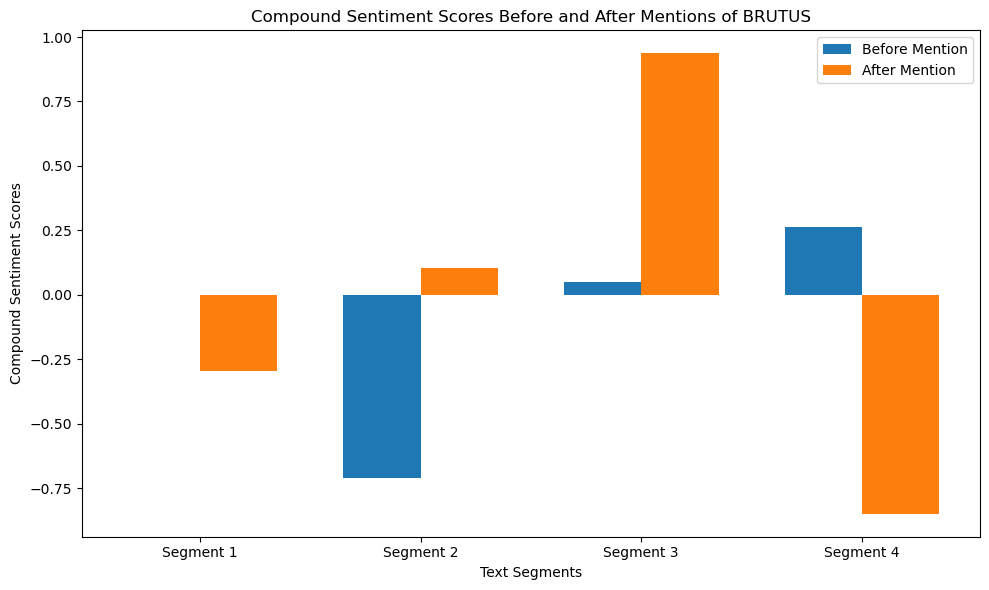

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sentiment data analysis for BRUTUS
segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4']
before_compounds = [0.0, -0.7096, 0.0516, 0.2617]
after_compounds = [-0.296, 0.1027, 0.9366, -0.8491]

# Bar 
index = np.arange(len(segments)) 
bar_width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars_before = ax.bar(index - bar_width/2, before_compounds, bar_width, label='Before Mention')
bars_after = ax.bar(index + bar_width/2, after_compounds, bar_width, label='After Mention')

ax.set_xlabel('Text Segments')
ax.set_ylabel('Compound Sentiment Scores')
ax.set_title('Compound Sentiment Scores Before and After Mentions of BRUTUS')
ax.set_xticks(index)
ax.set_xticklabels(segments)
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


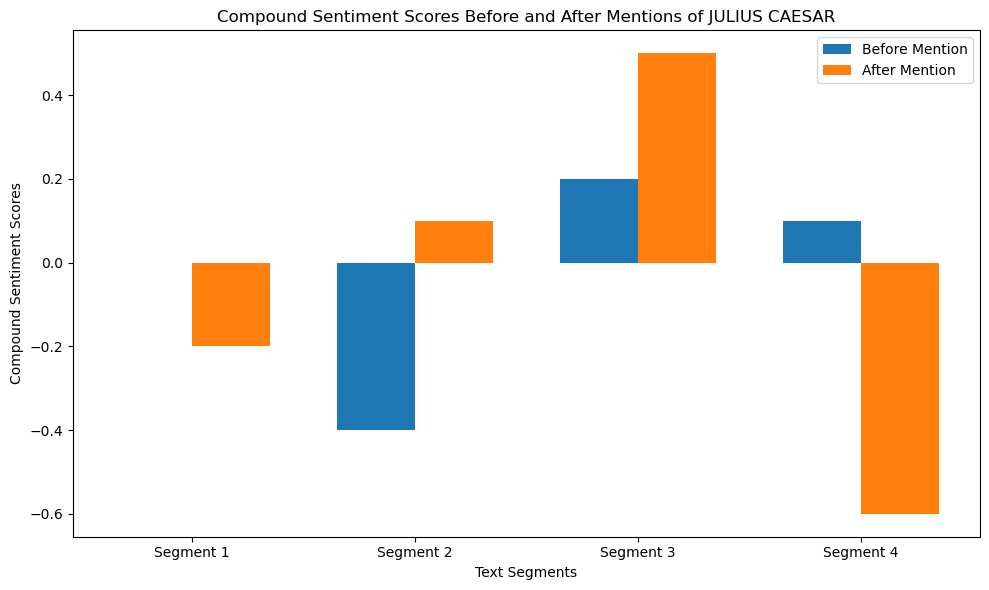

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Sentiment data analysis for JULIUS CAESAR 
segments_caesar = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4']
before_compounds_caesar = [0.0, -0.4, 0.2, 0.1]  # Before" sentiment scores
after_compounds_caesar = [-0.2, 0.1, 0.5, -0.6]  # After" sentiment scores

# Bar settings
index_caesar = np.arange(len(segments_caesar))  
bar_width_caesar = 0.35  # the width of the bars

fig_caesar, ax_caesar = plt.subplots(figsize=(10, 6))
bars_before_caesar = ax_caesar.bar(index_caesar - bar_width_caesar/2, before_compounds_caesar, bar_width_caesar, label='Before Mention')
bars_after_caesar = ax_caesar.bar(index_caesar + bar_width_caesar/2, after_compounds_caesar, bar_width_caesar, label='After Mention')

ax_caesar.set_xlabel('Text Segments')
ax_caesar.set_ylabel('Compound Sentiment Scores')
ax_caesar.set_title('Compound Sentiment Scores Before and After Mentions of JULIUS CAESAR')
ax_caesar.set_xticks(index_caesar)
ax_caesar.set_xticklabels(segments_caesar)
ax_caesar.legend()

plt.tight_layout()
plt.show()


# Analysis
The aim of this analysis is to establish the sentiment invoked by the mention of the names, BRUTUS and CAESAR in the supplied text sample in the code. To also show how the narratives in the tone of the characters changes before and after any of the character's name is mentioned. This helps us to get an insight on how their tones affect the entirety of the story plot.

## Sequence Changes
In analyzing the sequential changes in the segments of text before or after any of the character's name is mentioned, we can be able to observe how sentiments change with time in the context of the speaker's emotional tone.

## Text Selection and Reasoning
The reason this text portraying the dialogue between Caesar and Brutus was selected is due to its relevance to key moments referencing the characters of Caesar and Brutus. The text allows for a proper analysis of the interaction between the two characters, shedding light on their emotional states.

## Intermediate Results
**BRUTUS**

Segment 1: The sentiment changes from neutral to negative, indicating the way he perceives the conversation.<br>
Segment 2: The segment highlights a change in tone from negative to positive, suggesting willingness to resolve any misunderstanding.<br>
Segment 3: This segment shows a positive shift in sentiment.<br>
Segment 4: This segment shows a change in pattern from positive to negative indicating some sort of conflict.<br>

**CAESAR**: The data shows a similar transition in sentiment to that of Brutus

## Final Analysis, Summary and Reflection
The sentiment analysis showcases the complex emotional scene of the dialogue between Caesar and Brutus. Brutus was depicted as a complex character whose emotion works like a swinging pendulum that swings more towards the left-side, indicating a character with tendency towards a negative disposition. A character who was faced with the dilemma of persoanal ambition and loyalty.

The analysis of Caesar suggests a similar narrative to that of Brutus. The evolution of these sentiment underlines the scene's display of leadership and downfall. The sentiment analysis focuses on the portrayal of the characters of Caesar and Brutus and the evolution of their respective emotional states from one segment to the other, thereby giving an insight of their emotional status at each point in time.


Click to add a cell.